# DGAT Demo

## Init
Please replace the **sample_list**, **model_save_dir**, **pyg_save_dir** and **dataset_save_dir**

In [1]:
import numpy as np

import scanpy as sc
import torch
import warnings
warnings.filterwarnings('ignore')

from utils.Preprocessing import qc_control_cytassist, normalize, clean_protein_names
from Model.Train_test import train_and_evaluate_fold

import random
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

sample_list = ['Tonsil', 'Tonsil_AddOns', 'Breast', 'Glioblastoma','PBC-PR_6835-5A','PBC_PR_6837']

dataset_save_dir = '/ix/hosmanbeyoglu/haw309/DGAT_Datasets'

pyg_save_dir = '/ix/hosmanbeyoglu/haw309/pyg_data'
model_save_dir = '/ix/hosmanbeyoglu/haw309/DGAT_models'
import torch
import numpy as np
import random

# Set seed
seed = 2025
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

### Read and Preprocessing Data

In [2]:
adata_list = []
pdata_list = []
for sample in sample_list:
    print(sample)
    adata = sc.read_h5ad(f'{dataset_save_dir}/{sample}_RNA.h5ad')
    pdata = sc.read_h5ad(f'{dataset_save_dir}/{sample}_ADT.h5ad')
    adata_list.append(adata)
    pdata_list.append(pdata)


Tonsil
Tonsil_AddOns
Breast
Glioblastoma
PBC-PR_6835-5A
PBC_PR_6837


In [3]:
gene_list = [set(adata.var_names) for adata in adata_list]
common_gene = gene_list[0].intersection(*gene_list[1:])
common_gene = sorted(list(common_gene))
print(f"Common genes: {len(common_gene)}")

for pdata in pdata_list :
    pdata.var_names = clean_protein_names(pdata.var_names)
protein_list = [set(pdata.var_names) for pdata in pdata_list]
common_protein = protein_list[0].intersection(*protein_list[1:])
common_protein = sorted(list(common_protein))
print(f"Common proteins: {len(common_protein)}")

Common genes: 18085
Common proteins: 35


In [4]:
encoding_gene_list = [
    g for p in common_protein for g in common_gene
    if p.split('_')[0] == g.split('_')[0]
]

for adata, pdata,i in zip(adata_list, pdata_list, range(len(sample_list))):    
    adata_list[i], pdata_list[i] = qc_control_cytassist(adata_list[i], pdata_list[i], min_genes=700, remove_isotype=True, gene_to_keep_list = encoding_gene_list)
    adata_list[i], pdata_list[i] = normalize(adata_list[i], pdata_list[i])
    

gene_list = [set(adata.var_names) for adata in adata_list]
common_gene = gene_list[0].intersection(*gene_list)
common_gene = sorted(list(common_gene))
print(f"Common genes: {len(common_gene)}")

protein_list = [set(pdata.var_names) for pdata in pdata_list]
common_protein = protein_list[0].intersection(*protein_list)
common_protein = sorted(list(common_protein))
print(f"Common proteins: {len(common_protein)}")


with open(f"common_gene_{len(common_gene)}.txt", "w") as f:
    for gene in common_gene:
        f.write(gene + "\n")
with open(f"common_protein_{len(common_protein)}.txt", "w") as f:
    for protein in common_protein:
        f.write(protein + "\n")

Common genes: 11535
Common proteins: 31


In [5]:
adata_list = [adata[:,common_gene] for adata in adata_list]
pdata_list = [pdata[:,common_protein] for pdata in pdata_list]

### Leave One Out Testing


=== Test sample 'Tonsil' ===

Common genes: 11535
Common proteins: 31
Creating or loading dataset
Loading preprocessed data for sample 'CytAssist_FFPE_Protein_Expression_Human_Tonsil_AddOns' from '/ix/hosmanbeyoglu/haw309/pyg_data/CytAssist_FFPE_Protein_Expression_Human_Tonsil_AddOns_11535_new_spatial=6_1hop_new_filtering.pth'
Loading preprocessed data for sample 'CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer' from '/ix/hosmanbeyoglu/haw309/pyg_data/CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_11535_new_spatial=6_1hop_new_filtering.pth'
Loading preprocessed data for sample 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma' from '/ix/hosmanbeyoglu/haw309/pyg_data/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_11535_new_spatial=6_1hop_new_filtering.pth'
Loading preprocessed data for sample 'PBC-PR_6835-5A' from '/ix/hosmanbeyoglu/haw309/pyg_data/PBC-PR_6835-5A_11535_new_spatial=6_1hop_new_filtering.pth'
Loading preprocessed data for sample 'PBC_PR_6837' from '

Epoch [1/100] Total Loss: 10.5567 | mRNA Recon: 1.1874 | Protein Recon: 0.3885 | Alignment: 0.5470 | Protein Pred: 0.3876 | mRNA Pred: 1.1936
Test Loss: 12.5676
Protein-wise Spearman: Mean = 0.2274, Std = 0.2638, Median = 0.1827
Cell-wise Spearman: Mean = 0.1549, Std = 0.1816, Median = 0.1673
Number of cells with low variation: 0
Epoch 1: EB evidence = 1.8209


Epoch [2/100] Total Loss: 8.2901 | mRNA Recon: 1.0466 | Protein Recon: 0.3766 | Alignment: 0.4330 | Protein Pred: 0.3574 | mRNA Pred: 1.0494
Test Loss: 11.5243
Protein-wise Spearman: Mean = 0.1801, Std = 0.3420, Median = 0.1975
Cell-wise Spearman: Mean = 0.0795, Std = 0.2021, Median = 0.0718
Number of cells with low variation: 0
Epoch 2: EB evidence = 0.7386


Epoch [3/100] Total Loss: 7.8008 | mRNA Recon: 1.0297 | Protein Recon: 0.3232 | Alignment: 0.3644 | Protein Pred: 0.3111 | mRNA Pred: 1.0302
Test Loss: 11.5143
Protein-wise Spearman: Mean = 0.1944, Std = 0.3220, Median = 0.1699
Cell-wise Spearman: Mean = 0.1942, Std = 0.2177, Median = 0.2266
Number of cells with low variation: 0
Epoch 3: EB evidence = 0.6505


Epoch [4/100] Total Loss: 7.6533 | mRNA Recon: 1.0140 | Protein Recon: 0.3645 | Alignment: 0.3199 | Protein Pred: 0.3355 | mRNA Pred: 1.0151
Test Loss: 11.3622
Protein-wise Spearman: Mean = 0.2127, Std = 0.2846, Median = 0.1709
Cell-wise Spearman: Mean = 0.2447, Std = 0.2692, Median = 0.2863
Number of cells with low variation: 0
Epoch 4: EB evidence = 0.8305


Epoch [5/100] Total Loss: 7.5423 | mRNA Recon: 1.0119 | Protein Recon: 0.2288 | Alignment: 0.2768 | Protein Pred: 0.2218 | mRNA Pred: 1.0126
Test Loss: 11.3441
Protein-wise Spearman: Mean = 0.2209, Std = 0.2871, Median = 0.2264
Cell-wise Spearman: Mean = 0.2677, Std = 0.2072, Median = 0.2935
Number of cells with low variation: 0
Epoch 5: EB evidence = 0.9227


Epoch [6/100] Total Loss: 7.4632 | mRNA Recon: 1.0024 | Protein Recon: 0.2724 | Alignment: 0.2529 | Protein Pred: 0.2577 | mRNA Pred: 1.0038
Test Loss: 11.2873
Protein-wise Spearman: Mean = 0.2877, Std = 0.2420, Median = 0.2794
Cell-wise Spearman: Mean = 0.2843, Std = 0.2717, Median = 0.3359
Number of cells with low variation: 0
Epoch 6: EB evidence = 0.8524


Epoch [7/100] Total Loss: 7.3955 | mRNA Recon: 1.0037 | Protein Recon: 0.3124 | Alignment: 0.2414 | Protein Pred: 0.3097 | mRNA Pred: 1.0052
Test Loss: 11.2486
Protein-wise Spearman: Mean = 0.3207, Std = 0.2328, Median = 0.3687
Cell-wise Spearman: Mean = 0.3277, Std = 0.2493, Median = 0.3589
Number of cells with low variation: 0
Epoch 7: EB evidence = 0.8158


Epoch [8/100] Total Loss: 7.3453 | mRNA Recon: 1.0026 | Protein Recon: 0.2690 | Alignment: 0.2265 | Protein Pred: 0.2664 | mRNA Pred: 1.0043
Test Loss: 11.2393
Protein-wise Spearman: Mean = 0.3377, Std = 0.2376, Median = 0.3700
Cell-wise Spearman: Mean = 0.3406, Std = 0.2384, Median = 0.3867
Number of cells with low variation: 0
Epoch 8: EB evidence = 0.9830


Epoch [9/100] Total Loss: 7.2957 | mRNA Recon: 0.9978 | Protein Recon: 0.2522 | Alignment: 0.2097 | Protein Pred: 0.2429 | mRNA Pred: 0.9995
Test Loss: 11.2015
Protein-wise Spearman: Mean = 0.3629, Std = 0.2369, Median = 0.4010
Cell-wise Spearman: Mean = 0.3333, Std = 0.2476, Median = 0.3629
Number of cells with low variation: 0
Epoch 9: EB evidence = 0.9533


Epoch [10/100] Total Loss: 7.2373 | mRNA Recon: 0.9967 | Protein Recon: 0.2312 | Alignment: 0.1980 | Protein Pred: 0.2367 | mRNA Pred: 0.9985
Test Loss: 11.1513
Protein-wise Spearman: Mean = 0.3739, Std = 0.2283, Median = 0.4193
Cell-wise Spearman: Mean = 0.3858, Std = 0.2455, Median = 0.4315
Number of cells with low variation: 0
Epoch 10: Learning rate reduced.
Epoch 10: EB evidence = 0.9008


Epoch [11/100] Total Loss: 7.1823 | mRNA Recon: 0.9974 | Protein Recon: 0.2398 | Alignment: 0.1886 | Protein Pred: 0.2382 | mRNA Pred: 0.9992
Test Loss: 11.1204
Protein-wise Spearman: Mean = 0.3885, Std = 0.2251, Median = 0.4626
Cell-wise Spearman: Mean = 0.4156, Std = 0.2320, Median = 0.4516
Number of cells with low variation: 0
Epoch 11: EB evidence = 0.9380


Epoch [12/100] Total Loss: 7.1368 | mRNA Recon: 0.9954 | Protein Recon: 0.2292 | Alignment: 0.1825 | Protein Pred: 0.2345 | mRNA Pred: 0.9976
Test Loss: 11.0808
Protein-wise Spearman: Mean = 0.3998, Std = 0.2267, Median = 0.4990
Cell-wise Spearman: Mean = 0.4339, Std = 0.2258, Median = 0.4790
Number of cells with low variation: 0
Epoch 12: EB evidence = 0.9902


Epoch [13/100] Total Loss: 7.0906 | mRNA Recon: 1.0022 | Protein Recon: 0.1898 | Alignment: 0.1625 | Protein Pred: 0.1864 | mRNA Pred: 1.0027
Test Loss: 11.0473
Protein-wise Spearman: Mean = 0.4135, Std = 0.2337, Median = 0.5127
Cell-wise Spearman: Mean = 0.4493, Std = 0.2337, Median = 0.4875
Number of cells with low variation: 0
Epoch 13: EB evidence = 0.9727


Epoch [14/100] Total Loss: 7.0596 | mRNA Recon: 1.0007 | Protein Recon: 0.2780 | Alignment: 0.1620 | Protein Pred: 0.2953 | mRNA Pred: 1.0020
Test Loss: 10.9948
Protein-wise Spearman: Mean = 0.4349, Std = 0.2290, Median = 0.5142
Cell-wise Spearman: Mean = 0.4903, Std = 0.2153, Median = 0.5266
Number of cells with low variation: 0
Epoch 14: EB evidence = 1.1650


Epoch [15/100] Total Loss: 7.0133 | mRNA Recon: 0.9883 | Protein Recon: 0.1991 | Alignment: 0.1619 | Protein Pred: 0.2175 | mRNA Pred: 0.9914
Test Loss: 10.9604
Protein-wise Spearman: Mean = 0.4398, Std = 0.2311, Median = 0.5222
Cell-wise Spearman: Mean = 0.4951, Std = 0.2100, Median = 0.5315
Number of cells with low variation: 0
Epoch 15: EB evidence = 0.8981


Epoch [16/100] Total Loss: 6.9777 | mRNA Recon: 0.9988 | Protein Recon: 0.2626 | Alignment: 0.1475 | Protein Pred: 0.2849 | mRNA Pred: 1.0009
Test Loss: 10.9732
Protein-wise Spearman: Mean = 0.4416, Std = 0.2412, Median = 0.5394
Cell-wise Spearman: Mean = 0.4777, Std = 0.2398, Median = 0.5327
Number of cells with low variation: 0
Epoch 16: EB evidence = 0.9230


Epoch [17/100] Total Loss: 6.9688 | mRNA Recon: 1.0007 | Protein Recon: 0.2703 | Alignment: 0.1444 | Protein Pred: 0.2938 | mRNA Pred: 1.0033
Test Loss: 10.8877
Protein-wise Spearman: Mean = 0.4535, Std = 0.2230, Median = 0.5229
Cell-wise Spearman: Mean = 0.5070, Std = 0.2060, Median = 0.5435
Number of cells with low variation: 0
Epoch 17: EB evidence = 0.7803


Epoch [18/100] Total Loss: 6.9512 | mRNA Recon: 0.9880 | Protein Recon: 0.1775 | Alignment: 0.1484 | Protein Pred: 0.2153 | mRNA Pred: 0.9923
Test Loss: 10.9449
Protein-wise Spearman: Mean = 0.4330, Std = 0.2229, Median = 0.4606
Cell-wise Spearman: Mean = 0.4530, Std = 0.2262, Median = 0.4859
Number of cells with low variation: 0
Epoch 18: EB evidence = 0.7725


Epoch [19/100] Total Loss: 6.9225 | mRNA Recon: 0.9785 | Protein Recon: 0.1786 | Alignment: 0.1449 | Protein Pred: 0.2170 | mRNA Pred: 0.9821
Test Loss: 10.8734
Protein-wise Spearman: Mean = 0.4272, Std = 0.2309, Median = 0.4506
Cell-wise Spearman: Mean = 0.5066, Std = 0.2057, Median = 0.5351
Number of cells with low variation: 0
Epoch 19: EB evidence = 0.8028


Epoch [20/100] Total Loss: 6.8723 | mRNA Recon: 0.9996 | Protein Recon: 0.1549 | Alignment: 0.1235 | Protein Pred: 0.1720 | mRNA Pred: 1.0014
Test Loss: 10.8297
Protein-wise Spearman: Mean = 0.4635, Std = 0.2310, Median = 0.5067
Cell-wise Spearman: Mean = 0.5382, Std = 0.2173, Median = 0.5790
Number of cells with low variation: 0
Epoch 20: Learning rate reduced.
Epoch 20: EB evidence = 0.7836


Epoch [21/100] Total Loss: 6.8398 | mRNA Recon: 0.9963 | Protein Recon: 0.2365 | Alignment: 0.1272 | Protein Pred: 0.2732 | mRNA Pred: 1.0009
Test Loss: 10.8199
Protein-wise Spearman: Mean = 0.4563, Std = 0.2333, Median = 0.5192
Cell-wise Spearman: Mean = 0.5355, Std = 0.2197, Median = 0.5827
Number of cells with low variation: 0
Epoch 21: EB evidence = 0.9389


Epoch [22/100] Total Loss: 6.8119 | mRNA Recon: 0.9990 | Protein Recon: 0.1563 | Alignment: 0.1153 | Protein Pred: 0.1644 | mRNA Pred: 1.0011
Test Loss: 10.7968
Protein-wise Spearman: Mean = 0.4682, Std = 0.2253, Median = 0.5367
Cell-wise Spearman: Mean = 0.5547, Std = 0.2095, Median = 0.5919
Number of cells with low variation: 0
Epoch 22: EB evidence = 0.8657


Epoch [23/100] Total Loss: 6.7829 | mRNA Recon: 0.9687 | Protein Recon: 0.1681 | Alignment: 0.1292 | Protein Pred: 0.1919 | mRNA Pred: 0.9710
Test Loss: 10.7850
Protein-wise Spearman: Mean = 0.4712, Std = 0.2233, Median = 0.5474
Cell-wise Spearman: Mean = 0.5568, Std = 0.2123, Median = 0.5984
Number of cells with low variation: 0
Epoch 23: EB evidence = 0.8859


Epoch [24/100] Total Loss: 6.7649 | mRNA Recon: 0.9798 | Protein Recon: 0.1478 | Alignment: 0.1178 | Protein Pred: 0.1730 | mRNA Pred: 0.9842
Test Loss: 10.7820
Protein-wise Spearman: Mean = 0.4733, Std = 0.2253, Median = 0.5140
Cell-wise Spearman: Mean = 0.5598, Std = 0.2047, Median = 0.5960
Number of cells with low variation: 0
Epoch 24: EB evidence = 0.9188


Epoch [25/100] Total Loss: 6.7403 | mRNA Recon: 0.9666 | Protein Recon: 0.1599 | Alignment: 0.1222 | Protein Pred: 0.1842 | mRNA Pred: 0.9698
Test Loss: 10.7529
Protein-wise Spearman: Mean = 0.4775, Std = 0.2282, Median = 0.5360
Cell-wise Spearman: Mean = 0.5658, Std = 0.2064, Median = 0.6048
Number of cells with low variation: 0
Epoch 25: EB evidence = 0.8745


Epoch [26/100] Total Loss: 6.7430 | mRNA Recon: 0.9663 | Protein Recon: 0.1572 | Alignment: 0.1192 | Protein Pred: 0.1802 | mRNA Pred: 0.9690
Test Loss: 10.7419
Protein-wise Spearman: Mean = 0.4862, Std = 0.2249, Median = 0.5673
Cell-wise Spearman: Mean = 0.5702, Std = 0.1862, Median = 0.6016
Number of cells with low variation: 0
Epoch 26: EB evidence = 0.9146


Epoch [27/100] Total Loss: 6.7121 | mRNA Recon: 0.9674 | Protein Recon: 0.1521 | Alignment: 0.1127 | Protein Pred: 0.1825 | mRNA Pred: 0.9743
Test Loss: 10.7333
Protein-wise Spearman: Mean = 0.4985, Std = 0.2162, Median = 0.5595
Cell-wise Spearman: Mean = 0.5690, Std = 0.1992, Median = 0.6044
Number of cells with low variation: 0
Epoch 27: EB evidence = 0.9112


Epoch [28/100] Total Loss: 6.7098 | mRNA Recon: 0.9941 | Protein Recon: 0.2071 | Alignment: 0.1037 | Protein Pred: 0.2430 | mRNA Pred: 0.9982
Test Loss: 10.8220
Protein-wise Spearman: Mean = 0.4422, Std = 0.2302, Median = 0.4951
Cell-wise Spearman: Mean = 0.5188, Std = 0.2288, Median = 0.5637
Number of cells with low variation: 0
Epoch 28: EB evidence = 0.9109


Epoch [29/100] Total Loss: 6.7189 | mRNA Recon: 0.9672 | Protein Recon: 0.1524 | Alignment: 0.1149 | Protein Pred: 0.2219 | mRNA Pred: 0.9725
Test Loss: 10.8178
Protein-wise Spearman: Mean = 0.4235, Std = 0.2357, Median = 0.4589
Cell-wise Spearman: Mean = 0.5182, Std = 0.2416, Median = 0.5649
Number of cells with low variation: 0
Epoch 29: EB evidence = 1.3367


Epoch [30/100] Total Loss: 6.7034 | mRNA Recon: 0.9938 | Protein Recon: 0.1998 | Alignment: 0.0997 | Protein Pred: 0.2416 | mRNA Pred: 0.9977
Test Loss: 10.7277
Protein-wise Spearman: Mean = 0.4970, Std = 0.2243, Median = 0.5577
Cell-wise Spearman: Mean = 0.5663, Std = 0.2084, Median = 0.6117
Number of cells with low variation: 0
Epoch 30: Learning rate reduced.
Epoch 30: EB evidence = 0.9019


Epoch [31/100] Total Loss: 6.6717 | mRNA Recon: 0.9941 | Protein Recon: 0.1970 | Alignment: 0.0993 | Protein Pred: 0.2354 | mRNA Pred: 0.9977
Test Loss: 10.7111
Protein-wise Spearman: Mean = 0.5057, Std = 0.2181, Median = 0.5754
Cell-wise Spearman: Mean = 0.5920, Std = 0.1929, Median = 0.6294
Number of cells with low variation: 0
Epoch 31: EB evidence = 0.9173


Epoch [32/100] Total Loss: 6.6518 | mRNA Recon: 0.9932 | Protein Recon: 0.1942 | Alignment: 0.0969 | Protein Pred: 0.2339 | mRNA Pred: 0.9978
Test Loss: 10.7227
Protein-wise Spearman: Mean = 0.4921, Std = 0.2226, Median = 0.5540
Cell-wise Spearman: Mean = 0.5722, Std = 0.2090, Median = 0.6145
Number of cells with low variation: 0
Epoch 32: EB evidence = 0.8962


Epoch [33/100] Total Loss: 6.6481 | mRNA Recon: 0.9772 | Protein Recon: 0.1249 | Alignment: 0.0983 | Protein Pred: 0.1550 | mRNA Pred: 0.9821


Test Loss: 10.7178
Protein-wise Spearman: Mean = 0.4892, Std = 0.2167, Median = 0.5444
Cell-wise Spearman: Mean = 0.5786, Std = 0.2054, Median = 0.6185
Number of cells with low variation: 0
Epoch 33: EB evidence = 1.0056


Epoch [34/100] Total Loss: 6.6338 | mRNA Recon: 0.9973 | Protein Recon: 0.1293 | Alignment: 0.0881 | Protein Pred: 0.1453 | mRNA Pred: 0.9999
Test Loss: 10.7017
Protein-wise Spearman: Mean = 0.4962, Std = 0.2154, Median = 0.5764
Cell-wise Spearman: Mean = 0.5750, Std = 0.2052, Median = 0.6161
Number of cells with low variation: 0
Epoch 34: EB evidence = 0.8474


Epoch [35/100] Total Loss: 6.6273 | mRNA Recon: 0.9630 | Protein Recon: 0.1421 | Alignment: 0.1010 | Protein Pred: 0.1631 | mRNA Pred: 0.9657
Test Loss: 10.6865
Protein-wise Spearman: Mean = 0.4987, Std = 0.2206, Median = 0.5718
Cell-wise Spearman: Mean = 0.5893, Std = 0.1924, Median = 0.6282
Number of cells with low variation: 0
Epoch 35: EB evidence = 0.9408


Epoch [36/100] Total Loss: 6.6136 | mRNA Recon: 0.9635 | Protein Recon: 0.1351 | Alignment: 0.0966 | Protein Pred: 0.1656 | mRNA Pred: 0.9706
Test Loss: 10.6881
Protein-wise Spearman: Mean = 0.4985, Std = 0.2202, Median = 0.5668
Cell-wise Spearman: Mean = 0.5830, Std = 0.1985, Median = 0.6262
Number of cells with low variation: 0
Epoch 36: EB evidence = 0.9355


Epoch [37/100] Total Loss: 6.6089 | mRNA Recon: 0.9767 | Protein Recon: 0.1175 | Alignment: 0.0922 | Protein Pred: 0.1488 | mRNA Pred: 0.9817
Test Loss: 10.6922
Protein-wise Spearman: Mean = 0.4975, Std = 0.2134, Median = 0.5679
Cell-wise Spearman: Mean = 0.5876, Std = 0.1983, Median = 0.6242
Number of cells with low variation: 0
Epoch 37: EB evidence = 0.8397


Epoch [38/100] Total Loss: 6.6027 | mRNA Recon: 0.9763 | Protein Recon: 0.1218 | Alignment: 0.0912 | Protein Pred: 0.1440 | mRNA Pred: 0.9813
Test Loss: 10.6735
Protein-wise Spearman: Mean = 0.5034, Std = 0.2180, Median = 0.5775
Cell-wise Spearman: Mean = 0.5887, Std = 0.1917, Median = 0.6278
Number of cells with low variation: 0
Epoch 38: EB evidence = 0.9106


Epoch [39/100] Total Loss: 6.5888 | mRNA Recon: 0.9625 | Protein Recon: 0.1353 | Alignment: 0.0911 | Protein Pred: 0.1603 | mRNA Pred: 0.9692
Test Loss: 10.6754
Protein-wise Spearman: Mean = 0.5105, Std = 0.2169, Median = 0.5871
Cell-wise Spearman: Mean = 0.5944, Std = 0.1977, Median = 0.6351
Number of cells with low variation: 0
Epoch 39: EB evidence = 0.9481


Epoch [40/100] Total Loss: 6.5803 | mRNA Recon: 0.9924 | Protein Recon: 0.1794 | Alignment: 0.0859 | Protein Pred: 0.2231 | mRNA Pred: 0.9965
Test Loss: 10.6727
Protein-wise Spearman: Mean = 0.5054, Std = 0.2157, Median = 0.5700
Cell-wise Spearman: Mean = 0.5957, Std = 0.1996, Median = 0.6375
Number of cells with low variation: 0
Epoch 40: Learning rate reduced.
Epoch 40: EB evidence = 1.0615


Epoch [41/100] Total Loss: 6.5719 | mRNA Recon: 0.9969 | Protein Recon: 0.1132 | Alignment: 0.0799 | Protein Pred: 0.1374 | mRNA Pred: 0.9994
Test Loss: 10.6652
Protein-wise Spearman: Mean = 0.5093, Std = 0.2147, Median = 0.5773
Cell-wise Spearman: Mean = 0.5969, Std = 0.1935, Median = 0.6327
Number of cells with low variation: 0
Epoch 41: EB evidence = 0.9389


Epoch [42/100] Total Loss: 6.5641 | mRNA Recon: 0.9923 | Protein Recon: 0.1754 | Alignment: 0.0844 | Protein Pred: 0.2135 | mRNA Pred: 0.9968
Test Loss: 10.6515
Protein-wise Spearman: Mean = 0.5161, Std = 0.2144, Median = 0.5891
Cell-wise Spearman: Mean = 0.6043, Std = 0.1973, Median = 0.6480
Number of cells with low variation: 0
Epoch 42: EB evidence = 0.9435


Epoch [43/100] Total Loss: 6.5529 | mRNA Recon: 0.9968 | Protein Recon: 0.1106 | Alignment: 0.0778 | Protein Pred: 0.1354 | mRNA Pred: 0.9991
Test Loss: 10.6570
Protein-wise Spearman: Mean = 0.5125, Std = 0.2188, Median = 0.5979
Cell-wise Spearman: Mean = 0.5914, Std = 0.1951, Median = 0.6306
Number of cells with low variation: 0
Epoch 43: EB evidence = 0.9565


Epoch [44/100] Total Loss: 6.5459 | mRNA Recon: 0.9750 | Protein Recon: 0.1077 | Alignment: 0.0838 | Protein Pred: 0.1323 | mRNA Pred: 0.9799
Test Loss: 10.6447
Protein-wise Spearman: Mean = 0.5141, Std = 0.2161, Median = 0.5847
Cell-wise Spearman: Mean = 0.5971, Std = 0.1963, Median = 0.6391
Number of cells with low variation: 0
Epoch 44: EB evidence = 0.9443


Epoch [45/100] Total Loss: 6.5387 | mRNA Recon: 0.9923 | Protein Recon: 0.1678 | Alignment: 0.0811 | Protein Pred: 0.2091 | mRNA Pred: 0.9965
Test Loss: 10.6476
Protein-wise Spearman: Mean = 0.5164, Std = 0.2107, Median = 0.5895
Cell-wise Spearman: Mean = 0.5926, Std = 0.1895, Median = 0.6270
Number of cells with low variation: 0
Epoch 45: EB evidence = 0.9523


Epoch [46/100] Total Loss: 6.5349 | mRNA Recon: 0.9967 | Protein Recon: 0.1078 | Alignment: 0.0745 | Protein Pred: 0.1282 | mRNA Pred: 0.9991
Test Loss: 10.6329
Protein-wise Spearman: Mean = 0.5196, Std = 0.2110, Median = 0.5858
Cell-wise Spearman: Mean = 0.6004, Std = 0.1941, Median = 0.6391
Number of cells with low variation: 0
Epoch 46: EB evidence = 0.9761


Epoch [47/100] Total Loss: 6.5283 | mRNA Recon: 0.9615 | Protein Recon: 0.1222 | Alignment: 0.0874 | Protein Pred: 0.1443 | mRNA Pred: 0.9642
Test Loss: 10.6199
Protein-wise Spearman: Mean = 0.5219, Std = 0.2143, Median = 0.5829
Cell-wise Spearman: Mean = 0.6077, Std = 0.1902, Median = 0.6456
Number of cells with low variation: 0
Epoch 47: EB evidence = 0.8882


Epoch [48/100] Total Loss: 6.5250 | mRNA Recon: 0.9596 | Protein Recon: 0.1198 | Alignment: 0.0831 | Protein Pred: 0.1570 | mRNA Pred: 0.9667
Test Loss: 10.6231
Protein-wise Spearman: Mean = 0.5139, Std = 0.2194, Median = 0.5870
Cell-wise Spearman: Mean = 0.6001, Std = 0.1829, Median = 0.6323
Number of cells with low variation: 0
Epoch 48: EB evidence = 0.9086


Epoch [49/100] Total Loss: 6.5286 | mRNA Recon: 0.9619 | Protein Recon: 0.1286 | Alignment: 0.0850 | Protein Pred: 0.1584 | mRNA Pred: 0.9641
Test Loss: 10.6289
Protein-wise Spearman: Mean = 0.5168, Std = 0.2102, Median = 0.5833
Cell-wise Spearman: Mean = 0.5984, Std = 0.1995, Median = 0.6399
Number of cells with low variation: 0
Epoch 49: EB evidence = 0.9070


Epoch [50/100] Total Loss: 6.5167 | mRNA Recon: 0.9918 | Protein Recon: 0.1599 | Alignment: 0.0774 | Protein Pred: 0.2037 | mRNA Pred: 0.9966
Test Loss: 10.6129
Protein-wise Spearman: Mean = 0.5309, Std = 0.2096, Median = 0.5820
Cell-wise Spearman: Mean = 0.6097, Std = 0.1975, Median = 0.6524
Number of cells with low variation: 0
Epoch 50: Learning rate reduced.
Epoch 50: EB evidence = 0.3394


Epoch [51/100] Total Loss: 6.5205 | mRNA Recon: 0.9610 | Protein Recon: 0.1219 | Alignment: 0.0848 | Protein Pred: 0.1472 | mRNA Pred: 0.9636
Test Loss: 10.6143
Protein-wise Spearman: Mean = 0.5255, Std = 0.2155, Median = 0.5841
Cell-wise Spearman: Mean = 0.6086, Std = 0.1930, Median = 0.6480
Number of cells with low variation: 0
Epoch 51: EB evidence = 0.9494


Epoch [52/100] Total Loss: 6.5007 | mRNA Recon: 0.9917 | Protein Recon: 0.1577 | Alignment: 0.0755 | Protein Pred: 0.1979 | mRNA Pred: 0.9962
Test Loss: 10.6523
Protein-wise Spearman: Mean = 0.5014, Std = 0.2205, Median = 0.5901
Cell-wise Spearman: Mean = 0.5843, Std = 0.1861, Median = 0.6141
Number of cells with low variation: 0
Epoch 52: EB evidence = 0.9654


Epoch [53/100] Total Loss: 6.5142 | mRNA Recon: 0.9962 | Protein Recon: 0.1026 | Alignment: 0.0694 | Protein Pred: 0.1237 | mRNA Pred: 0.9987
Test Loss: 10.6230
Protein-wise Spearman: Mean = 0.5157, Std = 0.2058, Median = 0.5820
Cell-wise Spearman: Mean = 0.6005, Std = 0.1904, Median = 0.6363
Number of cells with low variation: 0
Epoch 53: EB evidence = 0.9653


Epoch [54/100] Total Loss: 6.4954 | mRNA Recon: 0.9916 | Protein Recon: 0.1600 | Alignment: 0.0742 | Protein Pred: 0.1979 | mRNA Pred: 0.9960
Test Loss: 10.6069
Protein-wise Spearman: Mean = 0.5171, Std = 0.2126, Median = 0.6053
Cell-wise Spearman: Mean = 0.6013, Std = 0.1894, Median = 0.6371
Number of cells with low variation: 0
Epoch 54: EB evidence = 0.9541


Epoch [55/100] Total Loss: 6.4962 | mRNA Recon: 0.9727 | Protein Recon: 0.0979 | Alignment: 0.0755 | Protein Pred: 0.1281 | mRNA Pred: 0.9776
Test Loss: 10.6015
Protein-wise Spearman: Mean = 0.5279, Std = 0.2075, Median = 0.5874
Cell-wise Spearman: Mean = 0.6069, Std = 0.1952, Median = 0.6464
Number of cells with low variation: 0
Epoch 55: EB evidence = 0.9447


Epoch [56/100] Total Loss: 6.4866 | mRNA Recon: 0.9604 | Protein Recon: 0.1177 | Alignment: 0.0820 | Protein Pred: 0.1387 | mRNA Pred: 0.9633
Test Loss: 10.6066
Protein-wise Spearman: Mean = 0.5171, Std = 0.2145, Median = 0.5924
Cell-wise Spearman: Mean = 0.5955, Std = 0.1915, Median = 0.6290
Number of cells with low variation: 0
Epoch 56: EB evidence = 0.9325


Epoch [57/100] Total Loss: 6.4914 | mRNA Recon: 0.9720 | Protein Recon: 0.0965 | Alignment: 0.0746 | Protein Pred: 0.1266 | mRNA Pred: 0.9774
Test Loss: 10.6186
Protein-wise Spearman: Mean = 0.5105, Std = 0.2170, Median = 0.5851
Cell-wise Spearman: Mean = 0.5917, Std = 0.2007, Median = 0.6298
Number of cells with low variation: 0
Epoch 57: EB evidence = 0.9230


Epoch [58/100] Total Loss: 6.4987 | mRNA Recon: 0.9961 | Protein Recon: 0.0992 | Alignment: 0.0672 | Protein Pred: 0.1217 | mRNA Pred: 0.9986
Test Loss: 10.5837
Protein-wise Spearman: Mean = 0.5194, Std = 0.2169, Median = 0.5831
Cell-wise Spearman: Mean = 0.6026, Std = 0.1816, Median = 0.6375
Number of cells with low variation: 0
Epoch 58: EB evidence = 0.9626


Epoch [59/100] Total Loss: 6.4782 | mRNA Recon: 0.9568 | Protein Recon: 0.1110 | Alignment: 0.0762 | Protein Pred: 0.1494 | mRNA Pred: 0.9635
Test Loss: 10.5743
Protein-wise Spearman: Mean = 0.5288, Std = 0.2024, Median = 0.5888
Cell-wise Spearman: Mean = 0.6067, Std = 0.1915, Median = 0.6456
Number of cells with low variation: 0
Epoch 59: EB evidence = 0.8456


Epoch [60/100] Total Loss: 6.4831 | mRNA Recon: 0.9563 | Protein Recon: 0.1105 | Alignment: 0.0763 | Protein Pred: 0.1480 | mRNA Pred: 0.9628
Test Loss: 10.5829
Protein-wise Spearman: Mean = 0.5260, Std = 0.2089, Median = 0.5843
Cell-wise Spearman: Mean = 0.6055, Std = 0.1869, Median = 0.6419
Number of cells with low variation: 0
Epoch 60: Learning rate reduced.
Epoch 60: EB evidence = 0.9391


Epoch [61/100] Total Loss: 6.4728 | mRNA Recon: 0.9713 | Protein Recon: 0.0940 | Alignment: 0.0725 | Protein Pred: 0.1227 | mRNA Pred: 0.9767
Test Loss: 10.6002
Protein-wise Spearman: Mean = 0.5215, Std = 0.2177, Median = 0.6036
Cell-wise Spearman: Mean = 0.6012, Std = 0.2101, Median = 0.6496
Number of cells with low variation: 0
Epoch 61: EB evidence = 0.9360


Epoch [62/100] Total Loss: 6.4566 | mRNA Recon: 0.9710 | Protein Recon: 0.0935 | Alignment: 0.0719 | Protein Pred: 0.1157 | mRNA Pred: 0.9763
Test Loss: 10.5780
Protein-wise Spearman: Mean = 0.5197, Std = 0.2160, Median = 0.5896
Cell-wise Spearman: Mean = 0.6069, Std = 0.1870, Median = 0.6403
Number of cells with low variation: 0
Epoch 62: EB evidence = 0.9556


Epoch [63/100] Total Loss: 6.4428 | mRNA Recon: 0.9959 | Protein Recon: 0.0946 | Alignment: 0.0644 | Protein Pred: 0.1151 | mRNA Pred: 0.9984
Test Loss: 10.5722
Protein-wise Spearman: Mean = 0.5219, Std = 0.2122, Median = 0.5900
Cell-wise Spearman: Mean = 0.6074, Std = 0.1944, Median = 0.6488
Number of cells with low variation: 0
Epoch 63: EB evidence = 0.9735


Epoch [64/100] Total Loss: 6.4358 | mRNA Recon: 0.9551 | Protein Recon: 0.1079 | Alignment: 0.0736 | Protein Pred: 0.1387 | mRNA Pred: 0.9621
Test Loss: 10.5611
Protein-wise Spearman: Mean = 0.5183, Std = 0.2143, Median = 0.5861
Cell-wise Spearman: Mean = 0.6031, Std = 0.1905, Median = 0.6407
Number of cells with low variation: 0
Epoch 64: EB evidence = -inf


Epoch [65/100] Total Loss: 6.4308 | mRNA Recon: 0.9701 | Protein Recon: 0.0911 | Alignment: 0.0703 | Protein Pred: 0.1125 | mRNA Pred: 0.9757
Test Loss: 10.5653
Protein-wise Spearman: Mean = 0.5240, Std = 0.2121, Median = 0.5934
Cell-wise Spearman: Mean = 0.6135, Std = 0.1927, Median = 0.6504
Number of cells with low variation: 0
Epoch 65: EB evidence = 0.9751


Epoch [66/100] Total Loss: 6.4257 | mRNA Recon: 0.9543 | Protein Recon: 0.1066 | Alignment: 0.0721 | Protein Pred: 0.1377 | mRNA Pred: 0.9615
Test Loss: 10.5581
Protein-wise Spearman: Mean = 0.5240, Std = 0.2144, Median = 0.5975
Cell-wise Spearman: Mean = 0.6141, Std = 0.1876, Median = 0.6504
Number of cells with low variation: 0
Epoch 66: EB evidence = 0.9757


Epoch [67/100] Total Loss: 6.4217 | mRNA Recon: 0.9957 | Protein Recon: 0.0919 | Alignment: 0.0618 | Protein Pred: 0.1122 | mRNA Pred: 0.9982
Test Loss: 10.5505
Protein-wise Spearman: Mean = 0.5278, Std = 0.2107, Median = 0.5913
Cell-wise Spearman: Mean = 0.6131, Std = 0.1915, Median = 0.6512
Number of cells with low variation: 0
Epoch 67: EB evidence = 0.9819


Epoch [68/100] Total Loss: 6.4155 | mRNA Recon: 0.9588 | Protein Recon: 0.1021 | Alignment: 0.0727 | Protein Pred: 0.1213 | mRNA Pred: 0.9618
Test Loss: 10.5412
Protein-wise Spearman: Mean = 0.5258, Std = 0.2100, Median = 0.5910
Cell-wise Spearman: Mean = 0.6125, Std = 0.1852, Median = 0.6472
Number of cells with low variation: 0
Epoch 68: EB evidence = 0.9797


Epoch [69/100] Total Loss: 6.4108 | mRNA Recon: 0.9908 | Protein Recon: 0.1436 | Alignment: 0.0655 | Protein Pred: 0.1732 | mRNA Pred: 0.9953
Test Loss: 10.5400
Protein-wise Spearman: Mean = 0.5267, Std = 0.2103, Median = 0.5944
Cell-wise Spearman: Mean = 0.6129, Std = 0.1883, Median = 0.6500
Number of cells with low variation: 0
Epoch 69: EB evidence = 0.9834


Epoch [70/100] Total Loss: 6.4099 | mRNA Recon: 0.9908 | Protein Recon: 0.1438 | Alignment: 0.0648 | Protein Pred: 0.1721 | mRNA Pred: 0.9951
Test Loss: 10.5491
Protein-wise Spearman: Mean = 0.5221, Std = 0.2151, Median = 0.5956
Cell-wise Spearman: Mean = 0.6114, Std = 0.1838, Median = 0.6440
Number of cells with low variation: 0
Epoch 70: Learning rate reduced.
Epoch 70: EB evidence = 0.9712


Epoch [71/100] Total Loss: 6.4044 | mRNA Recon: 0.9957 | Protein Recon: 0.0895 | Alignment: 0.0601 | Protein Pred: 0.1099 | mRNA Pred: 0.9982
Test Loss: 10.5388
Protein-wise Spearman: Mean = 0.5251, Std = 0.2149, Median = 0.6005
Cell-wise Spearman: Mean = 0.6155, Std = 0.1890, Median = 0.6536
Number of cells with low variation: 0
Epoch 71: EB evidence = 0.9811


Epoch [72/100] Total Loss: 6.3980 | mRNA Recon: 0.9685 | Protein Recon: 0.0870 | Alignment: 0.0666 | Protein Pred: 0.1086 | mRNA Pred: 0.9744
Test Loss: 10.5232
Protein-wise Spearman: Mean = 0.5277, Std = 0.2106, Median = 0.6043
Cell-wise Spearman: Mean = 0.6158, Std = 0.1854, Median = 0.6520
Number of cells with low variation: 0
Epoch 72: EB evidence = 0.9752


Epoch [73/100] Total Loss: 6.3948 | mRNA Recon: 0.9907 | Protein Recon: 0.1412 | Alignment: 0.0639 | Protein Pred: 0.1683 | mRNA Pred: 0.9952
Test Loss: 10.5306
Protein-wise Spearman: Mean = 0.5241, Std = 0.2128, Median = 0.5933
Cell-wise Spearman: Mean = 0.6154, Std = 0.1897, Median = 0.6536
Number of cells with low variation: 0
Epoch 73: EB evidence = 0.9811


Epoch [74/100] Total Loss: 6.3939 | mRNA Recon: 0.9682 | Protein Recon: 0.0863 | Alignment: 0.0660 | Protein Pred: 0.1133 | mRNA Pred: 0.9739
Test Loss: 10.5330
Protein-wise Spearman: Mean = 0.5202, Std = 0.2179, Median = 0.5978
Cell-wise Spearman: Mean = 0.6123, Std = 0.1844, Median = 0.6464
Number of cells with low variation: 0
Epoch 74: EB evidence = 0.9485
--> EB early stopping at epoch 74 (mean_evidence=0.9753, threshold=0.96)
Test Loss: 10.5330
Protein-wise Spearman: Mean = 0.5202, Std = 0.2179, Median = 0.5978
Cell-wise Spearman: Mean = 0.6123, Std = 0.1844, Median = 0.6464
Number of cells with low variation: 0
Average Cell Pearson Cor in test data:  0.6897503171497802
Average Cell Spearman Cor in test data:  0.6123485389307861
Average Protein Cor in test data: 0.5620

Average RMSE in test data: 0.2454



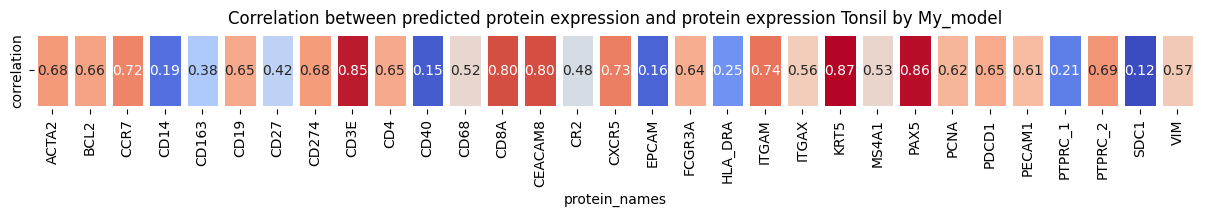

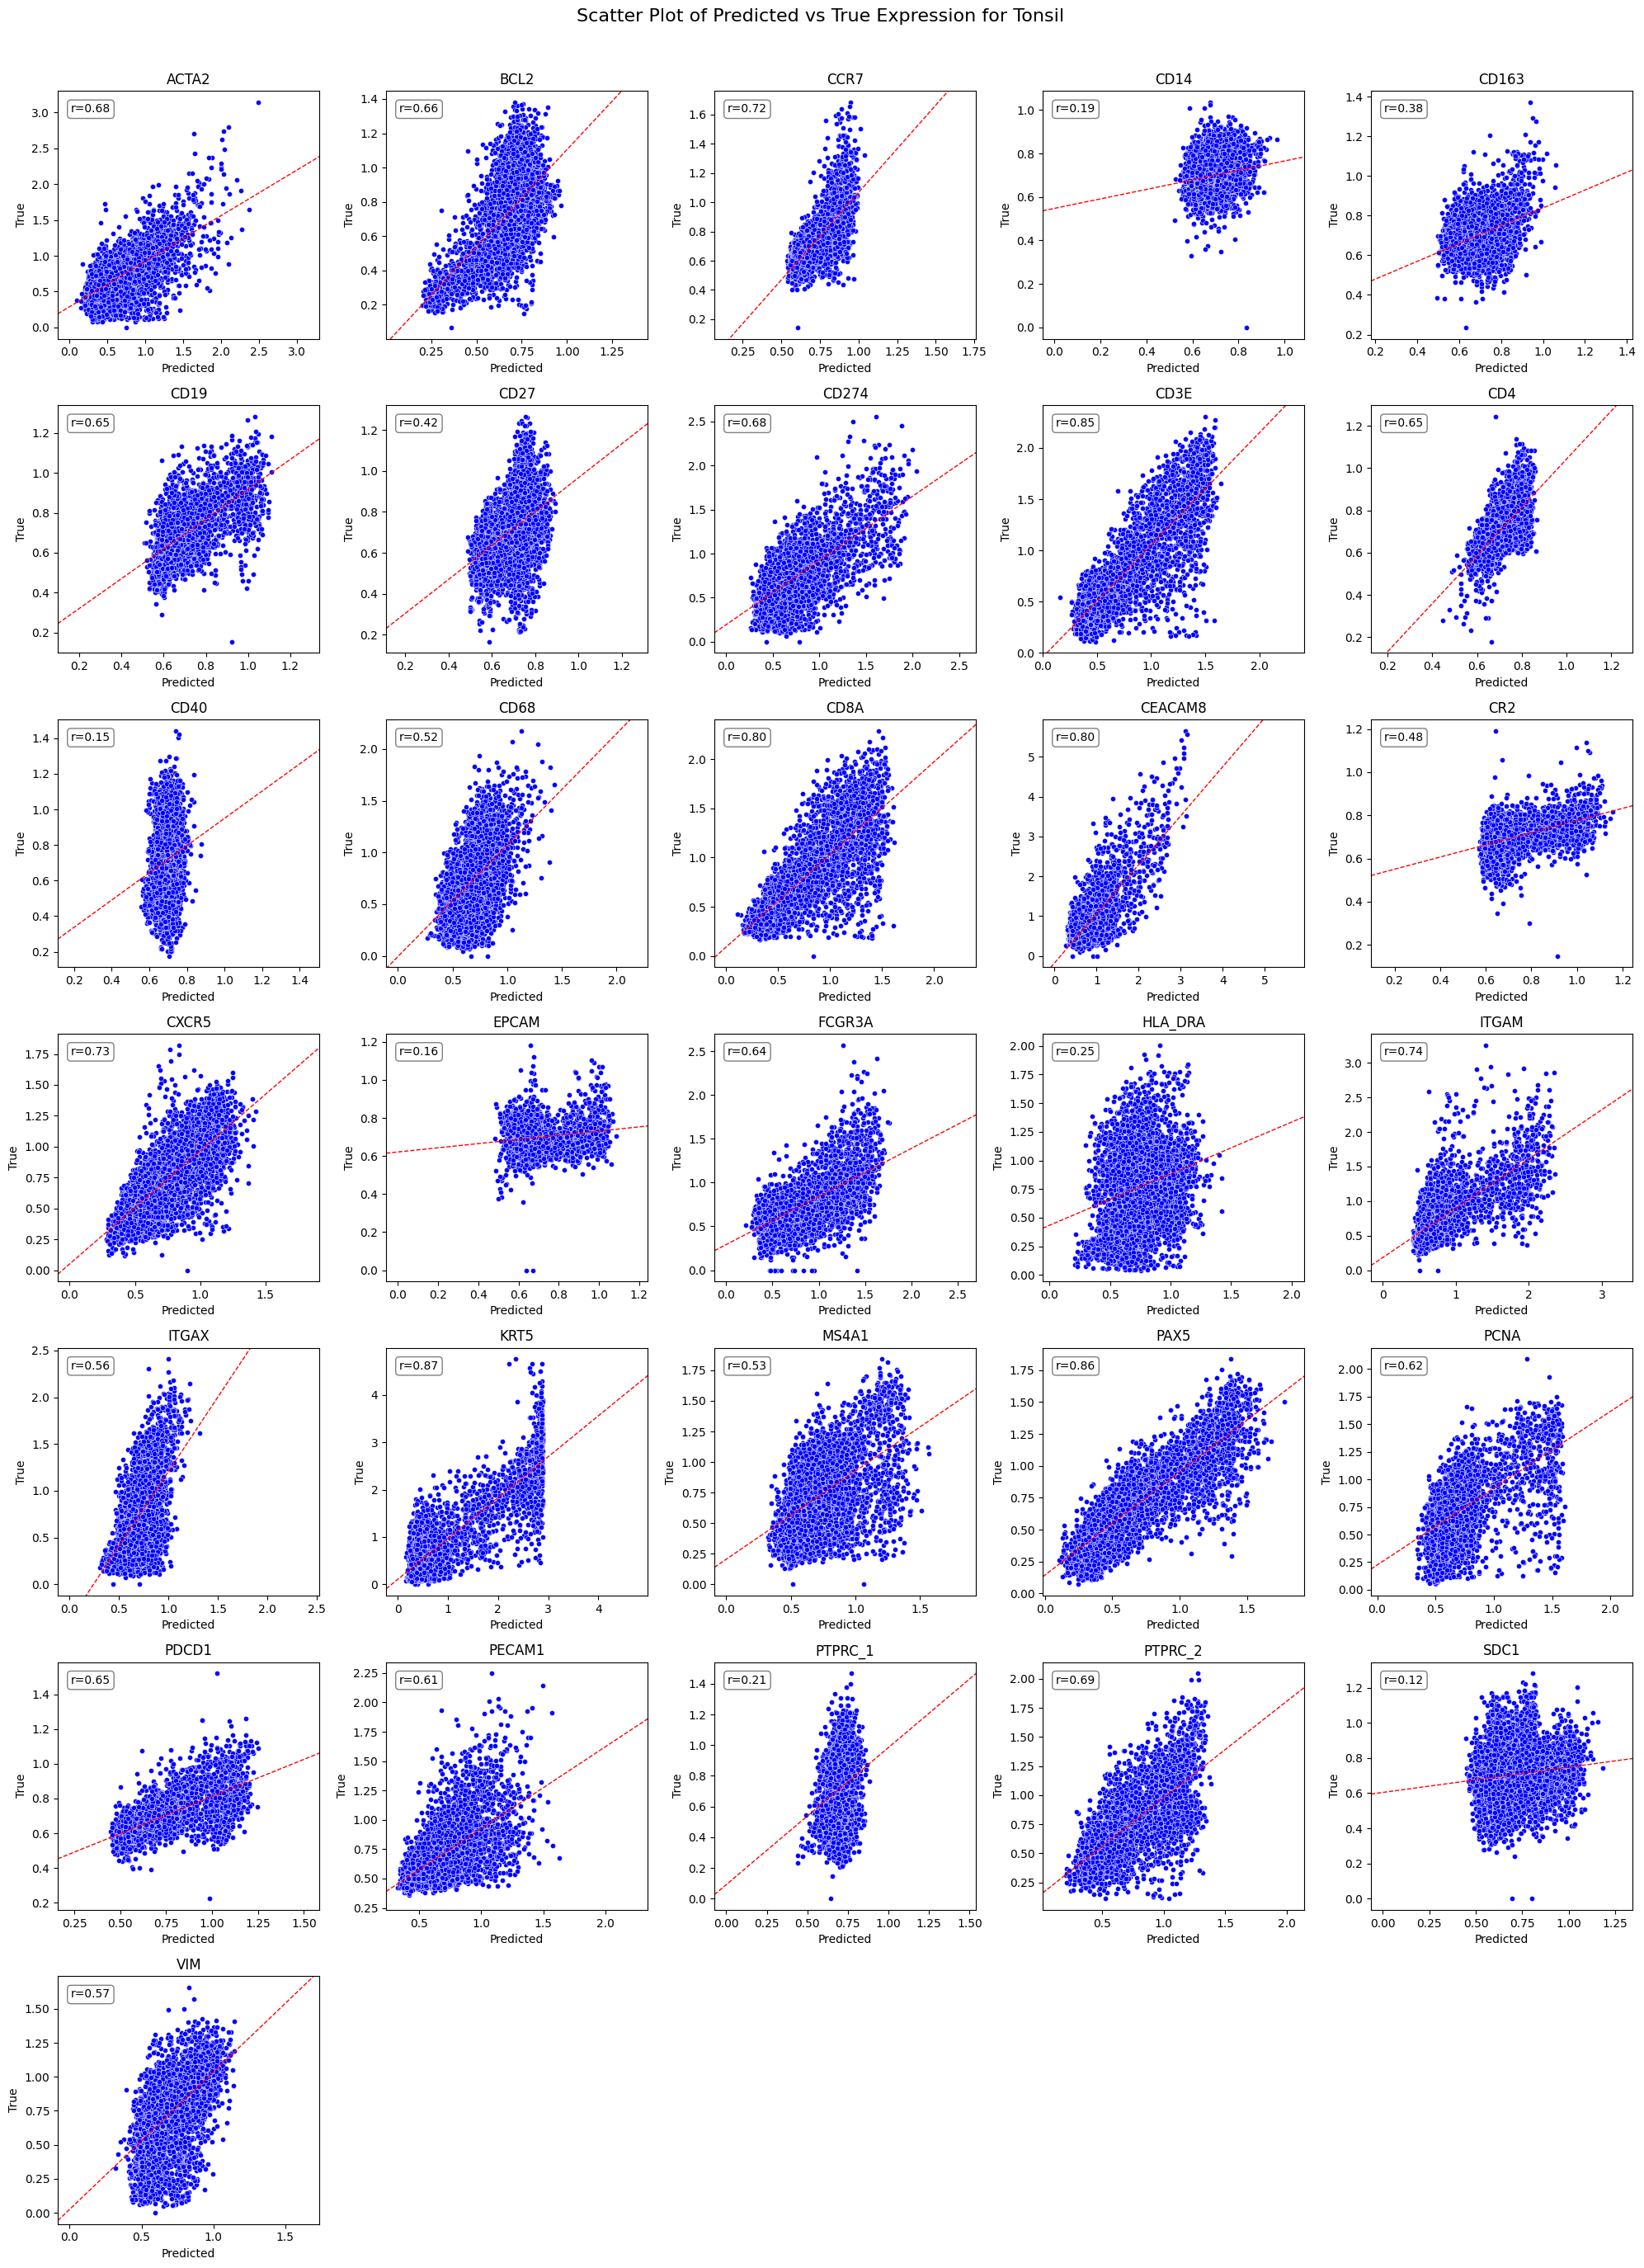

/ix/hosmanbeyoglu/haw309/DGAT_models/Tonsil_11535_gene_31_protein

=== Test sample 'Tonsil_AddOns' ===

Common genes: 11535
Common proteins: 31
Creating or loading dataset
Loading preprocessed data for sample 'CytAssist_FFPE_Protein_Expression_Human_Tonsil' from '/ix/hosmanbeyoglu/haw309/pyg_data/CytAssist_FFPE_Protein_Expression_Human_Tonsil_11535_new_spatial=6_1hop_new_filtering.pth'
Loading preprocessed data for sample 'CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer' from '/ix/hosmanbeyoglu/haw309/pyg_data/CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_11535_new_spatial=6_1hop_new_filtering.pth'
Loading preprocessed data for sample 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma' from '/ix/hosmanbeyoglu/haw309/pyg_data/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_11535_new_spatial=6_1hop_new_filtering.pth'
Loading preprocessed data for sample 'PBC-PR_6835-5A' from '/ix/hosmanbeyoglu/haw309/pyg_data/PBC-PR_6835-5A_11535_new_spatial=6_1hop_new_filtering.pth

Epoch [1/100] Total Loss: 10.3791 | mRNA Recon: 1.1860 | Protein Recon: 0.3000 | Alignment: 0.5299 | Protein Pred: 0.2943 | mRNA Pred: 1.1875
Test Loss: 12.4200
Protein-wise Spearman: Mean = 0.3906, Std = 0.3056, Median = 0.4436
Cell-wise Spearman: Mean = 0.3191, Std = 0.2016, Median = 0.3319
Number of cells with low variation: 0
Epoch 1: EB evidence = 0.8229


Epoch [2/100] Total Loss: 8.2987 | mRNA Recon: 1.0483 | Protein Recon: 0.3462 | Alignment: 0.4278 | Protein Pred: 0.3342 | mRNA Pred: 1.0494
Test Loss: 11.3951
Protein-wise Spearman: Mean = 0.4591, Std = 0.2661, Median = 0.5467
Cell-wise Spearman: Mean = 0.2996, Std = 0.2041, Median = 0.3127
Number of cells with low variation: 0
Epoch 2: EB evidence = 1.2781


Epoch [3/100] Total Loss: 7.7969 | mRNA Recon: 1.0299 | Protein Recon: 0.3639 | Alignment: 0.3557 | Protein Pred: 0.3592 | mRNA Pred: 1.0300
Test Loss: 11.3850
Protein-wise Spearman: Mean = 0.4577, Std = 0.2649, Median = 0.5161
Cell-wise Spearman: Mean = 0.3884, Std = 0.1978, Median = 0.4113
Number of cells with low variation: 0
Epoch 3: EB evidence = 0.9646


Epoch [4/100] Total Loss: 7.6527 | mRNA Recon: 1.0154 | Protein Recon: 0.2258 | Alignment: 0.3092 | Protein Pred: 0.2146 | mRNA Pred: 1.0159
Test Loss: 11.2195
Protein-wise Spearman: Mean = 0.4526, Std = 0.2489, Median = 0.4695
Cell-wise Spearman: Mean = 0.4246, Std = 0.1815, Median = 0.4435
Number of cells with low variation: 0
Epoch 4: EB evidence = 0.8096


Epoch [5/100] Total Loss: 7.5355 | mRNA Recon: 1.0069 | Protein Recon: 0.2720 | Alignment: 0.2758 | Protein Pred: 0.2540 | mRNA Pred: 1.0079
Test Loss: 11.1813
Protein-wise Spearman: Mean = 0.4465, Std = 0.2484, Median = 0.4612
Cell-wise Spearman: Mean = 0.4230, Std = 0.1969, Median = 0.4585
Number of cells with low variation: 0
Epoch 5: EB evidence = 0.8663


Epoch [6/100] Total Loss: 7.4678 | mRNA Recon: 1.0081 | Protein Recon: 0.2195 | Alignment: 0.2494 | Protein Pred: 0.2155 | mRNA Pred: 1.0087
Test Loss: 11.1027
Protein-wise Spearman: Mean = 0.4716, Std = 0.2346, Median = 0.4887
Cell-wise Spearman: Mean = 0.4662, Std = 0.1843, Median = 0.4942
Number of cells with low variation: 0
Epoch 6: EB evidence = 0.8955


Epoch [7/100] Total Loss: 7.3847 | mRNA Recon: 1.0063 | Protein Recon: 0.2098 | Alignment: 0.2288 | Protein Pred: 0.2077 | mRNA Pred: 1.0067
Test Loss: 11.0643
Protein-wise Spearman: Mean = 0.4755, Std = 0.2545, Median = 0.4899
Cell-wise Spearman: Mean = 0.4929, Std = 0.1684, Median = 0.5210
Number of cells with low variation: 0
Epoch 7: EB evidence = 0.0812


Epoch [8/100] Total Loss: 7.3318 | mRNA Recon: 1.0050 | Protein Recon: 0.2073 | Alignment: 0.2120 | Protein Pred: 0.2054 | mRNA Pred: 1.0055
Test Loss: 11.0127
Protein-wise Spearman: Mean = 0.4835, Std = 0.2612, Median = 0.5082
Cell-wise Spearman: Mean = 0.5163, Std = 0.1871, Median = 0.5411
Number of cells with low variation: 0
Epoch 8: EB evidence = 1.0118


Epoch [9/100] Total Loss: 7.2676 | mRNA Recon: 1.0033 | Protein Recon: 0.3165 | Alignment: 0.2025 | Protein Pred: 0.3262 | mRNA Pred: 1.0040
Test Loss: 10.9798
Protein-wise Spearman: Mean = 0.4951, Std = 0.2631, Median = 0.5175
Cell-wise Spearman: Mean = 0.5416, Std = 0.1654, Median = 0.5692
Number of cells with low variation: 0
Epoch 9: EB evidence = 0.9771


Epoch [10/100] Total Loss: 7.2057 | mRNA Recon: 0.9994 | Protein Recon: 0.2593 | Alignment: 0.2017 | Protein Pred: 0.2617 | mRNA Pred: 1.0007
Test Loss: 10.9300
Protein-wise Spearman: Mean = 0.5094, Std = 0.2649, Median = 0.5622
Cell-wise Spearman: Mean = 0.5684, Std = 0.1781, Median = 0.5929
Number of cells with low variation: 0
Epoch 10: Learning rate reduced.
Epoch 10: EB evidence = 0.8106


Epoch [11/100] Total Loss: 7.1567 | mRNA Recon: 1.0016 | Protein Recon: 0.2304 | Alignment: 0.1957 | Protein Pred: 0.2402 | mRNA Pred: 1.0028
Test Loss: 10.9053
Protein-wise Spearman: Mean = 0.5219, Std = 0.2561, Median = 0.5829
Cell-wise Spearman: Mean = 0.5921, Std = 0.1656, Median = 0.6137
Number of cells with low variation: 0
Epoch 11: EB evidence = 0.9966


Epoch [12/100] Total Loss: 7.1178 | mRNA Recon: 0.9958 | Protein Recon: 0.2210 | Alignment: 0.1938 | Protein Pred: 0.2482 | mRNA Pred: 0.9974
Test Loss: 10.8911
Protein-wise Spearman: Mean = 0.5428, Std = 0.2581, Median = 0.6066
Cell-wise Spearman: Mean = 0.5961, Std = 0.1724, Median = 0.6280
Number of cells with low variation: 0
Epoch 12: EB evidence = 0.8658


Epoch [13/100] Total Loss: 7.0827 | mRNA Recon: 1.0011 | Protein Recon: 0.2775 | Alignment: 0.1676 | Protein Pred: 0.2954 | mRNA Pred: 1.0022
Test Loss: 10.8431
Protein-wise Spearman: Mean = 0.5439, Std = 0.2300, Median = 0.5767
Cell-wise Spearman: Mean = 0.6016, Std = 0.1777, Median = 0.6302
Number of cells with low variation: 0
Epoch 13: EB evidence = 1.0782


Epoch [14/100] Total Loss: 7.0557 | mRNA Recon: 1.0019 | Protein Recon: 0.1731 | Alignment: 0.1527 | Protein Pred: 0.1872 | mRNA Pred: 1.0025
Test Loss: 10.8250
Protein-wise Spearman: Mean = 0.5493, Std = 0.2348, Median = 0.5959
Cell-wise Spearman: Mean = 0.6092, Std = 0.1700, Median = 0.6383
Number of cells with low variation: 0
Epoch 14: EB evidence = 0.8803


Epoch [15/100] Total Loss: 7.0142 | mRNA Recon: 0.9965 | Protein Recon: 0.1875 | Alignment: 0.1609 | Protein Pred: 0.2115 | mRNA Pred: 0.9992
Test Loss: 10.8151
Protein-wise Spearman: Mean = 0.5362, Std = 0.2612, Median = 0.6026
Cell-wise Spearman: Mean = 0.6065, Std = 0.1652, Median = 0.6313
Number of cells with low variation: 0
Epoch 15: EB evidence = 0.8631


Epoch [16/100] Total Loss: 6.9809 | mRNA Recon: 0.9901 | Protein Recon: 0.1664 | Alignment: 0.1513 | Protein Pred: 0.2001 | mRNA Pred: 0.9929
Test Loss: 10.8369
Protein-wise Spearman: Mean = 0.5625, Std = 0.2479, Median = 0.6480
Cell-wise Spearman: Mean = 0.5985, Std = 0.1769, Median = 0.6325
Number of cells with low variation: 0
Epoch 16: EB evidence = -1.1323


Epoch [17/100] Total Loss: 6.9434 | mRNA Recon: 0.9828 | Protein Recon: 0.1840 | Alignment: 0.1536 | Protein Pred: 0.2258 | mRNA Pred: 0.9852
Test Loss: 10.7328
Protein-wise Spearman: Mean = 0.5539, Std = 0.2227, Median = 0.5902
Cell-wise Spearman: Mean = 0.6244, Std = 0.1693, Median = 0.6536
Number of cells with low variation: 0
Epoch 17: EB evidence = 0.9018


Epoch [18/100] Total Loss: 6.9402 | mRNA Recon: 0.9878 | Protein Recon: 0.1569 | Alignment: 0.1435 | Protein Pred: 0.2175 | mRNA Pred: 0.9900
Test Loss: 10.9345
Protein-wise Spearman: Mean = 0.5270, Std = 0.2815, Median = 0.5961
Cell-wise Spearman: Mean = 0.5339, Std = 0.1879, Median = 0.5621
Number of cells with low variation: 0
Epoch 18: EB evidence = 0.8826


Epoch [19/100] Total Loss: 6.9421 | mRNA Recon: 1.0004 | Protein Recon: 0.1556 | Alignment: 0.1283 | Protein Pred: 0.1907 | mRNA Pred: 1.0010
Test Loss: 10.7245
Protein-wise Spearman: Mean = 0.5273, Std = 0.2757, Median = 0.5878
Cell-wise Spearman: Mean = 0.5784, Std = 0.1786, Median = 0.6119
Number of cells with low variation: 0
Epoch 19: EB evidence = 0.9645


Epoch [20/100] Total Loss: 6.9289 | mRNA Recon: 0.9888 | Protein Recon: 0.1653 | Alignment: 0.1387 | Protein Pred: 0.2108 | mRNA Pred: 0.9928
Test Loss: 10.7048
Protein-wise Spearman: Mean = 0.5563, Std = 0.2419, Median = 0.5889
Cell-wise Spearman: Mean = 0.5979, Std = 0.1771, Median = 0.6242
Number of cells with low variation: 0
Epoch 20: Learning rate reduced.
Epoch 20: EB evidence = 0.9117


Epoch [21/100] Total Loss: 6.8680 | mRNA Recon: 0.9995 | Protein Recon: 0.1498 | Alignment: 0.1188 | Protein Pred: 0.1640 | mRNA Pred: 1.0012
Test Loss: 10.6290
Protein-wise Spearman: Mean = 0.5711, Std = 0.2269, Median = 0.5745
Cell-wise Spearman: Mean = 0.6450, Std = 0.1669, Median = 0.6770
Number of cells with low variation: 0
Epoch 21: EB evidence = 0.9379


Epoch [22/100] Total Loss: 6.8208 | mRNA Recon: 0.9707 | Protein Recon: 0.1619 | Alignment: 0.1355 | Protein Pred: 0.1983 | mRNA Pred: 0.9730
Test Loss: 10.6272
Protein-wise Spearman: Mean = 0.5742, Std = 0.2416, Median = 0.6369
Cell-wise Spearman: Mean = 0.6407, Std = 0.1626, Median = 0.6677
Number of cells with low variation: 0
Epoch 22: EB evidence = 0.8743


Epoch [23/100] Total Loss: 6.7879 | mRNA Recon: 0.9695 | Protein Recon: 0.1566 | Alignment: 0.1294 | Protein Pred: 0.1901 | mRNA Pred: 0.9716
Test Loss: 10.5937
Protein-wise Spearman: Mean = 0.5756, Std = 0.2466, Median = 0.6462
Cell-wise Spearman: Mean = 0.6545, Std = 0.1602, Median = 0.6827
Number of cells with low variation: 0
Epoch 23: EB evidence = 0.9411


Epoch [24/100] Total Loss: 6.7689 | mRNA Recon: 0.9986 | Protein Recon: 0.1406 | Alignment: 0.1063 | Protein Pred: 0.1572 | mRNA Pred: 1.0005
Test Loss: 10.5738
Protein-wise Spearman: Mean = 0.5898, Std = 0.2301, Median = 0.6249
Cell-wise Spearman: Mean = 0.6599, Std = 0.1557, Median = 0.6881
Number of cells with low variation: 0
Epoch 24: EB evidence = 0.9053


Epoch [25/100] Total Loss: 6.7478 | mRNA Recon: 0.9813 | Protein Recon: 0.1467 | Alignment: 0.1173 | Protein Pred: 0.1756 | mRNA Pred: 0.9861
Test Loss: 10.5445
Protein-wise Spearman: Mean = 0.5918, Std = 0.2305, Median = 0.6283
Cell-wise Spearman: Mean = 0.6648, Std = 0.1589, Median = 0.6938
Number of cells with low variation: 0
Epoch 25: EB evidence = 0.9151


Epoch [26/100] Total Loss: 6.7339 | mRNA Recon: 0.9668 | Protein Recon: 0.1499 | Alignment: 0.1187 | Protein Pred: 0.1891 | mRNA Pred: 0.9685
Test Loss: 10.5290
Protein-wise Spearman: Mean = 0.5861, Std = 0.2354, Median = 0.6318
Cell-wise Spearman: Mean = 0.6555, Std = 0.1638, Median = 0.6871
Number of cells with low variation: 0
Epoch 26: EB evidence = 0.8650


Epoch [27/100] Total Loss: 6.7128 | mRNA Recon: 0.9793 | Protein Recon: 0.1389 | Alignment: 0.1119 | Protein Pred: 0.1676 | mRNA Pred: 0.9844
Test Loss: 10.5055
Protein-wise Spearman: Mean = 0.5844, Std = 0.2418, Median = 0.6538
Cell-wise Spearman: Mean = 0.6618, Std = 0.1545, Median = 0.6891
Number of cells with low variation: 0
Epoch 27: EB evidence = 0.9725


Epoch [28/100] Total Loss: 6.6986 | mRNA Recon: 0.9980 | Protein Recon: 0.1313 | Alignment: 0.0955 | Protein Pred: 0.1517 | mRNA Pred: 1.0002
Test Loss: 10.4950
Protein-wise Spearman: Mean = 0.5787, Std = 0.2448, Median = 0.6367
Cell-wise Spearman: Mean = 0.6547, Std = 0.1628, Median = 0.6855
Number of cells with low variation: 0
Epoch 28: EB evidence = 0.8972


Epoch [29/100] Total Loss: 6.7110 | mRNA Recon: 0.9648 | Protein Recon: 0.1469 | Alignment: 0.1107 | Protein Pred: 0.1948 | mRNA Pred: 0.9668
Test Loss: 10.4723
Protein-wise Spearman: Mean = 0.5954, Std = 0.2239, Median = 0.6219
Cell-wise Spearman: Mean = 0.6700, Std = 0.1594, Median = 0.6986
Number of cells with low variation: 0
Epoch 29: EB evidence = 0.5171


Epoch [30/100] Total Loss: 6.6746 | mRNA Recon: 0.9942 | Protein Recon: 0.1961 | Alignment: 0.1007 | Protein Pred: 0.2495 | mRNA Pred: 0.9980
Test Loss: 10.5343
Protein-wise Spearman: Mean = 0.5803, Std = 0.2529, Median = 0.6246
Cell-wise Spearman: Mean = 0.6382, Std = 0.1677, Median = 0.6681
Number of cells with low variation: 0
Epoch 30: Learning rate reduced.
Epoch 30: EB evidence = 0.9474


Epoch [31/100] Total Loss: 6.6867 | mRNA Recon: 0.9938 | Protein Recon: 0.1981 | Alignment: 0.0992 | Protein Pred: 0.2408 | mRNA Pred: 0.9980
Test Loss: 10.4942
Protein-wise Spearman: Mean = 0.5723, Std = 0.2632, Median = 0.6278
Cell-wise Spearman: Mean = 0.6595, Std = 0.1549, Median = 0.6871
Number of cells with low variation: 0
Epoch 31: EB evidence = 0.9230


Epoch [32/100] Total Loss: 6.6698 | mRNA Recon: 0.9755 | Protein Recon: 0.1329 | Alignment: 0.1046 | Protein Pred: 0.1682 | mRNA Pred: 0.9803
Test Loss: 10.4699
Protein-wise Spearman: Mean = 0.5595, Std = 0.2533, Median = 0.5934
Cell-wise Spearman: Mean = 0.6475, Std = 0.1603, Median = 0.6738
Number of cells with low variation: 0
Epoch 32: EB evidence = 0.9012


Epoch [33/100] Total Loss: 6.6521 | mRNA Recon: 0.9745 | Protein Recon: 0.1312 | Alignment: 0.1014 | Protein Pred: 0.1701 | mRNA Pred: 0.9795
Test Loss: 10.4559
Protein-wise Spearman: Mean = 0.5933, Std = 0.2227, Median = 0.6357
Cell-wise Spearman: Mean = 0.6599, Std = 0.1573, Median = 0.6857
Number of cells with low variation: 0
Epoch 33: EB evidence = 0.7837


Epoch [34/100] Total Loss: 6.6420 | mRNA Recon: 0.9769 | Protein Recon: 0.1176 | Alignment: 0.0967 | Protein Pred: 0.1526 | mRNA Pred: 0.9818
Test Loss: 10.5479
Protein-wise Spearman: Mean = 0.5778, Std = 0.2459, Median = 0.5888
Cell-wise Spearman: Mean = 0.6430, Std = 0.1653, Median = 0.6738
Number of cells with low variation: 0
Epoch 34: EB evidence = 0.9577


Epoch [35/100] Total Loss: 6.6531 | mRNA Recon: 0.9773 | Protein Recon: 0.1177 | Alignment: 0.0943 | Protein Pred: 0.1546 | mRNA Pred: 0.9814
Test Loss: 10.5273
Protein-wise Spearman: Mean = 0.5866, Std = 0.2571, Median = 0.6253
Cell-wise Spearman: Mean = 0.6453, Std = 0.1675, Median = 0.6742
Number of cells with low variation: 0
Epoch 35: EB evidence = 0.9172


Epoch [36/100] Total Loss: 6.6174 | mRNA Recon: 0.9768 | Protein Recon: 0.1141 | Alignment: 0.0945 | Protein Pred: 0.1451 | mRNA Pred: 0.9818
Test Loss: 10.4075
Protein-wise Spearman: Mean = 0.5956, Std = 0.2467, Median = 0.6636
Cell-wise Spearman: Mean = 0.6745, Std = 0.1552, Median = 0.7048
Number of cells with low variation: 0
Epoch 36: EB evidence = 0.9356


Epoch [37/100] Total Loss: 6.6102 | mRNA Recon: 0.9614 | Protein Recon: 0.1310 | Alignment: 0.1010 | Protein Pred: 0.1656 | mRNA Pred: 0.9639
Test Loss: 10.4281
Protein-wise Spearman: Mean = 0.5986, Std = 0.2308, Median = 0.6424
Cell-wise Spearman: Mean = 0.6556, Std = 0.1649, Median = 0.6839
Number of cells with low variation: 0
Epoch 37: EB evidence = 1.1211


Epoch [38/100] Total Loss: 6.6012 | mRNA Recon: 0.9615 | Protein Recon: 0.1272 | Alignment: 0.0996 | Protein Pred: 0.1641 | mRNA Pred: 0.9636
Test Loss: 10.4103
Protein-wise Spearman: Mean = 0.5959, Std = 0.2402, Median = 0.6471
Cell-wise Spearman: Mean = 0.6688, Std = 0.1584, Median = 0.6994
Number of cells with low variation: 0
Epoch 38: EB evidence = 0.8696


Epoch [39/100] Total Loss: 6.5909 | mRNA Recon: 0.9974 | Protein Recon: 0.1117 | Alignment: 0.0811 | Protein Pred: 0.1393 | mRNA Pred: 0.9995
Test Loss: 10.4538
Protein-wise Spearman: Mean = 0.5975, Std = 0.2428, Median = 0.6578
Cell-wise Spearman: Mean = 0.6515, Std = 0.1640, Median = 0.6815
Number of cells with low variation: 0
Epoch 39: EB evidence = 0.9937


Epoch [40/100] Total Loss: 6.5921 | mRNA Recon: 0.9929 | Protein Recon: 0.1731 | Alignment: 0.0880 | Protein Pred: 0.2323 | mRNA Pred: 0.9971
Test Loss: 10.4297
Protein-wise Spearman: Mean = 0.5901, Std = 0.2396, Median = 0.6338
Cell-wise Spearman: Mean = 0.6519, Std = 0.1663, Median = 0.6794
Number of cells with low variation: 0
Epoch 40: Learning rate reduced.
Epoch 40: EB evidence = 0.9270


Epoch [41/100] Total Loss: 6.5927 | mRNA Recon: 0.9687 | Protein Recon: 0.1179 | Alignment: 0.0940 | Protein Pred: 0.1578 | mRNA Pred: 0.9742
Test Loss: 10.4587
Protein-wise Spearman: Mean = 0.5858, Std = 0.2456, Median = 0.5760
Cell-wise Spearman: Mean = 0.6223, Std = 0.1753, Median = 0.6520
Number of cells with low variation: 0
Epoch 41: EB evidence = 0.8958


Epoch [42/100] Total Loss: 6.5959 | mRNA Recon: 0.9970 | Protein Recon: 0.1110 | Alignment: 0.0804 | Protein Pred: 0.1407 | mRNA Pred: 0.9994
Test Loss: 10.3813
Protein-wise Spearman: Mean = 0.5887, Std = 0.2531, Median = 0.6337
Cell-wise Spearman: Mean = 0.6677, Std = 0.1577, Median = 0.6976
Number of cells with low variation: 0
Epoch 42: EB evidence = 0.9539


Epoch [43/100] Total Loss: 6.5733 | mRNA Recon: 0.9929 | Protein Recon: 0.1711 | Alignment: 0.0869 | Protein Pred: 0.2210 | mRNA Pred: 0.9968
Test Loss: 10.3722
Protein-wise Spearman: Mean = 0.6028, Std = 0.2367, Median = 0.6588
Cell-wise Spearman: Mean = 0.6814, Std = 0.1535, Median = 0.7113
Number of cells with low variation: 0
Epoch 43: EB evidence = 0.9444


Epoch [44/100] Total Loss: 6.5560 | mRNA Recon: 0.9747 | Protein Recon: 0.1055 | Alignment: 0.0877 | Protein Pred: 0.1400 | mRNA Pred: 0.9794
Test Loss: 10.4198
Protein-wise Spearman: Mean = 0.5989, Std = 0.2380, Median = 0.6197
Cell-wise Spearman: Mean = 0.6711, Std = 0.1597, Median = 0.7012
Number of cells with low variation: 0
Epoch 44: EB evidence = 0.9187


Epoch [45/100] Total Loss: 6.5586 | mRNA Recon: 0.9651 | Protein Recon: 0.1145 | Alignment: 0.0919 | Protein Pred: 0.1472 | mRNA Pred: 0.9725
Test Loss: 10.4150
Protein-wise Spearman: Mean = 0.5922, Std = 0.2363, Median = 0.5988
Cell-wise Spearman: Mean = 0.6656, Std = 0.1643, Median = 0.6976
Number of cells with low variation: 0
Epoch 45: EB evidence = 0.9269


Epoch [46/100] Total Loss: 6.5650 | mRNA Recon: 0.9753 | Protein Recon: 0.1048 | Alignment: 0.0853 | Protein Pred: 0.1656 | mRNA Pred: 0.9791
Test Loss: 10.4009
Protein-wise Spearman: Mean = 0.5973, Std = 0.2285, Median = 0.6431
Cell-wise Spearman: Mean = 0.6680, Std = 0.1533, Median = 0.6964
Number of cells with low variation: 0
Epoch 46: EB evidence = 0.8940


Epoch [47/100] Total Loss: 6.5396 | mRNA Recon: 0.9743 | Protein Recon: 0.1012 | Alignment: 0.0839 | Protein Pred: 0.1345 | mRNA Pred: 0.9788
Test Loss: 10.3742
Protein-wise Spearman: Mean = 0.5973, Std = 0.2336, Median = 0.6478
Cell-wise Spearman: Mean = 0.6697, Std = 0.1562, Median = 0.6968
Number of cells with low variation: 0
Epoch 47: EB evidence = 0.9374


Epoch [48/100] Total Loss: 6.5287 | mRNA Recon: 0.9650 | Protein Recon: 0.1146 | Alignment: 0.0878 | Protein Pred: 0.1396 | mRNA Pred: 0.9713
Test Loss: 10.3597
Protein-wise Spearman: Mean = 0.6098, Std = 0.2372, Median = 0.6716
Cell-wise Spearman: Mean = 0.6795, Std = 0.1534, Median = 0.7085
Number of cells with low variation: 0
Epoch 48: EB evidence = 0.9400


Epoch [49/100] Total Loss: 6.5248 | mRNA Recon: 0.9920 | Protein Recon: 0.1638 | Alignment: 0.0791 | Protein Pred: 0.2103 | mRNA Pred: 0.9964
Test Loss: 10.3629
Protein-wise Spearman: Mean = 0.5994, Std = 0.2304, Median = 0.6482
Cell-wise Spearman: Mean = 0.6735, Std = 0.1614, Median = 0.7044
Number of cells with low variation: 0
Epoch 49: EB evidence = 0.9642


Epoch [50/100] Total Loss: 6.5180 | mRNA Recon: 0.9597 | Protein Recon: 0.1200 | Alignment: 0.0852 | Protein Pred: 0.1460 | mRNA Pred: 0.9626
Test Loss: 10.3833
Protein-wise Spearman: Mean = 0.5950, Std = 0.2355, Median = 0.6623
Cell-wise Spearman: Mean = 0.6657, Std = 0.1612, Median = 0.6990
Number of cells with low variation: 0
Epoch 50: Learning rate reduced.
Epoch 50: EB evidence = 0.9429


Epoch [51/100] Total Loss: 6.5040 | mRNA Recon: 0.9625 | Protein Recon: 0.1116 | Alignment: 0.0858 | Protein Pred: 0.1325 | mRNA Pred: 0.9697
Test Loss: 10.3561
Protein-wise Spearman: Mean = 0.6060, Std = 0.2361, Median = 0.6600
Cell-wise Spearman: Mean = 0.6813, Std = 0.1569, Median = 0.7113
Number of cells with low variation: 0
Epoch 51: EB evidence = 0.9453


Epoch [52/100] Total Loss: 6.5029 | mRNA Recon: 0.9919 | Protein Recon: 0.1600 | Alignment: 0.0766 | Protein Pred: 0.2050 | mRNA Pred: 0.9961
Test Loss: 10.3773
Protein-wise Spearman: Mean = 0.6114, Std = 0.2326, Median = 0.6687
Cell-wise Spearman: Mean = 0.6766, Std = 0.1557, Median = 0.7067
Number of cells with low variation: 0
Epoch 52: EB evidence = 0.9641


Epoch [53/100] Total Loss: 6.4933 | mRNA Recon: 0.9593 | Protein Recon: 0.1123 | Alignment: 0.0840 | Protein Pred: 0.1390 | mRNA Pred: 0.9620
Test Loss: 10.3543
Protein-wise Spearman: Mean = 0.6086, Std = 0.2350, Median = 0.6708
Cell-wise Spearman: Mean = 0.6841, Std = 0.1540, Median = 0.7153
Number of cells with low variation: 0
Epoch 53: EB evidence = -2.2318


Epoch [54/100] Total Loss: 6.4843 | mRNA Recon: 0.9919 | Protein Recon: 0.1562 | Alignment: 0.0759 | Protein Pred: 0.2006 | mRNA Pred: 0.9963
Test Loss: 10.3499
Protein-wise Spearman: Mean = 0.6110, Std = 0.2307, Median = 0.6679
Cell-wise Spearman: Mean = 0.6841, Std = 0.1524, Median = 0.7145
Number of cells with low variation: 0
Epoch 54: EB evidence = 0.9778


Epoch [55/100] Total Loss: 6.4764 | mRNA Recon: 0.9719 | Protein Recon: 0.0962 | Alignment: 0.0772 | Protein Pred: 0.1217 | mRNA Pred: 0.9774
Test Loss: 10.3308
Protein-wise Spearman: Mean = 0.6084, Std = 0.2272, Median = 0.6559
Cell-wise Spearman: Mean = 0.6839, Std = 0.1566, Median = 0.7157
Number of cells with low variation: 0
Epoch 55: EB evidence = 0.9716


Epoch [56/100] Total Loss: 6.4685 | mRNA Recon: 0.9963 | Protein Recon: 0.0964 | Alignment: 0.0689 | Protein Pred: 0.1214 | mRNA Pred: 0.9989
Test Loss: 10.3515
Protein-wise Spearman: Mean = 0.6109, Std = 0.2295, Median = 0.6616
Cell-wise Spearman: Mean = 0.6836, Std = 0.1545, Median = 0.7145
Number of cells with low variation: 0
Epoch 56: EB evidence = 0.9755


Epoch [57/100] Total Loss: 6.4631 | mRNA Recon: 0.9714 | Protein Recon: 0.0935 | Alignment: 0.0763 | Protein Pred: 0.1214 | mRNA Pred: 0.9768
Test Loss: 10.3243
Protein-wise Spearman: Mean = 0.6067, Std = 0.2323, Median = 0.6590
Cell-wise Spearman: Mean = 0.6828, Std = 0.1586, Median = 0.7165
Number of cells with low variation: 0
Epoch 57: EB evidence = 0.9693


Epoch [58/100] Total Loss: 6.4572 | mRNA Recon: 0.9916 | Protein Recon: 0.1506 | Alignment: 0.0732 | Protein Pred: 0.1950 | mRNA Pred: 0.9959
Test Loss: 10.3397
Protein-wise Spearman: Mean = 0.6106, Std = 0.2335, Median = 0.6650
Cell-wise Spearman: Mean = 0.6873, Std = 0.1525, Median = 0.7194
Number of cells with low variation: 0
Epoch 58: EB evidence = 0.9800


Epoch [59/100] Total Loss: 6.4518 | mRNA Recon: 0.9915 | Protein Recon: 0.1498 | Alignment: 0.0726 | Protein Pred: 0.1932 | mRNA Pred: 0.9959
Test Loss: 10.3273
Protein-wise Spearman: Mean = 0.6182, Std = 0.2194, Median = 0.6638
Cell-wise Spearman: Mean = 0.6890, Std = 0.1556, Median = 0.7202
Number of cells with low variation: 0
Epoch 59: EB evidence = 0.9907


Epoch [60/100] Total Loss: 6.4450 | mRNA Recon: 0.9914 | Protein Recon: 0.1496 | Alignment: 0.0719 | Protein Pred: 0.1908 | mRNA Pred: 0.9958
Test Loss: 10.3293
Protein-wise Spearman: Mean = 0.6118, Std = 0.2271, Median = 0.6540
Cell-wise Spearman: Mean = 0.6856, Std = 0.1554, Median = 0.7169
Number of cells with low variation: 0
Epoch 60: Learning rate reduced.
Epoch 60: EB evidence = 0.9800


Epoch [61/100] Total Loss: 6.4398 | mRNA Recon: 0.9581 | Protein Recon: 0.1032 | Alignment: 0.0786 | Protein Pred: 0.1275 | mRNA Pred: 0.9609
Test Loss: 10.3238
Protein-wise Spearman: Mean = 0.6127, Std = 0.2273, Median = 0.6608
Cell-wise Spearman: Mean = 0.6867, Std = 0.1530, Median = 0.7173
Number of cells with low variation: 0
Epoch 61: EB evidence = 0.9751


Epoch [62/100] Total Loss: 6.4353 | mRNA Recon: 0.9579 | Protein Recon: 0.1024 | Alignment: 0.0776 | Protein Pred: 0.1262 | mRNA Pred: 0.9608
Test Loss: 10.3190
Protein-wise Spearman: Mean = 0.6134, Std = 0.2236, Median = 0.6568
Cell-wise Spearman: Mean = 0.6865, Std = 0.1561, Median = 0.7185
Number of cells with low variation: 0
Epoch 62: EB evidence = 0.9694


Epoch [63/100] Total Loss: 6.4308 | mRNA Recon: 0.9700 | Protein Recon: 0.0890 | Alignment: 0.0732 | Protein Pred: 0.1145 | mRNA Pred: 0.9757
Test Loss: 10.3333
Protein-wise Spearman: Mean = 0.6149, Std = 0.2273, Median = 0.6604
Cell-wise Spearman: Mean = 0.6902, Std = 0.1534, Median = 0.7218
Number of cells with low variation: 0
Epoch 63: EB evidence = 0.9776
--> EB early stopping at epoch 63 (mean_evidence=0.9767, threshold=0.96)
Test Loss: 10.3333
Protein-wise Spearman: Mean = 0.6149, Std = 0.2273, Median = 0.6604
Cell-wise Spearman: Mean = 0.6902, Std = 0.1534, Median = 0.7218
Number of cells with low variation: 0
Average Cell Pearson Cor in test data:  0.7732901546386514
Average Cell Spearman Cor in test data:  0.6902300071710689
Average Protein Cor in test data: 0.6572

Average RMSE in test data: 0.2083



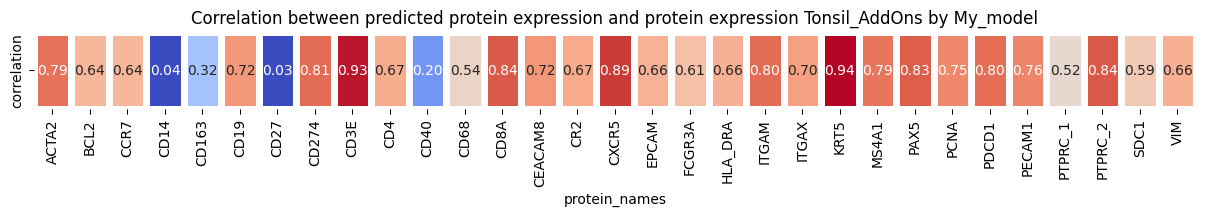

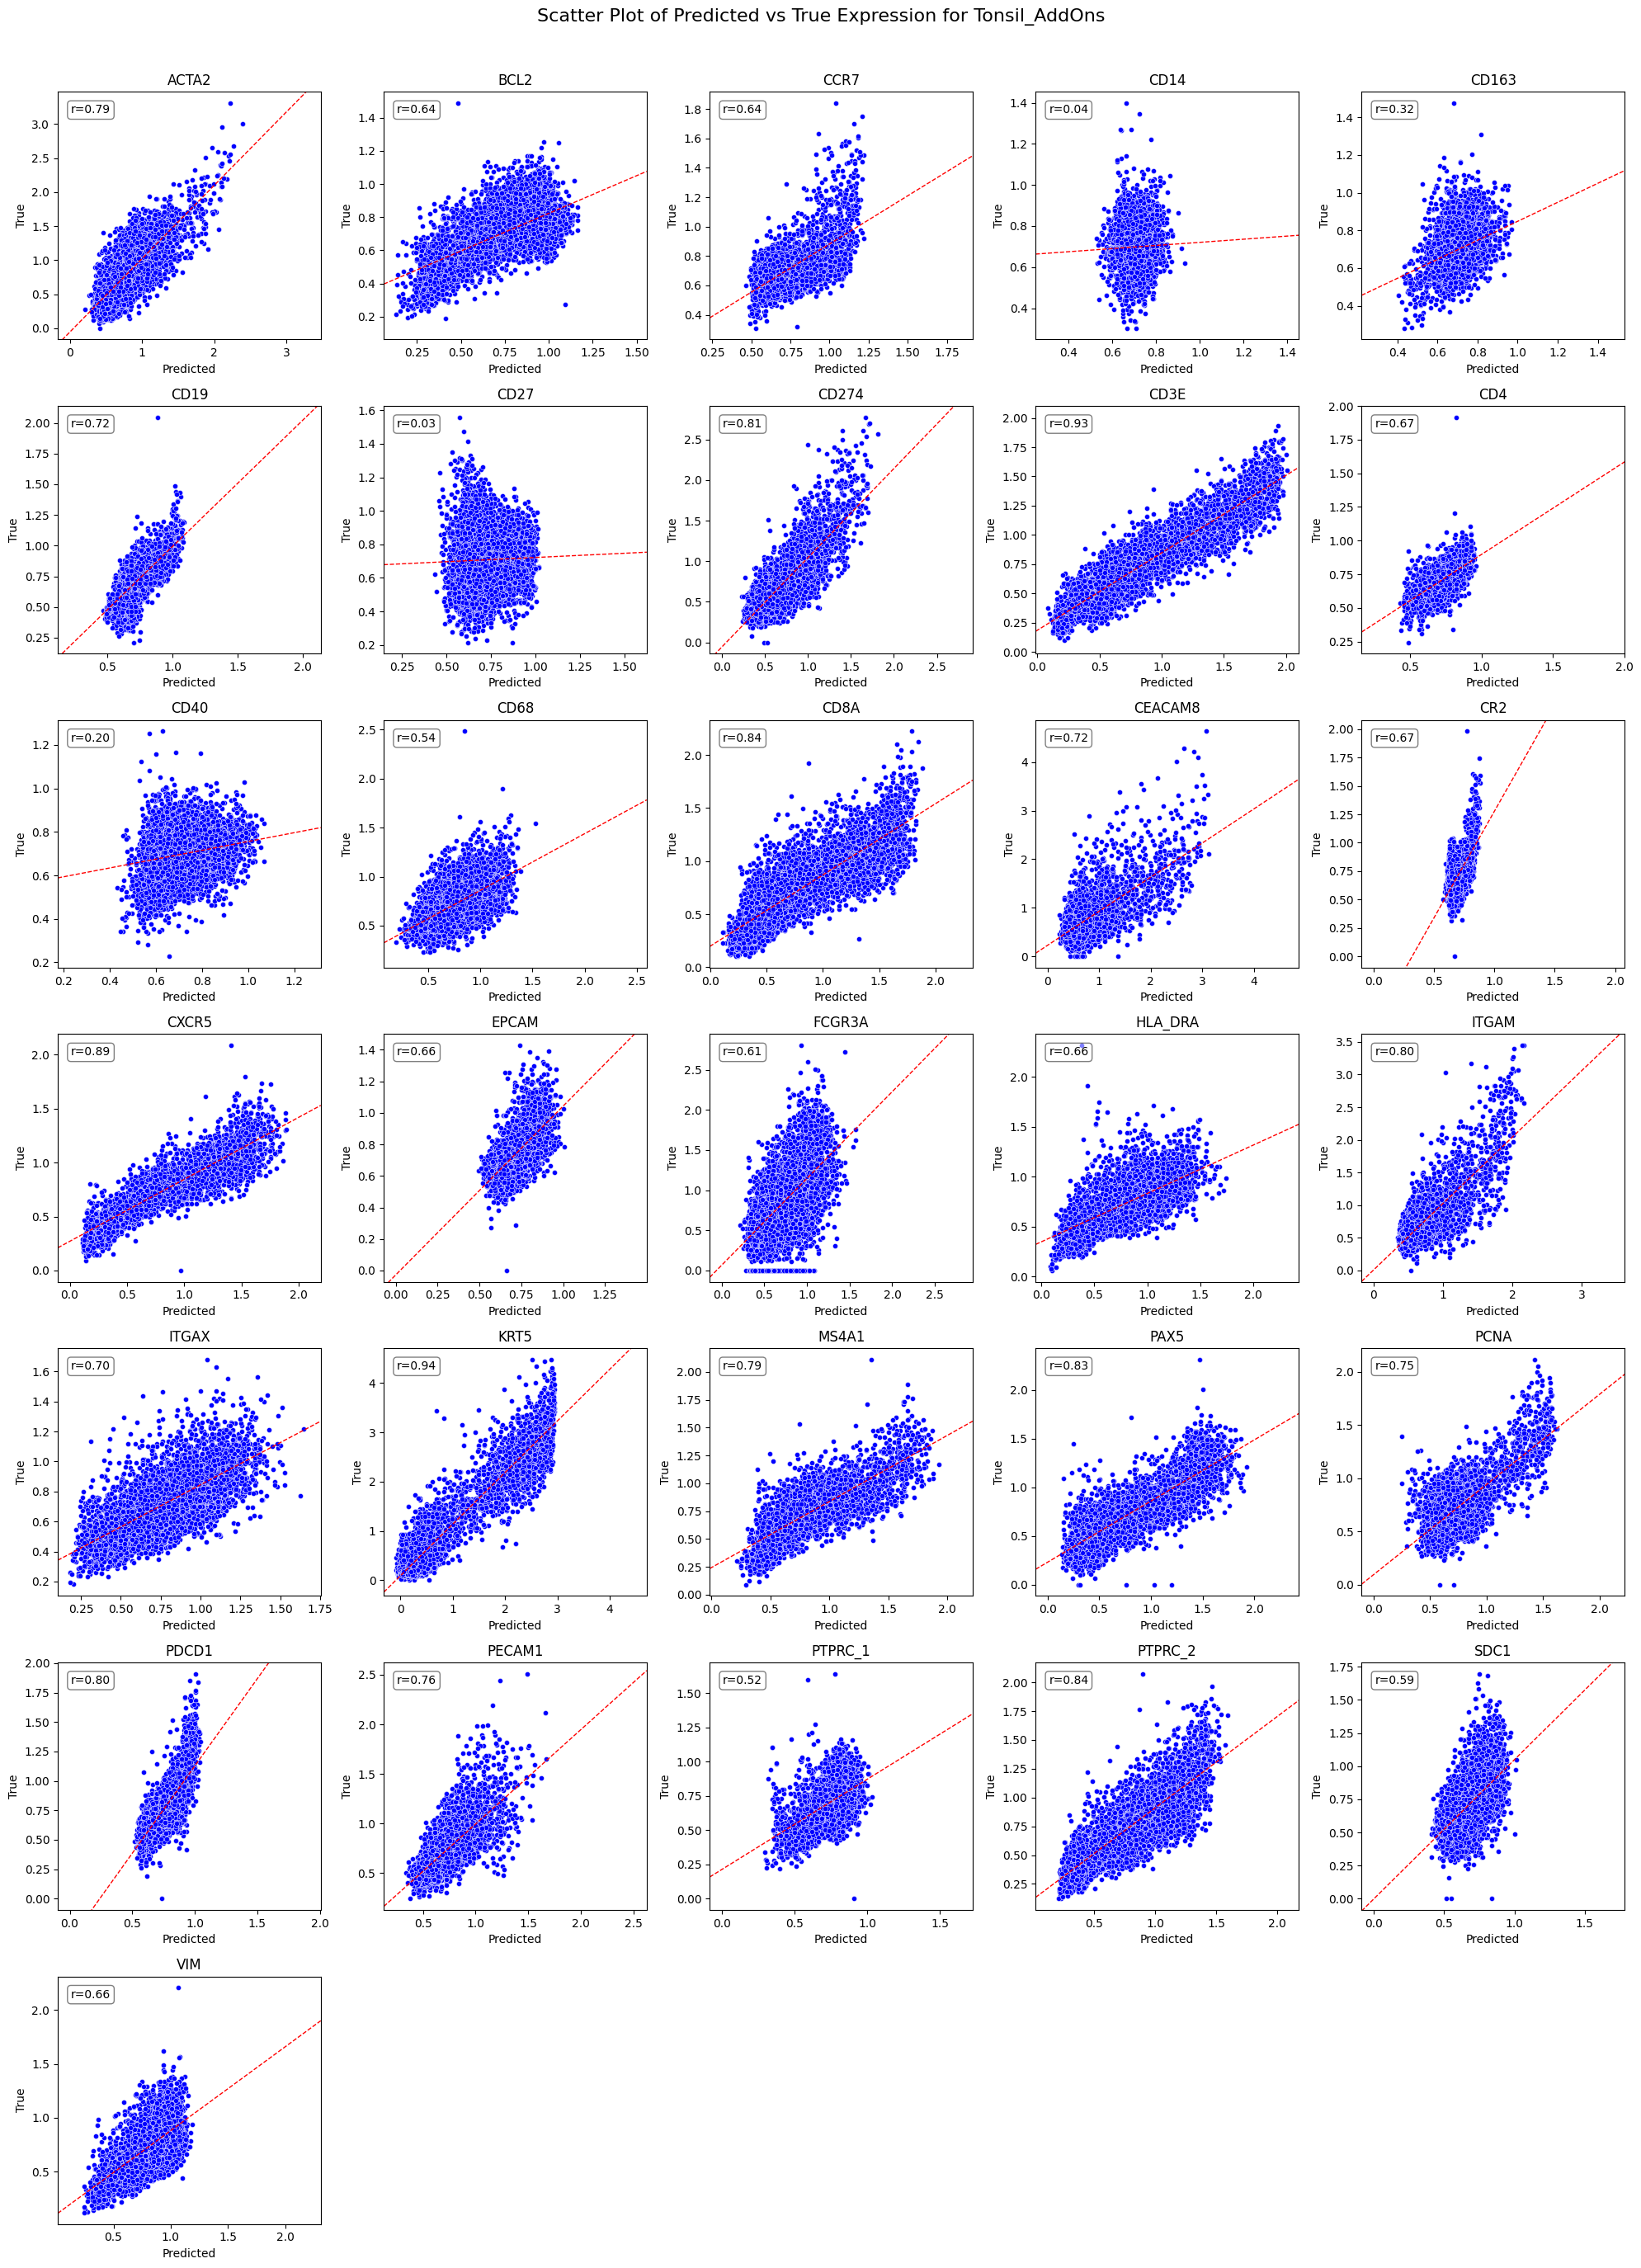

/ix/hosmanbeyoglu/haw309/DGAT_models/Tonsil_AddOns_11535_gene_31_protein

=== Test sample 'Breast' ===

Common genes: 11535
Common proteins: 31
Creating or loading dataset
Loading preprocessed data for sample 'CytAssist_FFPE_Protein_Expression_Human_Tonsil' from '/ix/hosmanbeyoglu/haw309/pyg_data/CytAssist_FFPE_Protein_Expression_Human_Tonsil_11535_new_spatial=6_1hop_new_filtering.pth'
Loading preprocessed data for sample 'CytAssist_FFPE_Protein_Expression_Human_Tonsil_AddOns' from '/ix/hosmanbeyoglu/haw309/pyg_data/CytAssist_FFPE_Protein_Expression_Human_Tonsil_AddOns_11535_new_spatial=6_1hop_new_filtering.pth'
Loading preprocessed data for sample 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma' from '/ix/hosmanbeyoglu/haw309/pyg_data/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_11535_new_spatial=6_1hop_new_filtering.pth'
Loading preprocessed data for sample 'PBC-PR_6835-5A' from '/ix/hosmanbeyoglu/haw309/pyg_data/PBC-PR_6835-5A_11535_new_spatial=6_1hop_new_filtering.pth

Epoch [1/100] Total Loss: 10.4154 | mRNA Recon: 1.1844 | Protein Recon: 0.2528 | Alignment: 0.5318 | Protein Pred: 0.2454 | mRNA Pred: 1.1953
Test Loss: 12.6686
Protein-wise Spearman: Mean = 0.3157, Std = 0.3597, Median = 0.3334
Cell-wise Spearman: Mean = 0.2288, Std = 0.1574, Median = 0.2337
Number of cells with low variation: 0
Epoch 1: EB evidence = 2.0291


Epoch [2/100] Total Loss: 8.2514 | mRNA Recon: 1.0423 | Protein Recon: 0.2893 | Alignment: 0.4268 | Protein Pred: 0.2820 | mRNA Pred: 1.0448
Test Loss: 11.6087
Protein-wise Spearman: Mean = 0.3735, Std = 0.3644, Median = 0.4136
Cell-wise Spearman: Mean = 0.2067, Std = 0.1677, Median = 0.2157
Number of cells with low variation: 0
Epoch 2: EB evidence = 0.2208


Epoch [3/100] Total Loss: 7.7524 | mRNA Recon: 1.0302 | Protein Recon: 0.3181 | Alignment: 0.3622 | Protein Pred: 0.2923 | mRNA Pred: 1.0305
Test Loss: 11.6418
Protein-wise Spearman: Mean = 0.3882, Std = 0.3663, Median = 0.4304
Cell-wise Spearman: Mean = 0.2540, Std = 0.2308, Median = 0.2776
Number of cells with low variation: 0
Epoch 3: EB evidence = 0.7299


Epoch [4/100] Total Loss: 7.6037 | mRNA Recon: 1.0151 | Protein Recon: 0.3261 | Alignment: 0.3142 | Protein Pred: 0.2981 | mRNA Pred: 1.0162
Test Loss: 11.4705
Protein-wise Spearman: Mean = 0.3893, Std = 0.3556, Median = 0.4072
Cell-wise Spearman: Mean = 0.3362, Std = 0.1920, Median = 0.3593
Number of cells with low variation: 0
Epoch 4: EB evidence = -1.8366


Epoch [5/100] Total Loss: 7.4767 | mRNA Recon: 1.0120 | Protein Recon: 0.2243 | Alignment: 0.2686 | Protein Pred: 0.2157 | mRNA Pred: 1.0127
Test Loss: 11.4469
Protein-wise Spearman: Mean = 0.3829, Std = 0.3680, Median = 0.4114
Cell-wise Spearman: Mean = 0.3278, Std = 0.1995, Median = 0.3601
Number of cells with low variation: 0
Epoch 5: EB evidence = 0.8740


Epoch [6/100] Total Loss: 7.3938 | mRNA Recon: 1.0073 | Protein Recon: 0.3498 | Alignment: 0.2434 | Protein Pred: 0.3492 | mRNA Pred: 1.0083
Test Loss: 11.3891
Protein-wise Spearman: Mean = 0.3941, Std = 0.3753, Median = 0.4569
Cell-wise Spearman: Mean = 0.3711, Std = 0.1822, Median = 0.3899
Number of cells with low variation: 0
Epoch 6: EB evidence = 0.9845


Epoch [7/100] Total Loss: 7.3335 | mRNA Recon: 1.0009 | Protein Recon: 0.2563 | Alignment: 0.2310 | Protein Pred: 0.2492 | mRNA Pred: 1.0017
Test Loss: 11.3871
Protein-wise Spearman: Mean = 0.3896, Std = 0.3822, Median = 0.5180
Cell-wise Spearman: Mean = 0.3224, Std = 0.1899, Median = 0.3524
Number of cells with low variation: 0
Epoch 7: EB evidence = 0.8065


Epoch [8/100] Total Loss: 7.2723 | mRNA Recon: 1.0052 | Protein Recon: 0.2061 | Alignment: 0.2109 | Protein Pred: 0.1988 | mRNA Pred: 1.0056
Test Loss: 11.3340
Protein-wise Spearman: Mean = 0.3905, Std = 0.3512, Median = 0.4675
Cell-wise Spearman: Mean = 0.3876, Std = 0.1832, Median = 0.4069
Number of cells with low variation: 0
Epoch 8: EB evidence = 0.9747


Epoch [9/100] Total Loss: 7.2132 | mRNA Recon: 1.0043 | Protein Recon: 0.1934 | Alignment: 0.1991 | Protein Pred: 0.1950 | mRNA Pred: 1.0049
Test Loss: 11.3054
Protein-wise Spearman: Mean = 0.3920, Std = 0.3533, Median = 0.4817
Cell-wise Spearman: Mean = 0.3786, Std = 0.1817, Median = 0.3968
Number of cells with low variation: 0
Epoch 9: EB evidence = 0.9103


Epoch [10/100] Total Loss: 7.1602 | mRNA Recon: 0.9967 | Protein Recon: 0.2094 | Alignment: 0.2003 | Protein Pred: 0.2219 | mRNA Pred: 0.9981
Test Loss: 11.2784
Protein-wise Spearman: Mean = 0.4041, Std = 0.3685, Median = 0.4855
Cell-wise Spearman: Mean = 0.4029, Std = 0.1767, Median = 0.4242
Number of cells with low variation: 0
Epoch 10: Learning rate reduced.
Epoch 10: EB evidence = 0.8868


Epoch [11/100] Total Loss: 7.1076 | mRNA Recon: 1.0032 | Protein Recon: 0.1831 | Alignment: 0.1795 | Protein Pred: 0.1850 | mRNA Pred: 1.0038
Test Loss: 11.2426
Protein-wise Spearman: Mean = 0.4522, Std = 0.3175, Median = 0.5123
Cell-wise Spearman: Mean = 0.4388, Std = 0.1820, Median = 0.4593
Number of cells with low variation: 0
Epoch 11: EB evidence = 0.9322


Epoch [12/100] Total Loss: 7.0633 | mRNA Recon: 1.0030 | Protein Recon: 0.1845 | Alignment: 0.1704 | Protein Pred: 0.1844 | mRNA Pred: 1.0037


Test Loss: 11.2216
Protein-wise Spearman: Mean = 0.4640, Std = 0.3239, Median = 0.5240
Cell-wise Spearman: Mean = 0.4563, Std = 0.1818, Median = 0.4685
Number of cells with low variation: 0
Epoch 12: EB evidence = 0.9567


Epoch [13/100] Total Loss: 7.0205 | mRNA Recon: 0.9875 | Protein Recon: 0.1863 | Alignment: 0.1736 | Protein Pred: 0.2021 | mRNA Pred: 0.9901
Test Loss: 11.2065
Protein-wise Spearman: Mean = 0.4643, Std = 0.3350, Median = 0.5205
Cell-wise Spearman: Mean = 0.4740, Std = 0.1726, Median = 0.4972
Number of cells with low variation: 0
Epoch 13: EB evidence = 0.8639


Epoch [14/100] Total Loss: 6.9856 | mRNA Recon: 0.9938 | Protein Recon: 0.1850 | Alignment: 0.1635 | Protein Pred: 0.2113 | mRNA Pred: 0.9960
Test Loss: 11.2164
Protein-wise Spearman: Mean = 0.4678, Std = 0.3090, Median = 0.5512
Cell-wise Spearman: Mean = 0.4768, Std = 0.1823, Median = 0.4927
Number of cells with low variation: 0
Epoch 14: EB evidence = 0.8489


Epoch [15/100] Total Loss: 6.9551 | mRNA Recon: 0.9868 | Protein Recon: 0.1767 | Alignment: 0.1647 | Protein Pred: 0.2197 | mRNA Pred: 0.9899
Test Loss: 11.1800
Protein-wise Spearman: Mean = 0.4946, Std = 0.3042, Median = 0.5956
Cell-wise Spearman: Mean = 0.4918, Std = 0.1713, Median = 0.5204
Number of cells with low variation: 0
Epoch 15: EB evidence = 0.8667


Epoch [16/100] Total Loss: 6.9439 | mRNA Recon: 1.0020 | Protein Recon: 0.1687 | Alignment: 0.1402 | Protein Pred: 0.1714 | mRNA Pred: 1.0028
Test Loss: 11.1920
Protein-wise Spearman: Mean = 0.4764, Std = 0.3151, Median = 0.5187
Cell-wise Spearman: Mean = 0.4624, Std = 0.2064, Median = 0.4847
Number of cells with low variation: 0
Epoch 16: EB evidence = 0.9118


Epoch [17/100] Total Loss: 6.9172 | mRNA Recon: 0.9997 | Protein Recon: 0.2568 | Alignment: 0.1403 | Protein Pred: 0.2859 | mRNA Pred: 1.0025
Test Loss: 11.1726
Protein-wise Spearman: Mean = 0.4840, Std = 0.3041, Median = 0.5424
Cell-wise Spearman: Mean = 0.4776, Std = 0.1732, Median = 0.4960
Number of cells with low variation: 0
Epoch 17: EB evidence = 0.9285


Epoch [18/100] Total Loss: 6.8902 | mRNA Recon: 0.9726 | Protein Recon: 0.1599 | Alignment: 0.1443 | Protein Pred: 0.2014 | mRNA Pred: 0.9742
Test Loss: 11.1760
Protein-wise Spearman: Mean = 0.4726, Std = 0.3032, Median = 0.4900
Cell-wise Spearman: Mean = 0.4775, Std = 0.1629, Median = 0.4992
Number of cells with low variation: 0
Epoch 18: EB evidence = 0.7437


Epoch [19/100] Total Loss: 6.8726 | mRNA Recon: 0.9994 | Protein Recon: 0.2477 | Alignment: 0.1335 | Protein Pred: 0.2760 | mRNA Pred: 1.0018
Test Loss: 11.1909
Protein-wise Spearman: Mean = 0.4680, Std = 0.3407, Median = 0.5198
Cell-wise Spearman: Mean = 0.4485, Std = 0.1904, Median = 0.4716
Number of cells with low variation: 0
Epoch 19: EB evidence = 0.9563


Epoch [20/100] Total Loss: 6.8561 | mRNA Recon: 1.0016 | Protein Recon: 0.1548 | Alignment: 0.1221 | Protein Pred: 0.1791 | mRNA Pred: 1.0018
Test Loss: 11.1318
Protein-wise Spearman: Mean = 0.4996, Std = 0.3231, Median = 0.5559
Cell-wise Spearman: Mean = 0.4728, Std = 0.1792, Median = 0.4982
Number of cells with low variation: 0
Epoch 20: Learning rate reduced.
Epoch 20: EB evidence = 0.6751


Epoch [21/100] Total Loss: 6.8351 | mRNA Recon: 0.9654 | Protein Recon: 0.1541 | Alignment: 0.1345 | Protein Pred: 0.1901 | mRNA Pred: 0.9692
Test Loss: 11.1295
Protein-wise Spearman: Mean = 0.4823, Std = 0.3172, Median = 0.5660
Cell-wise Spearman: Mean = 0.5133, Std = 0.1619, Median = 0.5345
Number of cells with low variation: 0
Epoch 21: EB evidence = 0.9374


Epoch [22/100] Total Loss: 6.7917 | mRNA Recon: 0.9732 | Protein Recon: 0.1484 | Alignment: 0.1337 | Protein Pred: 0.1896 | mRNA Pred: 0.9777
Test Loss: 11.0889
Protein-wise Spearman: Mean = 0.5005, Std = 0.3183, Median = 0.5453
Cell-wise Spearman: Mean = 0.4981, Std = 0.1797, Median = 0.5095
Number of cells with low variation: 0
Epoch 22: EB evidence = 0.8576


Epoch [23/100] Total Loss: 6.7766 | mRNA Recon: 0.9627 | Protein Recon: 0.1507 | Alignment: 0.1276 | Protein Pred: 0.1834 | mRNA Pred: 0.9687
Test Loss: 11.1028
Protein-wise Spearman: Mean = 0.4934, Std = 0.3166, Median = 0.5150
Cell-wise Spearman: Mean = 0.5031, Std = 0.1697, Median = 0.5286
Number of cells with low variation: 0
Epoch 23: EB evidence = 1.0034


Epoch [24/100] Total Loss: 6.7588 | mRNA Recon: 0.9976 | Protein Recon: 0.2298 | Alignment: 0.1176 | Protein Pred: 0.2615 | mRNA Pred: 1.0010
Test Loss: 11.0756
Protein-wise Spearman: Mean = 0.4730, Std = 0.3286, Median = 0.5228
Cell-wise Spearman: Mean = 0.4773, Std = 0.1855, Median = 0.4875
Number of cells with low variation: 0
Epoch 24: EB evidence = 0.9375


Epoch [25/100] Total Loss: 6.7356 | mRNA Recon: 0.9969 | Protein Recon: 0.2214 | Alignment: 0.1165 | Protein Pred: 0.2561 | mRNA Pred: 1.0012
Test Loss: 11.0740
Protein-wise Spearman: Mean = 0.5176, Std = 0.2902, Median = 0.5949
Cell-wise Spearman: Mean = 0.5259, Std = 0.1688, Median = 0.5540
Number of cells with low variation: 0
Epoch 25: EB evidence = 0.9516


Epoch [26/100] Total Loss: 6.7229 | mRNA Recon: 1.0000 | Protein Recon: 0.1444 | Alignment: 0.1064 | Protein Pred: 0.1556 | mRNA Pred: 1.0010
Test Loss: 11.0537
Protein-wise Spearman: Mean = 0.4942, Std = 0.3097, Median = 0.5447
Cell-wise Spearman: Mean = 0.5208, Std = 0.1689, Median = 0.5431
Number of cells with low variation: 0
Epoch 26: EB evidence = 0.9166


Epoch [27/100] Total Loss: 6.7089 | mRNA Recon: 0.9822 | Protein Recon: 0.1416 | Alignment: 0.1141 | Protein Pred: 0.1732 | mRNA Pred: 0.9878
Test Loss: 11.0475
Protein-wise Spearman: Mean = 0.4853, Std = 0.3155, Median = 0.5129
Cell-wise Spearman: Mean = 0.5007, Std = 0.1580, Median = 0.5238
Number of cells with low variation: 0
Epoch 27: EB evidence = 0.9278


Epoch [28/100] Total Loss: 6.6842 | mRNA Recon: 0.9992 | Protein Recon: 0.1370 | Alignment: 0.1005 | Protein Pred: 0.1510 | mRNA Pred: 1.0009
Test Loss: 11.0622
Protein-wise Spearman: Mean = 0.4919, Std = 0.3196, Median = 0.5801
Cell-wise Spearman: Mean = 0.5246, Std = 0.1651, Median = 0.5474
Number of cells with low variation: 0
Epoch 28: EB evidence = 0.9523


Epoch [29/100] Total Loss: 6.6869 | mRNA Recon: 0.9568 | Protein Recon: 0.1387 | Alignment: 0.1122 | Protein Pred: 0.1721 | mRNA Pred: 0.9619
Test Loss: 11.0044
Protein-wise Spearman: Mean = 0.5027, Std = 0.3174, Median = 0.5163
Cell-wise Spearman: Mean = 0.5023, Std = 0.1697, Median = 0.5238
Number of cells with low variation: 0
Epoch 29: EB evidence = 0.8958


Epoch [30/100] Total Loss: 6.6676 | mRNA Recon: 0.9957 | Protein Recon: 0.2066 | Alignment: 0.1051 | Protein Pred: 0.2498 | mRNA Pred: 1.0000
Test Loss: 11.0557
Protein-wise Spearman: Mean = 0.4514, Std = 0.3163, Median = 0.4897
Cell-wise Spearman: Mean = 0.4785, Std = 0.1577, Median = 0.4948
Number of cells with low variation: 0
Epoch 30: Learning rate reduced.
Epoch 30: EB evidence = 0.8853


Epoch [31/100] Total Loss: 6.6569 | mRNA Recon: 0.9641 | Protein Recon: 0.1287 | Alignment: 0.1091 | Protein Pred: 0.1673 | mRNA Pred: 0.9700
Test Loss: 11.0546
Protein-wise Spearman: Mean = 0.4790, Std = 0.3307, Median = 0.5662
Cell-wise Spearman: Mean = 0.4945, Std = 0.1741, Median = 0.5169
Number of cells with low variation: 0
Epoch 31: EB evidence = 1.0123


Epoch [32/100] Total Loss: 6.6427 | mRNA Recon: 0.9557 | Protein Recon: 0.1330 | Alignment: 0.1048 | Protein Pred: 0.1723 | mRNA Pred: 0.9610
Test Loss: 11.0015
Protein-wise Spearman: Mean = 0.5077, Std = 0.3481, Median = 0.6344
Cell-wise Spearman: Mean = 0.5293, Std = 0.1668, Median = 0.5504
Number of cells with low variation: 0
Epoch 32: EB evidence = 0.8712


Epoch [33/100] Total Loss: 6.6351 | mRNA Recon: 0.9771 | Protein Recon: 0.1211 | Alignment: 0.1023 | Protein Pred: 0.1517 | mRNA Pred: 0.9827
Test Loss: 11.0654
Protein-wise Spearman: Mean = 0.3973, Std = 0.3642, Median = 0.4280
Cell-wise Spearman: Mean = 0.4468, Std = 0.1681, Median = 0.4581
Number of cells with low variation: 0
Epoch 33: EB evidence = 0.9468


Epoch [34/100] Total Loss: 6.6261 | mRNA Recon: 0.9982 | Protein Recon: 0.1224 | Alignment: 0.0917 | Protein Pred: 0.1429 | mRNA Pred: 1.0004
Test Loss: 11.0040
Protein-wise Spearman: Mean = 0.4694, Std = 0.3114, Median = 0.4966
Cell-wise Spearman: Mean = 0.4858, Std = 0.1613, Median = 0.5040
Number of cells with low variation: 0
Epoch 34: EB evidence = 0.9446


Epoch [35/100] Total Loss: 6.6048 | mRNA Recon: 0.9762 | Protein Recon: 0.1186 | Alignment: 0.1001 | Protein Pred: 0.1464 | mRNA Pred: 0.9822
Test Loss: 10.9605
Protein-wise Spearman: Mean = 0.5375, Std = 0.3016, Median = 0.5926
Cell-wise Spearman: Mean = 0.5471, Std = 0.1670, Median = 0.5730
Number of cells with low variation: 0
Epoch 35: EB evidence = 0.9328


Epoch [36/100] Total Loss: 6.5942 | mRNA Recon: 0.9979 | Protein Recon: 0.1176 | Alignment: 0.0889 | Protein Pred: 0.1418 | mRNA Pred: 1.0004
Test Loss: 11.0023
Protein-wise Spearman: Mean = 0.4924, Std = 0.3103, Median = 0.5514
Cell-wise Spearman: Mean = 0.5237, Std = 0.1622, Median = 0.5488
Number of cells with low variation: 0
Epoch 36: EB evidence = 0.9543


Epoch [37/100] Total Loss: 6.5826 | mRNA Recon: 0.9526 | Protein Recon: 0.1257 | Alignment: 0.0983 | Protein Pred: 0.1573 | mRNA Pred: 0.9582
Test Loss: 10.9987
Protein-wise Spearman: Mean = 0.4540, Std = 0.3254, Median = 0.5436
Cell-wise Spearman: Mean = 0.4627, Std = 0.1801, Median = 0.4774
Number of cells with low variation: 0
Epoch 37: EB evidence = 0.9516


Epoch [38/100] Total Loss: 6.5948 | mRNA Recon: 0.9607 | Protein Recon: 0.1255 | Alignment: 0.1018 | Protein Pred: 0.1581 | mRNA Pred: 0.9669
Test Loss: 10.9746
Protein-wise Spearman: Mean = 0.5369, Std = 0.3154, Median = 0.6198
Cell-wise Spearman: Mean = 0.5459, Std = 0.1551, Median = 0.5681
Number of cells with low variation: 0
Epoch 38: EB evidence = 0.9264


Epoch [39/100] Total Loss: 6.5767 | mRNA Recon: 0.9978 | Protein Recon: 0.1140 | Alignment: 0.0858 | Protein Pred: 0.1349 | mRNA Pred: 1.0004
Test Loss: 11.0016
Protein-wise Spearman: Mean = 0.4848, Std = 0.3342, Median = 0.5627
Cell-wise Spearman: Mean = 0.5147, Std = 0.1794, Median = 0.5407
Number of cells with low variation: 0
Epoch 39: EB evidence = 0.9614


Epoch [40/100] Total Loss: 6.5761 | mRNA Recon: 0.9608 | Protein Recon: 0.1228 | Alignment: 0.0953 | Protein Pred: 0.1562 | mRNA Pred: 0.9670
Test Loss: 10.9606
Protein-wise Spearman: Mean = 0.5072, Std = 0.3006, Median = 0.5855
Cell-wise Spearman: Mean = 0.5149, Std = 0.1685, Median = 0.5377
Number of cells with low variation: 0
Epoch 40: Learning rate reduced.
Epoch 40: EB evidence = 0.9051


Epoch [41/100] Total Loss: 6.5713 | mRNA Recon: 0.9541 | Protein Recon: 0.1238 | Alignment: 0.1006 | Protein Pred: 0.1740 | mRNA Pred: 0.9580
Test Loss: 10.9529
Protein-wise Spearman: Mean = 0.5303, Std = 0.2898, Median = 0.6200
Cell-wise Spearman: Mean = 0.5468, Std = 0.1548, Median = 0.5690
Number of cells with low variation: 0
Epoch 41: EB evidence = 0.8703


Epoch [42/100] Total Loss: 6.5560 | mRNA Recon: 0.9729 | Protein Recon: 0.1088 | Alignment: 0.0906 | Protein Pred: 0.1382 | mRNA Pred: 0.9791
Test Loss: 10.9786
Protein-wise Spearman: Mean = 0.4865, Std = 0.3187, Median = 0.5436
Cell-wise Spearman: Mean = 0.5014, Std = 0.1657, Median = 0.5252
Number of cells with low variation: 0
Epoch 42: EB evidence = 0.5207


Epoch [43/100] Total Loss: 6.5497 | mRNA Recon: 0.9517 | Protein Recon: 0.1199 | Alignment: 0.0912 | Protein Pred: 0.1544 | mRNA Pred: 0.9576
Test Loss: 10.9914
Protein-wise Spearman: Mean = 0.4671, Std = 0.3277, Median = 0.5076
Cell-wise Spearman: Mean = 0.5071, Std = 0.1490, Median = 0.5242
Number of cells with low variation: 0
Epoch 43: EB evidence = 0.9194


Epoch [44/100] Total Loss: 6.5314 | mRNA Recon: 0.9721 | Protein Recon: 0.1087 | Alignment: 0.0913 | Protein Pred: 0.1357 | mRNA Pred: 0.9784
Test Loss: 10.9756
Protein-wise Spearman: Mean = 0.5266, Std = 0.2928, Median = 0.6001
Cell-wise Spearman: Mean = 0.5341, Std = 0.1721, Median = 0.5581
Number of cells with low variation: 0
Epoch 44: EB evidence = 0.9337


Epoch [45/100] Total Loss: 6.5299 | mRNA Recon: 0.9933 | Protein Recon: 0.1751 | Alignment: 0.0862 | Protein Pred: 0.2191 | mRNA Pred: 0.9976
Test Loss: 10.9469
Protein-wise Spearman: Mean = 0.5270, Std = 0.2907, Median = 0.5823
Cell-wise Spearman: Mean = 0.5490, Std = 0.1491, Median = 0.5677
Number of cells with low variation: 0
Epoch 45: EB evidence = 0.9391


Epoch [46/100] Total Loss: 6.5254 | mRNA Recon: 0.9971 | Protein Recon: 0.1065 | Alignment: 0.0789 | Protein Pred: 0.1282 | mRNA Pred: 0.9997
Test Loss: 10.9775
Protein-wise Spearman: Mean = 0.4862, Std = 0.3050, Median = 0.5349
Cell-wise Spearman: Mean = 0.5006, Std = 0.1697, Median = 0.5226
Number of cells with low variation: 0
Epoch 46: EB evidence = 0.9584


Epoch [47/100] Total Loss: 6.5088 | mRNA Recon: 0.9713 | Protein Recon: 0.1060 | Alignment: 0.0870 | Protein Pred: 0.1318 | mRNA Pred: 0.9777
Test Loss: 10.9622
Protein-wise Spearman: Mean = 0.4967, Std = 0.3010, Median = 0.5385
Cell-wise Spearman: Mean = 0.5241, Std = 0.1563, Median = 0.5464
Number of cells with low variation: 0
Epoch 47: EB evidence = 0.9382


Epoch [48/100] Total Loss: 6.4997 | mRNA Recon: 0.9709 | Protein Recon: 0.1047 | Alignment: 0.0864 | Protein Pred: 0.1316 | mRNA Pred: 0.9770
Test Loss: 10.9433
Protein-wise Spearman: Mean = 0.5061, Std = 0.3064, Median = 0.5620
Cell-wise Spearman: Mean = 0.5289, Std = 0.1631, Median = 0.5520
Number of cells with low variation: 0
Epoch 48: EB evidence = 0.9466


Epoch [49/100] Total Loss: 6.4889 | mRNA Recon: 0.9928 | Protein Recon: 0.1647 | Alignment: 0.0835 | Protein Pred: 0.2086 | mRNA Pred: 0.9977
Test Loss: 10.9746
Protein-wise Spearman: Mean = 0.4921, Std = 0.3062, Median = 0.5631
Cell-wise Spearman: Mean = 0.5229, Std = 0.1556, Median = 0.5423
Number of cells with low variation: 0
Epoch 49: EB evidence = 0.9568


Epoch [50/100] Total Loss: 6.4824 | mRNA Recon: 0.9928 | Protein Recon: 0.1627 | Alignment: 0.0821 | Protein Pred: 0.2059 | mRNA Pred: 0.9971
Test Loss: 10.9366
Protein-wise Spearman: Mean = 0.5081, Std = 0.2996, Median = 0.5399
Cell-wise Spearman: Mean = 0.5291, Std = 0.1621, Median = 0.5544
Number of cells with low variation: 0
Epoch 50: Learning rate reduced.
Epoch 50: EB evidence = 0.9615


Epoch [51/100] Total Loss: 6.4782 | mRNA Recon: 0.9572 | Protein Recon: 0.1051 | Alignment: 0.0858 | Protein Pred: 0.1289 | mRNA Pred: 0.9642
Test Loss: 10.9362
Protein-wise Spearman: Mean = 0.5129, Std = 0.3017, Median = 0.5715
Cell-wise Spearman: Mean = 0.5396, Std = 0.1600, Median = 0.5621
Number of cells with low variation: 0
Epoch 51: EB evidence = 0.9658


Epoch [52/100] Total Loss: 6.4693 | mRNA Recon: 0.9489 | Protein Recon: 0.1094 | Alignment: 0.0833 | Protein Pred: 0.1386 | mRNA Pred: 0.9565
Test Loss: 10.9560
Protein-wise Spearman: Mean = 0.4994, Std = 0.3066, Median = 0.5330
Cell-wise Spearman: Mean = 0.5249, Std = 0.1566, Median = 0.5468
Number of cells with low variation: 0
Epoch 52: EB evidence = 0.9651


Epoch [53/100] Total Loss: 6.4612 | mRNA Recon: 0.9923 | Protein Recon: 0.1582 | Alignment: 0.0798 | Protein Pred: 0.2010 | mRNA Pred: 0.9971
Test Loss: 10.9464
Protein-wise Spearman: Mean = 0.4897, Std = 0.3195, Median = 0.5151
Cell-wise Spearman: Mean = 0.5194, Std = 0.1651, Median = 0.5407
Number of cells with low variation: 0
Epoch 53: EB evidence = 0.9769


Epoch [54/100] Total Loss: 6.4616 | mRNA Recon: 0.9564 | Protein Recon: 0.1032 | Alignment: 0.0847 | Protein Pred: 0.1258 | mRNA Pred: 0.9637
Test Loss: 10.9475
Protein-wise Spearman: Mean = 0.4996, Std = 0.3089, Median = 0.5751
Cell-wise Spearman: Mean = 0.5294, Std = 0.1527, Median = 0.5516
Number of cells with low variation: 0
Epoch 54: EB evidence = 0.9678


Epoch [55/100] Total Loss: 6.4550 | mRNA Recon: 0.9488 | Protein Recon: 0.1066 | Alignment: 0.0810 | Protein Pred: 0.1391 | mRNA Pred: 0.9551
Test Loss: 10.9356
Protein-wise Spearman: Mean = 0.5073, Std = 0.3022, Median = 0.5566
Cell-wise Spearman: Mean = 0.5257, Std = 0.1636, Median = 0.5472
Number of cells with low variation: 0
Epoch 55: EB evidence = 0.9464


Epoch [56/100] Total Loss: 6.4512 | mRNA Recon: 0.9687 | Protein Recon: 0.0985 | Alignment: 0.0808 | Protein Pred: 0.1187 | mRNA Pred: 0.9753
Test Loss: 10.9497
Protein-wise Spearman: Mean = 0.4951, Std = 0.3083, Median = 0.5512
Cell-wise Spearman: Mean = 0.5302, Std = 0.1537, Median = 0.5528
Number of cells with low variation: 0
Epoch 56: EB evidence = 0.9480


Epoch [57/100] Total Loss: 6.4427 | mRNA Recon: 0.9560 | Protein Recon: 0.1023 | Alignment: 0.0826 | Protein Pred: 0.1224 | mRNA Pred: 0.9632
Test Loss: 10.9258
Protein-wise Spearman: Mean = 0.5058, Std = 0.2963, Median = 0.5326
Cell-wise Spearman: Mean = 0.5294, Std = 0.1585, Median = 0.5522
Number of cells with low variation: 0
Epoch 57: EB evidence = 0.9517


Epoch [58/100] Total Loss: 6.4360 | mRNA Recon: 0.9562 | Protein Recon: 0.1015 | Alignment: 0.0819 | Protein Pred: 0.1243 | mRNA Pred: 0.9629
Test Loss: 10.9568
Protein-wise Spearman: Mean = 0.5086, Std = 0.2979, Median = 0.5342
Cell-wise Spearman: Mean = 0.5411, Std = 0.1579, Median = 0.5629
Number of cells with low variation: 0
Epoch 58: EB evidence = 0.9498


Epoch [59/100] Total Loss: 6.4313 | mRNA Recon: 0.9680 | Protein Recon: 0.0953 | Alignment: 0.0794 | Protein Pred: 0.1163 | mRNA Pred: 0.9744
Test Loss: 10.9381
Protein-wise Spearman: Mean = 0.4930, Std = 0.3149, Median = 0.5877
Cell-wise Spearman: Mean = 0.5123, Std = 0.1532, Median = 0.5315
Number of cells with low variation: 0
Epoch 59: EB evidence = 0.9554


Epoch [60/100] Total Loss: 6.4481 | mRNA Recon: 0.9964 | Protein Recon: 0.1029 | Alignment: 0.0704 | Protein Pred: 0.1163 | mRNA Pred: 0.9994
Test Loss: 10.9786
Protein-wise Spearman: Mean = 0.4936, Std = 0.3043, Median = 0.4934
Cell-wise Spearman: Mean = 0.5348, Std = 0.1627, Median = 0.5601
Number of cells with low variation: 0
Epoch 60: Learning rate reduced.
Epoch 60: EB evidence = 0.9207


Epoch [61/100] Total Loss: 6.4503 | mRNA Recon: 0.9679 | Protein Recon: 0.0975 | Alignment: 0.0784 | Protein Pred: 0.1164 | mRNA Pred: 0.9740
Test Loss: 10.9465
Protein-wise Spearman: Mean = 0.5155, Std = 0.3096, Median = 0.5489
Cell-wise Spearman: Mean = 0.5352, Std = 0.1582, Median = 0.5577
Number of cells with low variation: 0
Epoch 61: EB evidence = 0.9307


Epoch [62/100] Total Loss: 6.4308 | mRNA Recon: 0.9920 | Protein Recon: 0.1550 | Alignment: 0.0749 | Protein Pred: 0.1882 | mRNA Pred: 0.9963
Test Loss: 10.9145
Protein-wise Spearman: Mean = 0.5129, Std = 0.3118, Median = 0.5433
Cell-wise Spearman: Mean = 0.5374, Std = 0.1587, Median = 0.5599
Number of cells with low variation: 0
Epoch 62: EB evidence = 0.9461


Epoch [63/100] Total Loss: 6.4251 | mRNA Recon: 0.9673 | Protein Recon: 0.0931 | Alignment: 0.0777 | Protein Pred: 0.1183 | mRNA Pred: 0.9737
Test Loss: 10.9403
Protein-wise Spearman: Mean = 0.4999, Std = 0.2997, Median = 0.5174
Cell-wise Spearman: Mean = 0.5336, Std = 0.1531, Median = 0.5552
Number of cells with low variation: 0
Epoch 63: EB evidence = 0.9348


Epoch [64/100] Total Loss: 6.4184 | mRNA Recon: 0.9918 | Protein Recon: 0.1515 | Alignment: 0.0737 | Protein Pred: 0.1895 | mRNA Pred: 0.9962
Test Loss: 10.9155
Protein-wise Spearman: Mean = 0.5180, Std = 0.3039, Median = 0.5609
Cell-wise Spearman: Mean = 0.5351, Std = 0.1641, Median = 0.5597
Number of cells with low variation: 0
Epoch 64: EB evidence = 0.9487


Epoch [65/100] Total Loss: 6.4130 | mRNA Recon: 0.9960 | Protein Recon: 0.0926 | Alignment: 0.0678 | Protein Pred: 0.1132 | mRNA Pred: 0.9990
Test Loss: 10.9472
Protein-wise Spearman: Mean = 0.5100, Std = 0.3053, Median = 0.5599
Cell-wise Spearman: Mean = 0.5465, Std = 0.1572, Median = 0.5694
Number of cells with low variation: 0
Epoch 65: EB evidence = 0.9732


Epoch [66/100] Total Loss: 6.4107 | mRNA Recon: 0.9548 | Protein Recon: 0.0969 | Alignment: 0.0790 | Protein Pred: 0.1193 | mRNA Pred: 0.9619
Test Loss: 10.9367
Protein-wise Spearman: Mean = 0.5030, Std = 0.2917, Median = 0.5339
Cell-wise Spearman: Mean = 0.5248, Std = 0.1560, Median = 0.5472
Number of cells with low variation: 0
Epoch 66: EB evidence = 0.9531


Epoch [67/100] Total Loss: 6.4118 | mRNA Recon: 0.9671 | Protein Recon: 0.0915 | Alignment: 0.0758 | Protein Pred: 0.1250 | mRNA Pred: 0.9730
Test Loss: 10.9313
Protein-wise Spearman: Mean = 0.5102, Std = 0.3011, Median = 0.5615
Cell-wise Spearman: Mean = 0.5244, Std = 0.1613, Median = 0.5474
Number of cells with low variation: 0
Epoch 67: EB evidence = 0.6128


Epoch [68/100] Total Loss: 6.4131 | mRNA Recon: 0.9960 | Protein Recon: 0.0935 | Alignment: 0.0665 | Protein Pred: 0.1138 | mRNA Pred: 0.9986
Test Loss: 10.9436
Protein-wise Spearman: Mean = 0.5157, Std = 0.3016, Median = 0.5814
Cell-wise Spearman: Mean = 0.5469, Std = 0.1594, Median = 0.5683
Number of cells with low variation: 0
Epoch 68: EB evidence = 0.9630


Epoch [69/100] Total Loss: 6.4031 | mRNA Recon: 0.9664 | Protein Recon: 0.0900 | Alignment: 0.0753 | Protein Pred: 0.1180 | mRNA Pred: 0.9723
Test Loss: 10.9277
Protein-wise Spearman: Mean = 0.5017, Std = 0.3066, Median = 0.5598
Cell-wise Spearman: Mean = 0.5215, Std = 0.1638, Median = 0.5431
Number of cells with low variation: 0
Epoch 69: EB evidence = 0.9122


Epoch [70/100] Total Loss: 6.3996 | mRNA Recon: 0.9662 | Protein Recon: 0.0904 | Alignment: 0.0747 | Protein Pred: 0.1146 | mRNA Pred: 0.9725
Test Loss: 10.9309
Protein-wise Spearman: Mean = 0.5097, Std = 0.2878, Median = 0.5497
Cell-wise Spearman: Mean = 0.5320, Std = 0.1479, Median = 0.5492
Number of cells with low variation: 0
Epoch 70: Learning rate reduced.
Epoch 70: EB evidence = 0.9496


Epoch [71/100] Total Loss: 6.3903 | mRNA Recon: 0.9541 | Protein Recon: 0.0944 | Alignment: 0.0768 | Protein Pred: 0.1158 | mRNA Pred: 0.9611
Test Loss: 10.9306
Protein-wise Spearman: Mean = 0.5204, Std = 0.2937, Median = 0.5273
Cell-wise Spearman: Mean = 0.5452, Std = 0.1642, Median = 0.5734
Number of cells with low variation: 0
Epoch 71: EB evidence = 0.9564


Epoch [72/100] Total Loss: 6.3836 | mRNA Recon: 0.9465 | Protein Recon: 0.0971 | Alignment: 0.0738 | Protein Pred: 0.1254 | mRNA Pred: 0.9531
Test Loss: 10.9363
Protein-wise Spearman: Mean = 0.5000, Std = 0.3110, Median = 0.5376
Cell-wise Spearman: Mean = 0.5318, Std = 0.1520, Median = 0.5508
Number of cells with low variation: 0
Epoch 72: EB evidence = 0.9748


Epoch [73/100] Total Loss: 6.3765 | mRNA Recon: 0.9656 | Protein Recon: 0.0871 | Alignment: 0.0736 | Protein Pred: 0.1077 | mRNA Pred: 0.9716
Test Loss: 10.9367
Protein-wise Spearman: Mean = 0.4994, Std = 0.3043, Median = 0.5610
Cell-wise Spearman: Mean = 0.5241, Std = 0.1555, Median = 0.5452
Number of cells with low variation: 0
Epoch 73: EB evidence = 0.9743


Epoch [74/100] Total Loss: 6.3720 | mRNA Recon: 0.9537 | Protein Recon: 0.0924 | Alignment: 0.0758 | Protein Pred: 0.1104 | mRNA Pred: 0.9610
Test Loss: 10.9160
Protein-wise Spearman: Mean = 0.5146, Std = 0.2980, Median = 0.5334
Cell-wise Spearman: Mean = 0.5377, Std = 0.1569, Median = 0.5621
Number of cells with low variation: 0
Epoch 74: EB evidence = 0.9736


Epoch [75/100] Total Loss: 6.3676 | mRNA Recon: 0.9912 | Protein Recon: 0.1401 | Alignment: 0.0696 | Protein Pred: 0.1693 | mRNA Pred: 0.9960
Test Loss: 10.9251
Protein-wise Spearman: Mean = 0.5170, Std = 0.3008, Median = 0.5746
Cell-wise Spearman: Mean = 0.5407, Std = 0.1560, Median = 0.5613
Number of cells with low variation: 0
Epoch 75: EB evidence = 0.9824


Epoch [76/100] Total Loss: 6.3651 | mRNA Recon: 0.9532 | Protein Recon: 0.0918 | Alignment: 0.0748 | Protein Pred: 0.1097 | mRNA Pred: 0.9609
Test Loss: 10.9258
Protein-wise Spearman: Mean = 0.5070, Std = 0.3002, Median = 0.5412
Cell-wise Spearman: Mean = 0.5317, Std = 0.1577, Median = 0.5544
Number of cells with low variation: 0
Epoch 76: EB evidence = 0.9747


Epoch [77/100] Total Loss: 6.3604 | mRNA Recon: 0.9459 | Protein Recon: 0.0939 | Alignment: 0.0717 | Protein Pred: 0.1220 | mRNA Pred: 0.9527
Test Loss: 10.9224
Protein-wise Spearman: Mean = 0.5028, Std = 0.2973, Median = 0.5297
Cell-wise Spearman: Mean = 0.5292, Std = 0.1567, Median = 0.5516
Number of cells with low variation: 0
Epoch 77: EB evidence = 0.9748
--> EB early stopping at epoch 77 (mean_evidence=0.9636, threshold=0.96)
Test Loss: 10.9224
Protein-wise Spearman: Mean = 0.5028, Std = 0.2973, Median = 0.5297
Cell-wise Spearman: Mean = 0.5292, Std = 0.1567, Median = 0.5516
Number of cells with low variation: 0
Average Cell Pearson Cor in test data:  0.599477098644823
Average Cell Spearman Cor in test data:  0.5292140328210532
Average Protein Cor in test data: 0.5239

Average RMSE in test data: 0.3057



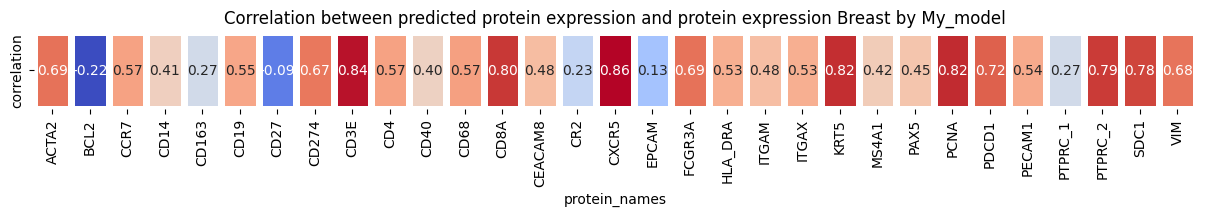

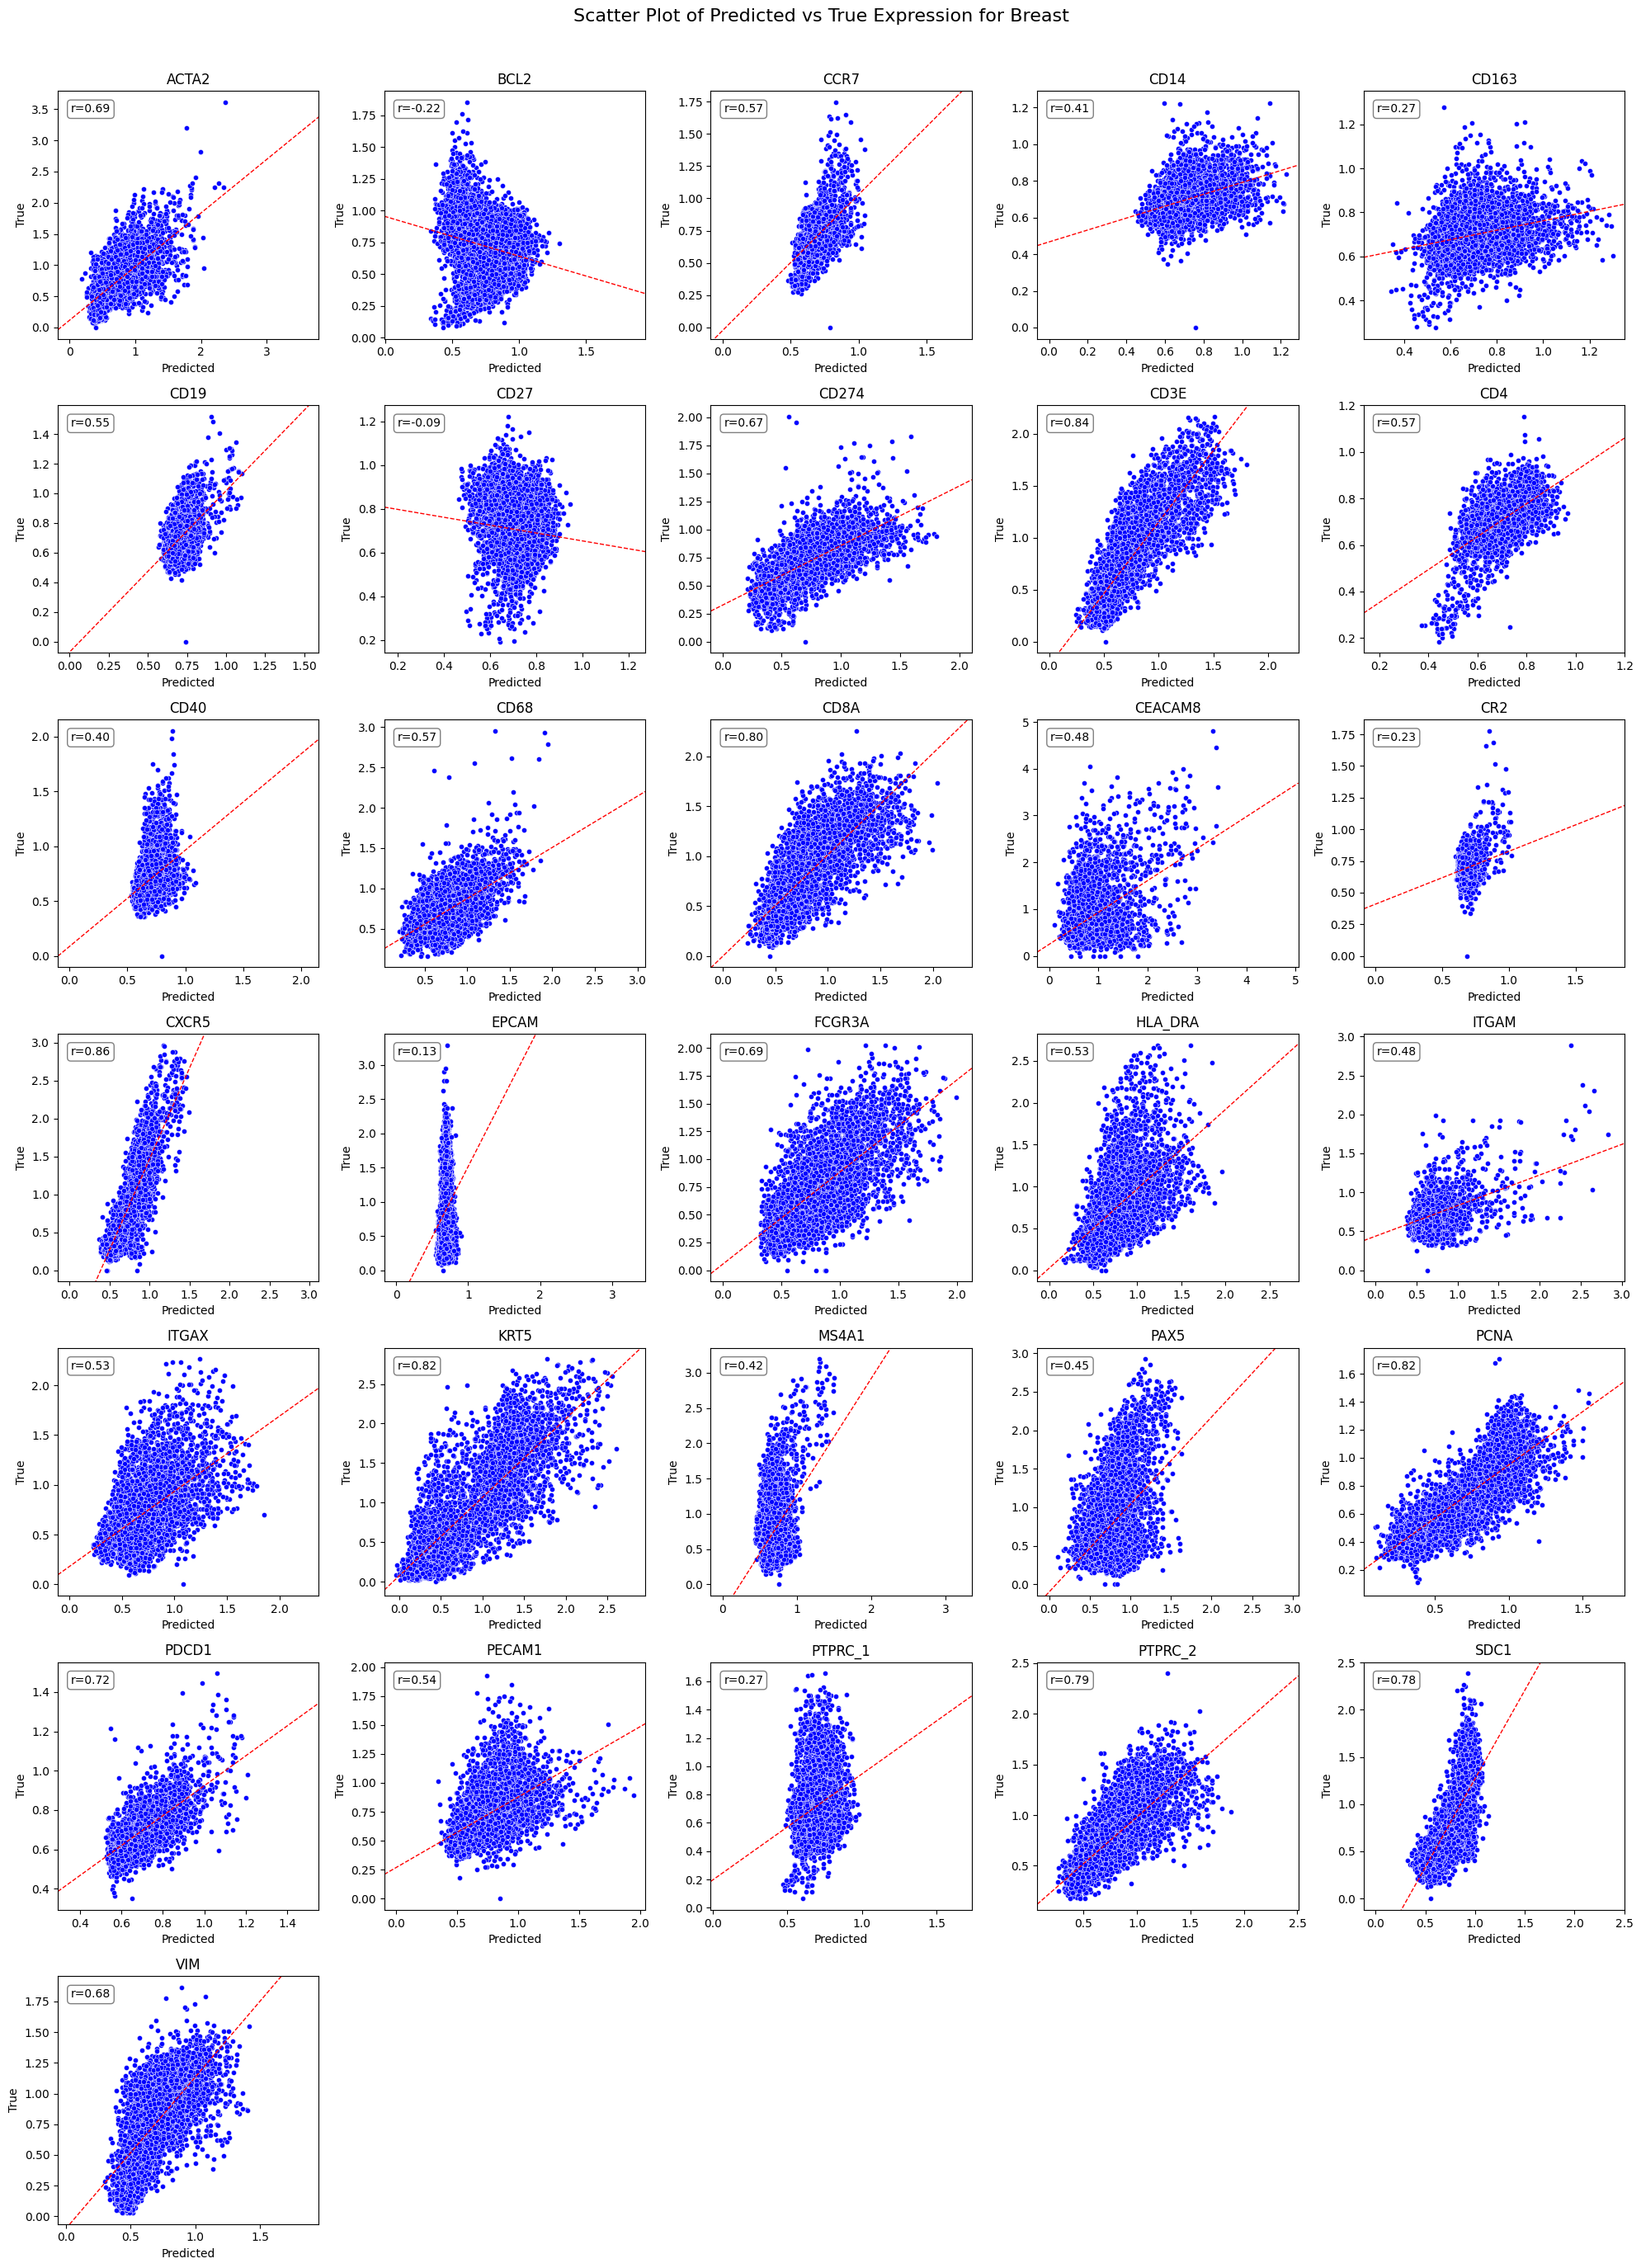

/ix/hosmanbeyoglu/haw309/DGAT_models/Breast_11535_gene_31_protein

=== Test sample 'Glioblastoma' ===

Common genes: 11535
Common proteins: 31
Creating or loading dataset
Loading preprocessed data for sample 'CytAssist_FFPE_Protein_Expression_Human_Tonsil' from '/ix/hosmanbeyoglu/haw309/pyg_data/CytAssist_FFPE_Protein_Expression_Human_Tonsil_11535_new_spatial=6_1hop_new_filtering.pth'
Loading preprocessed data for sample 'CytAssist_FFPE_Protein_Expression_Human_Tonsil_AddOns' from '/ix/hosmanbeyoglu/haw309/pyg_data/CytAssist_FFPE_Protein_Expression_Human_Tonsil_AddOns_11535_new_spatial=6_1hop_new_filtering.pth'
Loading preprocessed data for sample 'CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer' from '/ix/hosmanbeyoglu/haw309/pyg_data/CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_11535_new_spatial=6_1hop_new_filtering.pth'
Loading preprocessed data for sample 'PBC-PR_6835-5A' from '/ix/hosmanbeyoglu/haw309/pyg_data/PBC-PR_6835-5A_11535_new_spatial=6_1hop_new_filtering.pt

Epoch [1/100] Total Loss: 10.5120 | mRNA Recon: 1.1870 | Protein Recon: 0.3957 | Alignment: 0.5550 | Protein Pred: 0.3800 | mRNA Pred: 1.1916
Test Loss: 12.3322
Protein-wise Spearman: Mean = 0.1995, Std = 0.2574, Median = 0.2139
Cell-wise Spearman: Mean = 0.0632, Std = 0.1967, Median = 0.0577
Number of cells with low variation: 0
Epoch 1: EB evidence = -0.0347


Epoch [2/100] Total Loss: 8.3319 | mRNA Recon: 1.0477 | Protein Recon: 0.3721 | Alignment: 0.4273 | Protein Pred: 0.3638 | mRNA Pred: 1.0510
Test Loss: 11.2617
Protein-wise Spearman: Mean = 0.2298, Std = 0.2442, Median = 0.2555
Cell-wise Spearman: Mean = 0.0996, Std = 0.1376, Median = 0.1004
Number of cells with low variation: 0
Epoch 2: EB evidence = 1.5134


Epoch [3/100] Total Loss: 7.8065 | mRNA Recon: 1.0295 | Protein Recon: 0.3604 | Alignment: 0.3666 | Protein Pred: 0.3331 | mRNA Pred: 1.0296
Test Loss: 11.2540
Protein-wise Spearman: Mean = 0.1959, Std = 0.2336, Median = 0.1896
Cell-wise Spearman: Mean = 0.0748, Std = 0.1794, Median = 0.0690
Number of cells with low variation: 0
Epoch 3: EB evidence = -inf


Epoch [4/100] Total Loss: 7.6476 | mRNA Recon: 1.0148 | Protein Recon: 0.2855 | Alignment: 0.3220 | Protein Pred: 0.2570 | mRNA Pred: 1.0160
Test Loss: 11.1106
Protein-wise Spearman: Mean = 0.1728, Std = 0.2446, Median = 0.1346
Cell-wise Spearman: Mean = 0.1577, Std = 0.1660, Median = 0.1613
Number of cells with low variation: 0
Epoch 4: EB evidence = 0.8515


Epoch [5/100] Total Loss: 7.5163 | mRNA Recon: 1.0112 | Protein Recon: 0.3026 | Alignment: 0.2850 | Protein Pred: 0.2923 | mRNA Pred: 1.0125
Test Loss: 11.1009
Protein-wise Spearman: Mean = 0.1789, Std = 0.2669, Median = 0.1589
Cell-wise Spearman: Mean = 0.1637, Std = 0.1878, Median = 0.1641
Number of cells with low variation: 0
Epoch 5: EB evidence = 1.1343


Epoch [6/100] Total Loss: 7.4472 | mRNA Recon: 1.0070 | Protein Recon: 0.2975 | Alignment: 0.2629 | Protein Pred: 0.2840 | mRNA Pred: 1.0083
Test Loss: 11.0677
Protein-wise Spearman: Mean = 0.1893, Std = 0.2870, Median = 0.1744
Cell-wise Spearman: Mean = 0.1910, Std = 0.1962, Median = 0.1980
Number of cells with low variation: 0
Epoch 6: EB evidence = 1.0822


Epoch [7/100] Total Loss: 7.3758 | mRNA Recon: 1.0056 | Protein Recon: 0.3514 | Alignment: 0.2348 | Protein Pred: 0.3399 | mRNA Pred: 1.0060
Test Loss: 11.0508
Protein-wise Spearman: Mean = 0.2063, Std = 0.2503, Median = 0.1838
Cell-wise Spearman: Mean = 0.2131, Std = 0.2048, Median = 0.2149
Number of cells with low variation: 0
Epoch 7: EB evidence = 0.8528


Epoch [8/100] Total Loss: 7.3368 | mRNA Recon: 1.0052 | Protein Recon: 0.2180 | Alignment: 0.2198 | Protein Pred: 0.2130 | mRNA Pred: 1.0054
Test Loss: 11.0504
Protein-wise Spearman: Mean = 0.2346, Std = 0.2165, Median = 0.2047
Cell-wise Spearman: Mean = 0.2272, Std = 0.2259, Median = 0.2262
Number of cells with low variation: 0
Epoch 8: EB evidence = 0.0715


Epoch [9/100] Total Loss: 7.2561 | mRNA Recon: 1.0000 | Protein Recon: 0.2838 | Alignment: 0.2167 | Protein Pred: 0.2725 | mRNA Pred: 1.0015
Test Loss: 11.0190
Protein-wise Spearman: Mean = 0.2434, Std = 0.2255, Median = 0.2596
Cell-wise Spearman: Mean = 0.2211, Std = 0.2106, Median = 0.2242
Number of cells with low variation: 0
Epoch 9: EB evidence = 1.1756


Epoch [10/100] Total Loss: 7.1988 | mRNA Recon: 1.0031 | Protein Recon: 0.3023 | Alignment: 0.2006 | Protein Pred: 0.3125 | mRNA Pred: 1.0038
Test Loss: 11.0414
Protein-wise Spearman: Mean = 0.2387, Std = 0.2407, Median = 0.2200
Cell-wise Spearman: Mean = 0.2200, Std = 0.2435, Median = 0.2185
Number of cells with low variation: 0
Epoch 10: Learning rate reduced.
Epoch 10: EB evidence = 0.9481


Epoch [11/100] Total Loss: 7.1436 | mRNA Recon: 0.9959 | Protein Recon: 0.2120 | Alignment: 0.2030 | Protein Pred: 0.2385 | mRNA Pred: 0.9987
Test Loss: 11.0442
Protein-wise Spearman: Mean = 0.2207, Std = 0.2527, Median = 0.2340
Cell-wise Spearman: Mean = 0.2155, Std = 0.2173, Median = 0.2113
Number of cells with low variation: 0
Epoch 11: EB evidence = 0.9952


Epoch [12/100] Total Loss: 7.0998 | mRNA Recon: 0.9937 | Protein Recon: 0.2306 | Alignment: 0.1953 | Protein Pred: 0.2419 | mRNA Pred: 0.9963
Test Loss: 11.0124
Protein-wise Spearman: Mean = 0.2122, Std = 0.2518, Median = 0.1742
Cell-wise Spearman: Mean = 0.2174, Std = 0.2574, Median = 0.1992
Number of cells with low variation: 0
Epoch 12: EB evidence = 0.9019


Epoch [13/100] Total Loss: 7.0546 | mRNA Recon: 1.0029 | Protein Recon: 0.1856 | Alignment: 0.1676 | Protein Pred: 0.1910 | mRNA Pred: 1.0031
Test Loss: 11.0255
Protein-wise Spearman: Mean = 0.2129, Std = 0.2472, Median = 0.1686
Cell-wise Spearman: Mean = 0.1786, Std = 0.2399, Median = 0.1782
Number of cells with low variation: 0
Epoch 13: EB evidence = 0.7960


Epoch [14/100] Total Loss: 7.0088 | mRNA Recon: 0.9802 | Protein Recon: 0.1818 | Alignment: 0.1735 | Protein Pred: 0.2001 | mRNA Pred: 0.9832
Test Loss: 11.0089
Protein-wise Spearman: Mean = 0.2201, Std = 0.2598, Median = 0.2297
Cell-wise Spearman: Mean = 0.2395, Std = 0.2314, Median = 0.2310
Number of cells with low variation: 0
Epoch 14: EB evidence = 0.8870


Epoch [15/100] Total Loss: 6.9712 | mRNA Recon: 0.9855 | Protein Recon: 0.1847 | Alignment: 0.1673 | Protein Pred: 0.2057 | mRNA Pred: 0.9892
Test Loss: 11.0029
Protein-wise Spearman: Mean = 0.2049, Std = 0.2386, Median = 0.1827
Cell-wise Spearman: Mean = 0.2318, Std = 0.2394, Median = 0.2157
Number of cells with low variation: 0
Epoch 15: EB evidence = 0.6481


Epoch [16/100] Total Loss: 6.9493 | mRNA Recon: 1.0006 | Protein Recon: 0.2633 | Alignment: 0.1514 | Protein Pred: 0.2833 | mRNA Pred: 1.0023
Test Loss: 10.9931
Protein-wise Spearman: Mean = 0.1962, Std = 0.2458, Median = 0.1675
Cell-wise Spearman: Mean = 0.1546, Std = 0.2421, Median = 0.1605
Number of cells with low variation: 0
Epoch 16: EB evidence = 0.9157


Epoch [17/100] Total Loss: 6.9294 | mRNA Recon: 1.0001 | Protein Recon: 0.2520 | Alignment: 0.1470 | Protein Pred: 0.2813 | mRNA Pred: 1.0023
Test Loss: 11.0262
Protein-wise Spearman: Mean = 0.1942, Std = 0.2643, Median = 0.1856
Cell-wise Spearman: Mean = 0.2285, Std = 0.2242, Median = 0.2242
Number of cells with low variation: 0
Epoch 17: EB evidence = 0.9265


Epoch [18/100] Total Loss: 6.8960 | mRNA Recon: 0.9803 | Protein Recon: 0.1819 | Alignment: 0.1579 | Protein Pred: 0.2244 | mRNA Pred: 0.9832
Test Loss: 11.0160
Protein-wise Spearman: Mean = 0.1996, Std = 0.2355, Median = 0.1469
Cell-wise Spearman: Mean = 0.2179, Std = 0.2344, Median = 0.2113
Number of cells with low variation: 0
Epoch 18: EB evidence = 0.9200


Epoch [19/100] Total Loss: 6.8702 | mRNA Recon: 0.9992 | Protein Recon: 0.2508 | Alignment: 0.1355 | Protein Pred: 0.2797 | mRNA Pred: 1.0014
Test Loss: 10.9900
Protein-wise Spearman: Mean = 0.2125, Std = 0.2590, Median = 0.1968
Cell-wise Spearman: Mean = 0.2031, Std = 0.1947, Median = 0.2065
Number of cells with low variation: 0
Epoch 19: EB evidence = 0.9161


Epoch [20/100] Total Loss: 6.8602 | mRNA Recon: 0.9733 | Protein Recon: 0.1683 | Alignment: 0.1401 | Protein Pred: 0.1913 | mRNA Pred: 0.9781
Test Loss: 10.9935
Protein-wise Spearman: Mean = 0.2067, Std = 0.2531, Median = 0.1723
Cell-wise Spearman: Mean = 0.2304, Std = 0.2337, Median = 0.2246
Number of cells with low variation: 0
Epoch 20: Learning rate reduced.
Epoch 20: EB evidence = 0.9183


Epoch [21/100] Total Loss: 6.8052 | mRNA Recon: 1.0006 | Protein Recon: 0.1613 | Alignment: 0.1226 | Protein Pred: 0.1716 | mRNA Pred: 1.0017
Test Loss: 11.0028
Protein-wise Spearman: Mean = 0.2037, Std = 0.2579, Median = 0.2034
Cell-wise Spearman: Mean = 0.2191, Std = 0.2288, Median = 0.2194
Number of cells with low variation: 0
Epoch 21: EB evidence = 0.9359


Epoch [22/100] Total Loss: 6.7972 | mRNA Recon: 0.9982 | Protein Recon: 0.2358 | Alignment: 0.1245 | Protein Pred: 0.2657 | mRNA Pred: 1.0014
Test Loss: 10.9904
Protein-wise Spearman: Mean = 0.2149, Std = 0.2516, Median = 0.2111
Cell-wise Spearman: Mean = 0.2401, Std = 0.2475, Median = 0.2331
Number of cells with low variation: 0
Epoch 22: EB evidence = 0.9620


Epoch [23/100] Total Loss: 6.7785 | mRNA Recon: 0.9734 | Protein Recon: 0.1645 | Alignment: 0.1312 | Protein Pred: 0.1938 | mRNA Pred: 0.9755
Test Loss: 10.9621
Protein-wise Spearman: Mean = 0.2198, Std = 0.2323, Median = 0.1800
Cell-wise Spearman: Mean = 0.2424, Std = 0.2091, Median = 0.2464
Number of cells with low variation: 0
Epoch 23: EB evidence = 0.8604


Epoch [24/100] Total Loss: 6.7558 | mRNA Recon: 0.9597 | Protein Recon: 0.1518 | Alignment: 0.1255 | Protein Pred: 0.1749 | mRNA Pred: 0.9647
Test Loss: 10.9936
Protein-wise Spearman: Mean = 0.1987, Std = 0.2426, Median = 0.1877
Cell-wise Spearman: Mean = 0.2290, Std = 0.2383, Median = 0.2286
Number of cells with low variation: 0
Epoch 24: EB evidence = 0.9304


Epoch [25/100] Total Loss: 6.7654 | mRNA Recon: 0.9625 | Protein Recon: 0.1519 | Alignment: 0.1182 | Protein Pred: 0.1750 | mRNA Pred: 0.9652
Test Loss: 10.9702
Protein-wise Spearman: Mean = 0.2147, Std = 0.2612, Median = 0.2085
Cell-wise Spearman: Mean = 0.2526, Std = 0.2122, Median = 0.2540
Number of cells with low variation: 0
Epoch 25: EB evidence = 0.8142


Epoch [26/100] Total Loss: 6.7378 | mRNA Recon: 0.9591 | Protein Recon: 0.1516 | Alignment: 0.1205 | Protein Pred: 0.1763 | mRNA Pred: 0.9653
Test Loss: 10.9776
Protein-wise Spearman: Mean = 0.2424, Std = 0.2373, Median = 0.2113
Cell-wise Spearman: Mean = 0.2664, Std = 0.2273, Median = 0.2637
Number of cells with low variation: 0
Epoch 26: EB evidence = 0.8677


Epoch [27/100] Total Loss: 6.7303 | mRNA Recon: 0.9595 | Protein Recon: 0.1477 | Alignment: 0.1177 | Protein Pred: 0.1829 | mRNA Pred: 0.9630
Test Loss: 10.9446
Protein-wise Spearman: Mean = 0.2354, Std = 0.2351, Median = 0.2207
Cell-wise Spearman: Mean = 0.2470, Std = 0.2096, Median = 0.2532
Number of cells with low variation: 0
Epoch 27: EB evidence = 0.9175


Epoch [28/100] Total Loss: 6.7369 | mRNA Recon: 0.9595 | Protein Recon: 0.1420 | Alignment: 0.1181 | Protein Pred: 0.1800 | mRNA Pred: 0.9639
Test Loss: 10.9722
Protein-wise Spearman: Mean = 0.1960, Std = 0.2458, Median = 0.1716
Cell-wise Spearman: Mean = 0.2266, Std = 0.2247, Median = 0.2234
Number of cells with low variation: 0
Epoch 28: EB evidence = 1.1255


Epoch [29/100] Total Loss: 6.7072 | mRNA Recon: 0.9962 | Protein Recon: 0.2139 | Alignment: 0.1075 | Protein Pred: 0.2439 | mRNA Pred: 0.9989
Test Loss: 10.9898
Protein-wise Spearman: Mean = 0.2293, Std = 0.2307, Median = 0.1985
Cell-wise Spearman: Mean = 0.2395, Std = 0.2343, Median = 0.2351
Number of cells with low variation: 0
Epoch 29: EB evidence = 0.9617


Epoch [30/100] Total Loss: 6.6913 | mRNA Recon: 0.9962 | Protein Recon: 0.2141 | Alignment: 0.1073 | Protein Pred: 0.2476 | mRNA Pred: 1.0000
Test Loss: 10.9671
Protein-wise Spearman: Mean = 0.2268, Std = 0.2401, Median = 0.2077
Cell-wise Spearman: Mean = 0.2852, Std = 0.2128, Median = 0.2964
Number of cells with low variation: 0
Epoch 30: Learning rate reduced.
Epoch 30: EB evidence = 0.8995


Epoch [31/100] Total Loss: 6.6684 | mRNA Recon: 0.9992 | Protein Recon: 0.1371 | Alignment: 0.0982 | Protein Pred: 0.1532 | mRNA Pred: 1.0009
Test Loss: 10.9517
Protein-wise Spearman: Mean = 0.2213, Std = 0.2317, Median = 0.1921
Cell-wise Spearman: Mean = 0.2299, Std = 0.2237, Median = 0.2262
Number of cells with low variation: 0
Epoch 31: EB evidence = 0.9400


Epoch [32/100] Total Loss: 6.6564 | mRNA Recon: 0.9645 | Protein Recon: 0.1368 | Alignment: 0.1095 | Protein Pred: 0.1652 | mRNA Pred: 0.9704
Test Loss: 10.9646
Protein-wise Spearman: Mean = 0.2129, Std = 0.2500, Median = 0.1959
Cell-wise Spearman: Mean = 0.2540, Std = 0.2171, Median = 0.2593
Number of cells with low variation: 0
Epoch 32: EB evidence = 0.9210


Epoch [33/100] Total Loss: 6.6410 | mRNA Recon: 0.9565 | Protein Recon: 0.1392 | Alignment: 0.1085 | Protein Pred: 0.1659 | mRNA Pred: 0.9617
Test Loss: 10.9429
Protein-wise Spearman: Mean = 0.2366, Std = 0.2379, Median = 0.2245
Cell-wise Spearman: Mean = 0.2868, Std = 0.2126, Median = 0.2935
Number of cells with low variation: 0
Epoch 33: EB evidence = 0.8576


Epoch [34/100] Total Loss: 6.6343 | mRNA Recon: 0.9994 | Protein Recon: 0.1398 | Alignment: 0.0936 | Protein Pred: 0.1505 | mRNA Pred: 1.0016
Test Loss: 10.9542
Protein-wise Spearman: Mean = 0.2260, Std = 0.2251, Median = 0.1931
Cell-wise Spearman: Mean = 0.2335, Std = 0.2141, Median = 0.2327
Number of cells with low variation: 0
Epoch 34: EB evidence = 0.8602


Epoch [35/100] Total Loss: 6.6445 | mRNA Recon: 0.9947 | Protein Recon: 0.2070 | Alignment: 0.0974 | Protein Pred: 0.2370 | mRNA Pred: 0.9993
Test Loss: 10.9482
Protein-wise Spearman: Mean = 0.2268, Std = 0.2437, Median = 0.2257
Cell-wise Spearman: Mean = 0.2724, Std = 0.2067, Median = 0.2794
Number of cells with low variation: 0
Epoch 35: EB evidence = 0.9310


Epoch [36/100] Total Loss: 6.6272 | mRNA Recon: 0.9943 | Protein Recon: 0.1970 | Alignment: 0.0965 | Protein Pred: 0.2313 | mRNA Pred: 0.9987
Test Loss: 10.9477
Protein-wise Spearman: Mean = 0.2314, Std = 0.2449, Median = 0.2313
Cell-wise Spearman: Mean = 0.2525, Std = 0.2195, Median = 0.2560
Number of cells with low variation: 0
Epoch 36: EB evidence = 0.9605


Epoch [37/100] Total Loss: 6.5967 | mRNA Recon: 0.9613 | Protein Recon: 0.1291 | Alignment: 0.1012 | Protein Pred: 0.1554 | mRNA Pred: 0.9676
Test Loss: 10.9506
Protein-wise Spearman: Mean = 0.2297, Std = 0.2263, Median = 0.1994
Cell-wise Spearman: Mean = 0.2708, Std = 0.2060, Median = 0.2778
Number of cells with low variation: 0
Epoch 37: EB evidence = 0.9542


Epoch [38/100] Total Loss: 6.5900 | mRNA Recon: 0.9532 | Protein Recon: 0.1295 | Alignment: 0.0976 | Protein Pred: 0.1537 | mRNA Pred: 0.9591
Test Loss: 10.9488
Protein-wise Spearman: Mean = 0.2286, Std = 0.2404, Median = 0.2182
Cell-wise Spearman: Mean = 0.2504, Std = 0.2168, Median = 0.2560
Number of cells with low variation: 0
Epoch 38: EB evidence = 0.9498


Epoch [39/100] Total Loss: 6.5876 | mRNA Recon: 0.9608 | Protein Recon: 0.1259 | Alignment: 0.0978 | Protein Pred: 0.1523 | mRNA Pred: 0.9665
Test Loss: 10.9482
Protein-wise Spearman: Mean = 0.2361, Std = 0.2377, Median = 0.2385
Cell-wise Spearman: Mean = 0.2542, Std = 0.2056, Median = 0.2544
Number of cells with low variation: 0
Epoch 39: EB evidence = 0.9541


Epoch [40/100] Total Loss: 6.5759 | mRNA Recon: 0.9983 | Protein Recon: 0.1235 | Alignment: 0.0842 | Protein Pred: 0.1394 | mRNA Pred: 1.0007
Test Loss: 10.9626
Protein-wise Spearman: Mean = 0.2198, Std = 0.2428, Median = 0.2212
Cell-wise Spearman: Mean = 0.2447, Std = 0.2153, Median = 0.2528
Number of cells with low variation: 0
Epoch 40: Learning rate reduced.
Epoch 40: EB evidence = 0.9627


Epoch [41/100] Total Loss: 6.5806 | mRNA Recon: 0.9597 | Protein Recon: 0.1221 | Alignment: 0.0957 | Protein Pred: 0.1503 | mRNA Pred: 0.9660
Test Loss: 10.9573
Protein-wise Spearman: Mean = 0.2076, Std = 0.2576, Median = 0.2129
Cell-wise Spearman: Mean = 0.2384, Std = 0.2053, Median = 0.2383
Number of cells with low variation: 0
Epoch 41: EB evidence = 0.9486


Epoch [42/100] Total Loss: 6.5588 | mRNA Recon: 0.9981 | Protein Recon: 0.1208 | Alignment: 0.0826 | Protein Pred: 0.1380 | mRNA Pred: 1.0009
Test Loss: 10.9363
Protein-wise Spearman: Mean = 0.2427, Std = 0.2375, Median = 0.2450
Cell-wise Spearman: Mean = 0.2742, Std = 0.2164, Median = 0.2827
Number of cells with low variation: 0
Epoch 42: EB evidence = 0.9588


Epoch [43/100] Total Loss: 6.5446 | mRNA Recon: 0.9592 | Protein Recon: 0.1220 | Alignment: 0.0941 | Protein Pred: 0.1446 | mRNA Pred: 0.9657
Test Loss: 10.9380
Protein-wise Spearman: Mean = 0.2351, Std = 0.2441, Median = 0.2314
Cell-wise Spearman: Mean = 0.2696, Std = 0.2092, Median = 0.2782
Number of cells with low variation: 0
Epoch 43: EB evidence = 0.9626


Epoch [44/100] Total Loss: 6.5372 | mRNA Recon: 0.9932 | Protein Recon: 0.1824 | Alignment: 0.0857 | Protein Pred: 0.2175 | mRNA Pred: 0.9981
Test Loss: 10.9492
Protein-wise Spearman: Mean = 0.2215, Std = 0.2495, Median = 0.2500
Cell-wise Spearman: Mean = 0.2403, Std = 0.2193, Median = 0.2456
Number of cells with low variation: 0
Epoch 44: EB evidence = 0.9633


Epoch [45/100] Total Loss: 6.5304 | mRNA Recon: 0.9602 | Protein Recon: 0.1270 | Alignment: 0.0940 | Protein Pred: 0.1445 | mRNA Pred: 0.9632
Test Loss: 10.9372
Protein-wise Spearman: Mean = 0.2266, Std = 0.2380, Median = 0.2405
Cell-wise Spearman: Mean = 0.2571, Std = 0.2057, Median = 0.2653
Number of cells with low variation: 0
Epoch 45: EB evidence = 0.9393


Epoch [46/100] Total Loss: 6.5234 | mRNA Recon: 0.9980 | Protein Recon: 0.1161 | Alignment: 0.0787 | Protein Pred: 0.1362 | mRNA Pred: 1.0008
Test Loss: 10.9458
Protein-wise Spearman: Mean = 0.2328, Std = 0.2466, Median = 0.2300
Cell-wise Spearman: Mean = 0.2465, Std = 0.2207, Median = 0.2488
Number of cells with low variation: 0
Epoch 46: EB evidence = 0.9453


Epoch [47/100] Total Loss: 6.5208 | mRNA Recon: 0.9586 | Protein Recon: 0.1184 | Alignment: 0.0893 | Protein Pred: 0.1388 | mRNA Pred: 0.9646
Test Loss: 10.9510
Protein-wise Spearman: Mean = 0.2141, Std = 0.2630, Median = 0.2474
Cell-wise Spearman: Mean = 0.2462, Std = 0.2081, Median = 0.2520
Number of cells with low variation: 0
Epoch 47: EB evidence = 0.9479


Epoch [48/100] Total Loss: 6.5101 | mRNA Recon: 0.9504 | Protein Recon: 0.1185 | Alignment: 0.0865 | Protein Pred: 0.1445 | mRNA Pred: 0.9574
Test Loss: 10.9267
Protein-wise Spearman: Mean = 0.2375, Std = 0.2342, Median = 0.2458
Cell-wise Spearman: Mean = 0.2612, Std = 0.2075, Median = 0.2710
Number of cells with low variation: 0
Epoch 48: EB evidence = 0.9566


Epoch [49/100] Total Loss: 6.4997 | mRNA Recon: 0.9929 | Protein Recon: 0.1715 | Alignment: 0.0813 | Protein Pred: 0.2105 | mRNA Pred: 0.9978
Test Loss: 10.9411
Protein-wise Spearman: Mean = 0.2363, Std = 0.2491, Median = 0.2640
Cell-wise Spearman: Mean = 0.2581, Std = 0.2079, Median = 0.2605
Number of cells with low variation: 0
Epoch 49: EB evidence = 0.9573


Epoch [50/100] Total Loss: 6.4945 | mRNA Recon: 0.9977 | Protein Recon: 0.1105 | Alignment: 0.0751 | Protein Pred: 0.1285 | mRNA Pred: 1.0002
Test Loss: 10.9422
Protein-wise Spearman: Mean = 0.2253, Std = 0.2467, Median = 0.2524
Cell-wise Spearman: Mean = 0.2562, Std = 0.2082, Median = 0.2657
Number of cells with low variation: 0
Epoch 50: Learning rate reduced.
Epoch 50: EB evidence = 0.9594


Epoch [51/100] Total Loss: 6.4858 | mRNA Recon: 0.9590 | Protein Recon: 0.1193 | Alignment: 0.0874 | Protein Pred: 0.1395 | mRNA Pred: 0.9621
Test Loss: 10.9307
Protein-wise Spearman: Mean = 0.2177, Std = 0.2521, Median = 0.2326
Cell-wise Spearman: Mean = 0.2430, Std = 0.2075, Median = 0.2484
Number of cells with low variation: 0
Epoch 51: EB evidence = 0.9420


Epoch [52/100] Total Loss: 6.4794 | mRNA Recon: 0.9925 | Protein Recon: 0.1674 | Alignment: 0.0786 | Protein Pred: 0.2040 | mRNA Pred: 0.9972
Test Loss: 10.9395
Protein-wise Spearman: Mean = 0.2224, Std = 0.2523, Median = 0.2534
Cell-wise Spearman: Mean = 0.2244, Std = 0.2161, Median = 0.2286
Number of cells with low variation: 0
Epoch 52: EB evidence = 0.9471


Epoch [53/100] Total Loss: 6.4726 | mRNA Recon: 0.9924 | Protein Recon: 0.1656 | Alignment: 0.0782 | Protein Pred: 0.2013 | mRNA Pred: 0.9974
Test Loss: 10.9297
Protein-wise Spearman: Mean = 0.2380, Std = 0.2344, Median = 0.2510
Cell-wise Spearman: Mean = 0.2736, Std = 0.2062, Median = 0.2863
Number of cells with low variation: 0
Epoch 53: EB evidence = 0.9717


Epoch [54/100] Total Loss: 6.4695 | mRNA Recon: 0.9567 | Protein Recon: 0.1092 | Alignment: 0.0832 | Protein Pred: 0.1293 | mRNA Pred: 0.9634
Test Loss: 10.9488
Protein-wise Spearman: Mean = 0.2098, Std = 0.2681, Median = 0.2557
Cell-wise Spearman: Mean = 0.2133, Std = 0.2138, Median = 0.2181
Number of cells with low variation: 0
Epoch 54: EB evidence = 0.9680


Epoch [55/100] Total Loss: 6.4648 | mRNA Recon: 0.9487 | Protein Recon: 0.1114 | Alignment: 0.0814 | Protein Pred: 0.1382 | mRNA Pred: 0.9561
Test Loss: 10.9203
Protein-wise Spearman: Mean = 0.2217, Std = 0.2337, Median = 0.2453
Cell-wise Spearman: Mean = 0.2469, Std = 0.2136, Median = 0.2569
Number of cells with low variation: 0
Epoch 55: EB evidence = 0.9639


Epoch [56/100] Total Loss: 6.4607 | mRNA Recon: 0.9973 | Protein Recon: 0.1061 | Alignment: 0.0716 | Protein Pred: 0.1234 | mRNA Pred: 1.0001
Test Loss: 10.9531
Protein-wise Spearman: Mean = 0.2155, Std = 0.2526, Median = 0.2338
Cell-wise Spearman: Mean = 0.2245, Std = 0.2085, Median = 0.2310
Number of cells with low variation: 0
Epoch 56: EB evidence = 0.9632


Epoch [57/100] Total Loss: 6.4544 | mRNA Recon: 0.9921 | Protein Recon: 0.1609 | Alignment: 0.0762 | Protein Pred: 0.1940 | mRNA Pred: 0.9971
Test Loss: 10.9162
Protein-wise Spearman: Mean = 0.2299, Std = 0.2410, Median = 0.2407
Cell-wise Spearman: Mean = 0.2559, Std = 0.2085, Median = 0.2665
Number of cells with low variation: 0
Epoch 57: EB evidence = 0.9828
--> EB early stopping at epoch 57 (mean_evidence=0.9612, threshold=0.96)
Test Loss: 10.9162
Protein-wise Spearman: Mean = 0.2299, Std = 0.2410, Median = 0.2407
Cell-wise Spearman: Mean = 0.2559, Std = 0.2085, Median = 0.2665
Number of cells with low variation: 0
Average Cell Pearson Cor in test data:  0.2319931656764117
Average Cell Spearman Cor in test data:  0.2559293741115985
Average Protein Cor in test data: 0.2157

Average RMSE in test data: 0.3016



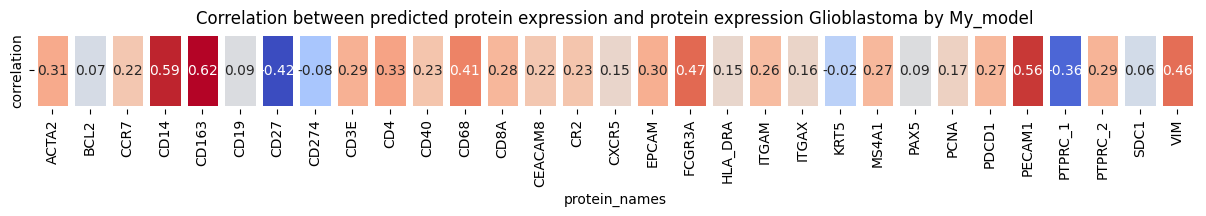

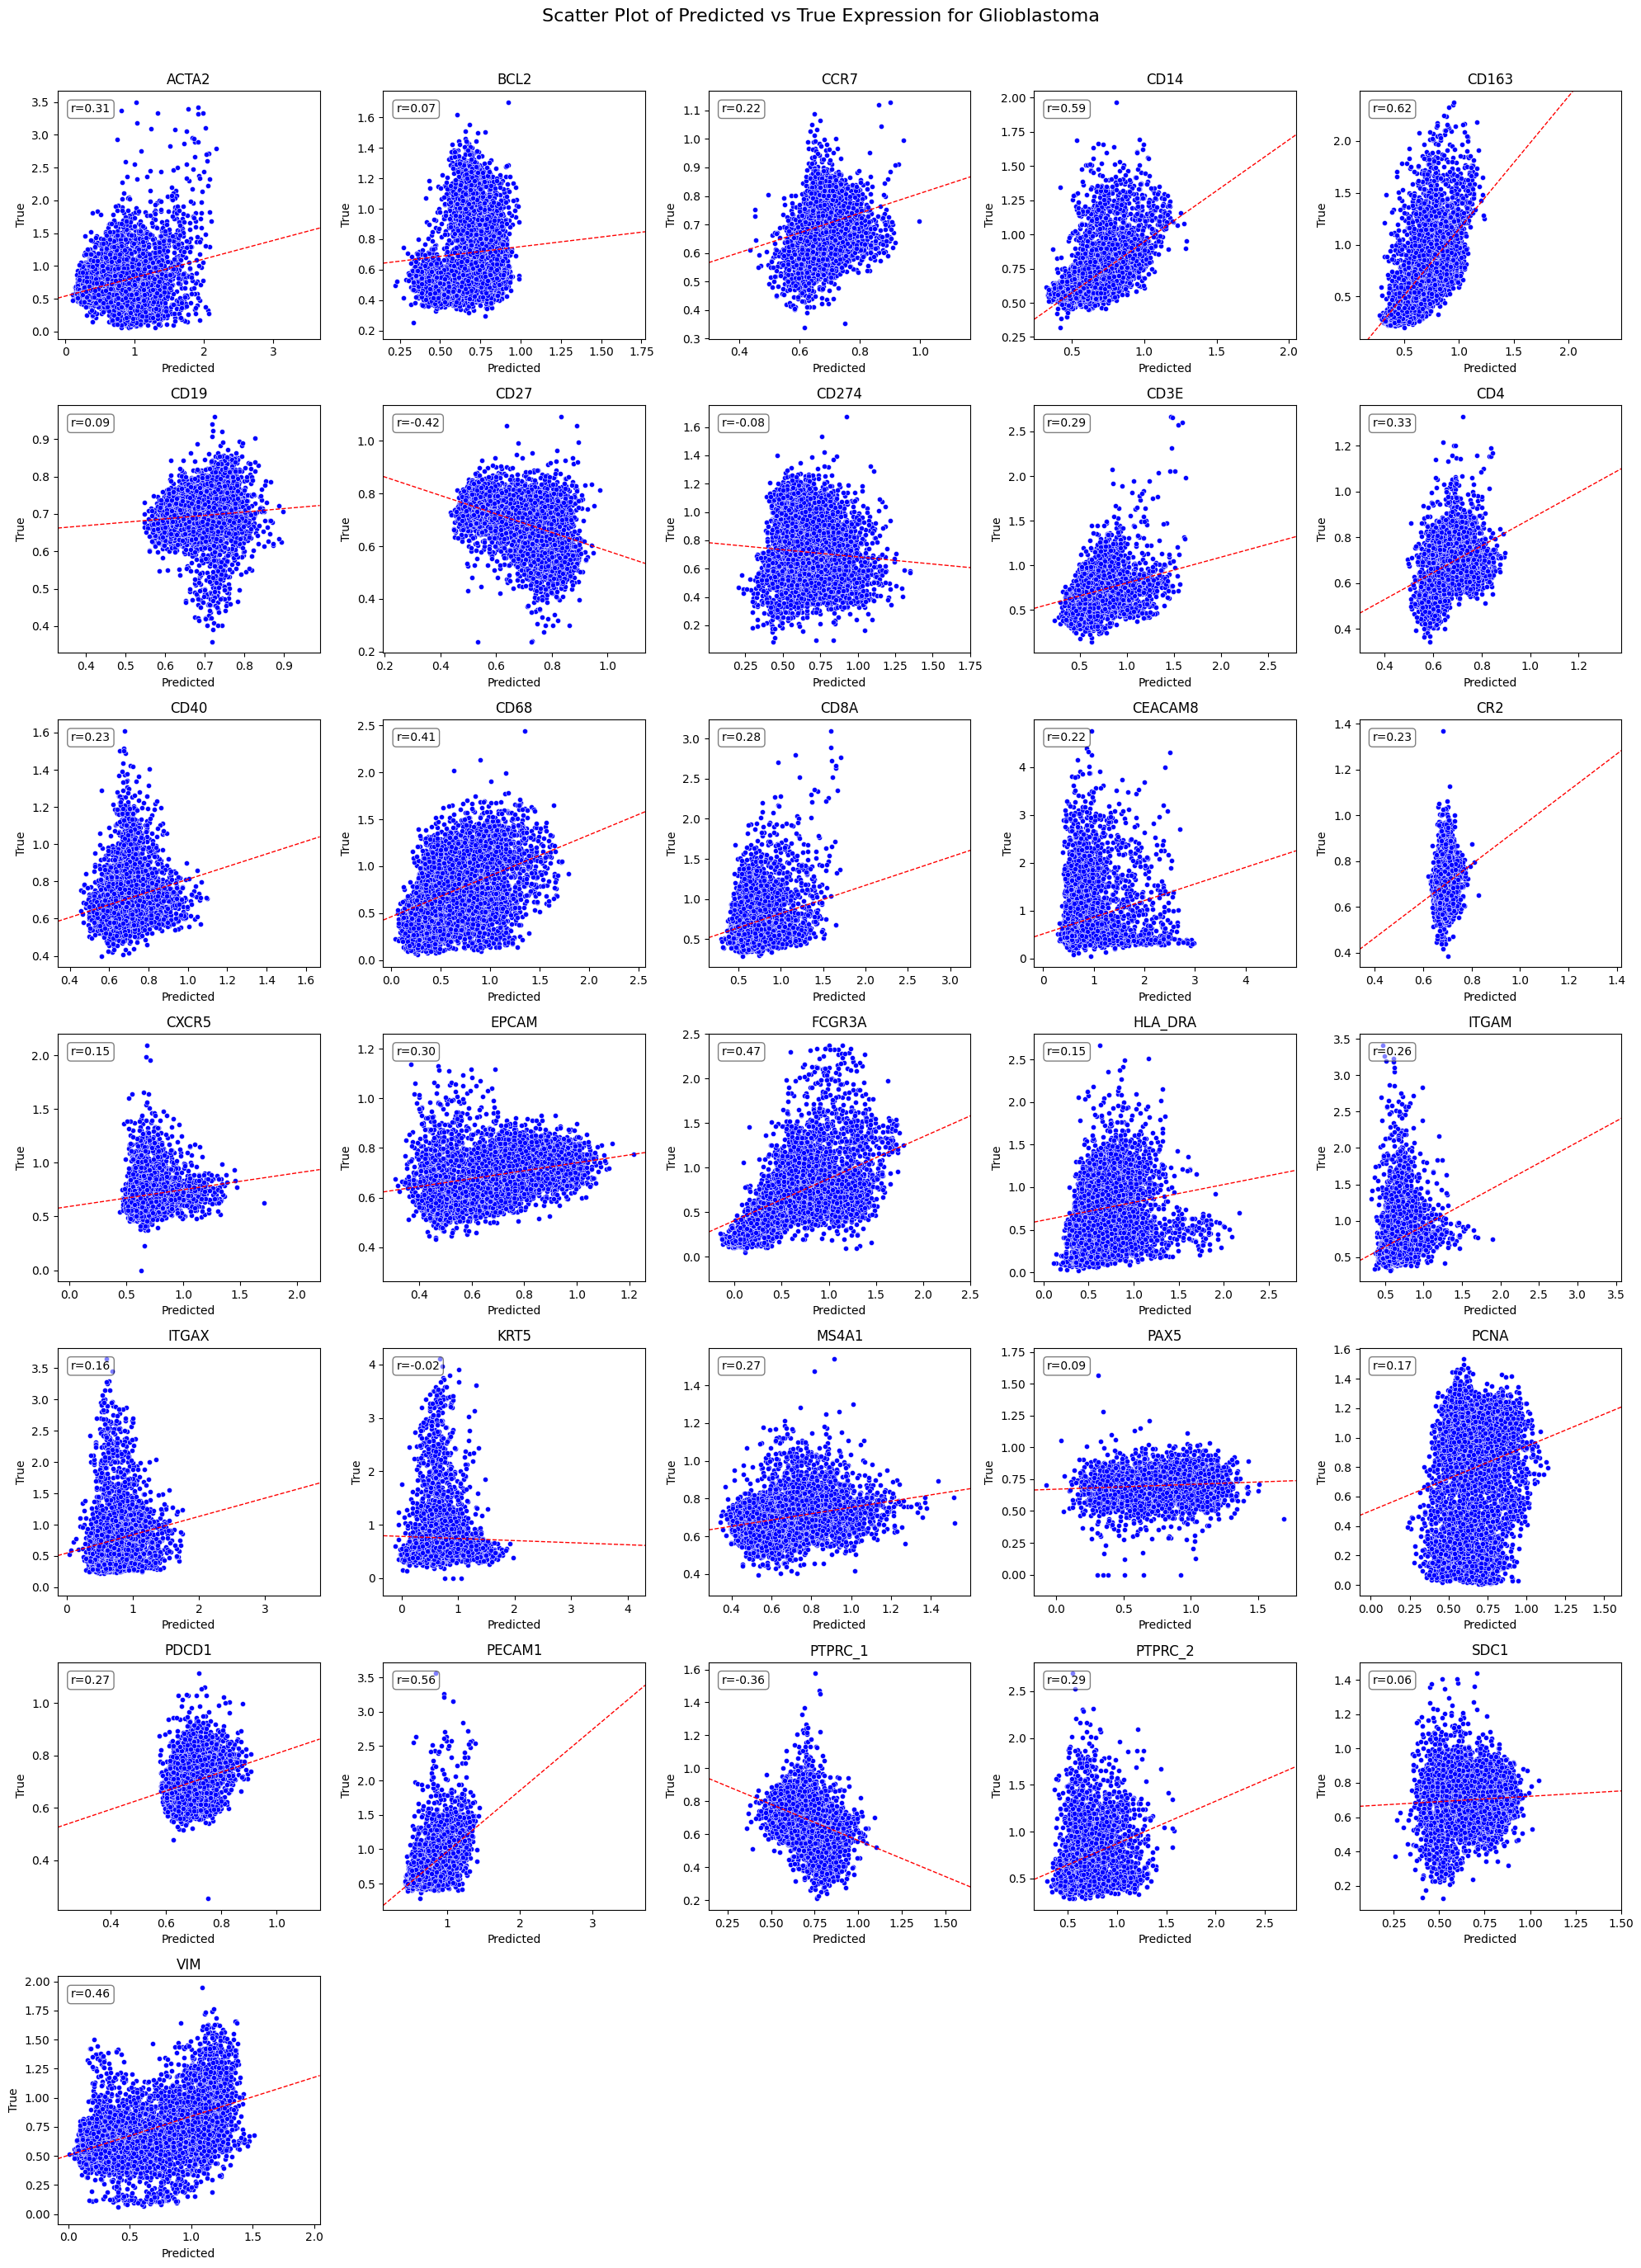

/ix/hosmanbeyoglu/haw309/DGAT_models/Glioblastoma_11535_gene_31_protein

=== Test sample 'PBC-PR_6835-5A' ===

Common genes: 11535
Common proteins: 31
Creating or loading dataset
Loading preprocessed data for sample 'CytAssist_FFPE_Protein_Expression_Human_Tonsil' from '/ix/hosmanbeyoglu/haw309/pyg_data/CytAssist_FFPE_Protein_Expression_Human_Tonsil_11535_new_spatial=6_1hop_new_filtering.pth'
Loading preprocessed data for sample 'CytAssist_FFPE_Protein_Expression_Human_Tonsil_AddOns' from '/ix/hosmanbeyoglu/haw309/pyg_data/CytAssist_FFPE_Protein_Expression_Human_Tonsil_AddOns_11535_new_spatial=6_1hop_new_filtering.pth'
Loading preprocessed data for sample 'CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer' from '/ix/hosmanbeyoglu/haw309/pyg_data/CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_11535_new_spatial=6_1hop_new_filtering.pth'
Loading preprocessed data for sample 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma' from '/ix/hosmanbeyoglu/haw309/pyg_data/CytAssist_

Epoch [1/100] Total Loss: 10.5981 | mRNA Recon: 1.1917 | Protein Recon: 0.3928 | Alignment: 0.5462 | Protein Pred: 0.3821 | mRNA Pred: 1.1960
Test Loss: 12.6988
Protein-wise Spearman: Mean = 0.1343, Std = 0.1956, Median = 0.1001
Cell-wise Spearman: Mean = 0.1410, Std = 0.1761, Median = 0.1444
Number of cells with low variation: 1
Epoch 1: EB evidence = -0.2255


Epoch [2/100] Total Loss: 8.2936 | mRNA Recon: 1.0507 | Protein Recon: 0.2446 | Alignment: 0.4282 | Protein Pred: 0.2396 | mRNA Pred: 1.0534
Test Loss: 11.6190
Protein-wise Spearman: Mean = 0.1338, Std = 0.1977, Median = 0.0835
Cell-wise Spearman: Mean = 0.1192, Std = 0.1850, Median = 0.1310
Number of cells with low variation: 1
Epoch 2: EB evidence = -inf


Epoch [3/100] Total Loss: 7.7424 | mRNA Recon: 1.0304 | Protein Recon: 0.3381 | Alignment: 0.3695 | Protein Pred: 0.3150 | mRNA Pred: 1.0309
Test Loss: 11.6472
Protein-wise Spearman: Mean = 0.1711, Std = 0.1950, Median = 0.1848
Cell-wise Spearman: Mean = 0.1182, Std = 0.1999, Median = 0.1216
Number of cells with low variation: 1
Epoch 3: EB evidence = 0.8856


Epoch [4/100] Total Loss: 7.6011 | mRNA Recon: 1.0150 | Protein Recon: 0.3587 | Alignment: 0.3230 | Protein Pred: 0.3237 | mRNA Pred: 1.0160
Test Loss: 11.4894
Protein-wise Spearman: Mean = 0.1830, Std = 0.1977, Median = 0.1873
Cell-wise Spearman: Mean = 0.2011, Std = 0.1892, Median = 0.2054
Number of cells with low variation: 1
Epoch 4: EB evidence = 0.9269


Epoch [5/100] Total Loss: 7.4639 | mRNA Recon: 1.0111 | Protein Recon: 0.3194 | Alignment: 0.2878 | Protein Pred: 0.2911 | mRNA Pred: 1.0123
Test Loss: 11.4744
Protein-wise Spearman: Mean = 0.1906, Std = 0.2018, Median = 0.1934
Cell-wise Spearman: Mean = 0.1868, Std = 0.1993, Median = 0.1923
Number of cells with low variation: 1
Epoch 5: EB evidence = 1.2406


Epoch [6/100] Total Loss: 7.3848 | mRNA Recon: 1.0031 | Protein Recon: 0.2672 | Alignment: 0.2555 | Protein Pred: 0.2578 | mRNA Pred: 1.0043
Test Loss: 11.4580
Protein-wise Spearman: Mean = 0.2004, Std = 0.2068, Median = 0.2052
Cell-wise Spearman: Mean = 0.1786, Std = 0.2158, Median = 0.1857
Number of cells with low variation: 1
Epoch 6: EB evidence = 0.8166


Epoch [7/100] Total Loss: 7.3147 | mRNA Recon: 1.0029 | Protein Recon: 0.2509 | Alignment: 0.2476 | Protein Pred: 0.2381 | mRNA Pred: 1.0045
Test Loss: 11.4392
Protein-wise Spearman: Mean = 0.1940, Std = 0.2040, Median = 0.2176
Cell-wise Spearman: Mean = 0.1773, Std = 0.2086, Median = 0.1871
Number of cells with low variation: 1
Epoch 7: EB evidence = -1.6645


Epoch [8/100] Total Loss: 7.2693 | mRNA Recon: 1.0019 | Protein Recon: 0.2956 | Alignment: 0.2311 | Protein Pred: 0.2894 | mRNA Pred: 1.0033
Test Loss: 11.4105
Protein-wise Spearman: Mean = 0.2092, Std = 0.1988, Median = 0.2110
Cell-wise Spearman: Mean = 0.1668, Std = 0.2116, Median = 0.1673
Number of cells with low variation: 1
Epoch 8: EB evidence = 0.1101


Epoch [9/100] Total Loss: 7.2136 | mRNA Recon: 1.0001 | Protein Recon: 0.2840 | Alignment: 0.2180 | Protein Pred: 0.2812 | mRNA Pred: 1.0017
Test Loss: 11.4182
Protein-wise Spearman: Mean = 0.2307, Std = 0.1960, Median = 0.2571
Cell-wise Spearman: Mean = 0.2222, Std = 0.2063, Median = 0.2256
Number of cells with low variation: 1
Epoch 9: EB evidence = 0.8748


Epoch [10/100] Total Loss: 7.1594 | mRNA Recon: 0.9931 | Protein Recon: 0.2149 | Alignment: 0.2112 | Protein Pred: 0.2202 | mRNA Pred: 0.9966
Test Loss: 11.3660
Protein-wise Spearman: Mean = 0.2288, Std = 0.2046, Median = 0.2589
Cell-wise Spearman: Mean = 0.2088, Std = 0.2166, Median = 0.2192
Number of cells with low variation: 1
Epoch 10: Learning rate reduced.
Epoch 10: EB evidence = 1.0772


Epoch [11/100] Total Loss: 7.1114 | mRNA Recon: 0.9955 | Protein Recon: 0.2244 | Alignment: 0.2002 | Protein Pred: 0.2554 | mRNA Pred: 0.9977
Test Loss: 11.4020
Protein-wise Spearman: Mean = 0.2383, Std = 0.2058, Median = 0.2902
Cell-wise Spearman: Mean = 0.2069, Std = 0.2161, Median = 0.2157
Number of cells with low variation: 1
Epoch 11: EB evidence = 0.6649


Epoch [12/100] Total Loss: 7.0612 | mRNA Recon: 0.9923 | Protein Recon: 0.2145 | Alignment: 0.1931 | Protein Pred: 0.2429 | mRNA Pred: 0.9955
Test Loss: 11.3401
Protein-wise Spearman: Mean = 0.2402, Std = 0.2112, Median = 0.2803
Cell-wise Spearman: Mean = 0.2476, Std = 0.2131, Median = 0.2617
Number of cells with low variation: 1
Epoch 12: EB evidence = 0.8728


Epoch [13/100] Total Loss: 7.0062 | mRNA Recon: 0.9807 | Protein Recon: 0.1947 | Alignment: 0.1860 | Protein Pred: 0.2089 | mRNA Pred: 0.9855
Test Loss: 11.3635
Protein-wise Spearman: Mean = 0.2500, Std = 0.2113, Median = 0.2809
Cell-wise Spearman: Mean = 0.2337, Std = 0.2174, Median = 0.2411
Number of cells with low variation: 1
Epoch 13: EB evidence = 0.9012


Epoch [14/100] Total Loss: 6.9692 | mRNA Recon: 0.9893 | Protein Recon: 0.2241 | Alignment: 0.1790 | Protein Pred: 0.2468 | mRNA Pred: 0.9918
Test Loss: 11.3228
Protein-wise Spearman: Mean = 0.2545, Std = 0.2157, Median = 0.2883
Cell-wise Spearman: Mean = 0.2498, Std = 0.2238, Median = 0.2673
Number of cells with low variation: 1
Epoch 14: EB evidence = 0.8594


Epoch [15/100] Total Loss: 6.9187 | mRNA Recon: 0.9747 | Protein Recon: 0.1828 | Alignment: 0.1614 | Protein Pred: 0.2014 | mRNA Pred: 0.9780
Test Loss: 11.3083
Protein-wise Spearman: Mean = 0.2682, Std = 0.2145, Median = 0.2792
Cell-wise Spearman: Mean = 0.2886, Std = 0.2124, Median = 0.3032
Number of cells with low variation: 1
Epoch 15: EB evidence = 0.8359


Epoch [16/100] Total Loss: 6.8817 | mRNA Recon: 0.9897 | Protein Recon: 0.1815 | Alignment: 0.1547 | Protein Pred: 0.2134 | mRNA Pred: 0.9941
Test Loss: 11.3264
Protein-wise Spearman: Mean = 0.2691, Std = 0.2161, Median = 0.2585
Cell-wise Spearman: Mean = 0.2544, Std = 0.2148, Median = 0.2653
Number of cells with low variation: 1
Epoch 16: EB evidence = 0.8748


Epoch [17/100] Total Loss: 6.8545 | mRNA Recon: 0.9703 | Protein Recon: 0.1753 | Alignment: 0.1509 | Protein Pred: 0.1911 | mRNA Pred: 0.9739
Test Loss: 11.2878
Protein-wise Spearman: Mean = 0.2811, Std = 0.2127, Median = 0.2891
Cell-wise Spearman: Mean = 0.3059, Std = 0.2064, Median = 0.3147
Number of cells with low variation: 1
Epoch 17: EB evidence = 0.8463


Epoch [18/100] Total Loss: 6.8168 | mRNA Recon: 0.9874 | Protein Recon: 0.1728 | Alignment: 0.1401 | Protein Pred: 0.2036 | mRNA Pred: 0.9916
Test Loss: 11.2826
Protein-wise Spearman: Mean = 0.2883, Std = 0.2120, Median = 0.2968
Cell-wise Spearman: Mean = 0.2934, Std = 0.2106, Median = 0.3036
Number of cells with low variation: 1
Epoch 18: EB evidence = 0.8851


Epoch [19/100] Total Loss: 6.7961 | mRNA Recon: 0.9646 | Protein Recon: 0.1668 | Alignment: 0.1388 | Protein Pred: 0.1937 | mRNA Pred: 0.9698
Test Loss: 11.2822
Protein-wise Spearman: Mean = 0.2870, Std = 0.2130, Median = 0.2970
Cell-wise Spearman: Mean = 0.2873, Std = 0.2086, Median = 0.2966
Number of cells with low variation: 1
Epoch 19: EB evidence = 0.9033


Epoch [20/100] Total Loss: 6.7927 | mRNA Recon: 0.9849 | Protein Recon: 0.1646 | Alignment: 0.1332 | Protein Pred: 0.2161 | mRNA Pred: 0.9890
Test Loss: 11.2705
Protein-wise Spearman: Mean = 0.2716, Std = 0.2147, Median = 0.3050
Cell-wise Spearman: Mean = 0.2948, Std = 0.2123, Median = 0.3065
Number of cells with low variation: 1
Epoch 20: Learning rate reduced.
Epoch 20: EB evidence = 0.8394


Epoch [21/100] Total Loss: 6.7605 | mRNA Recon: 0.9731 | Protein Recon: 0.1786 | Alignment: 0.1418 | Protein Pred: 0.2158 | mRNA Pred: 0.9758
Test Loss: 11.2575
Protein-wise Spearman: Mean = 0.2884, Std = 0.2080, Median = 0.3161
Cell-wise Spearman: Mean = 0.2910, Std = 0.2186, Median = 0.3054
Number of cells with low variation: 1
Epoch 21: EB evidence = 0.7832


Epoch [22/100] Total Loss: 6.7212 | mRNA Recon: 0.9622 | Protein Recon: 0.1581 | Alignment: 0.1268 | Protein Pred: 0.1819 | mRNA Pred: 0.9671
Test Loss: 11.2504
Protein-wise Spearman: Mean = 0.3033, Std = 0.2115, Median = 0.3467
Cell-wise Spearman: Mean = 0.2933, Std = 0.2159, Median = 0.3083
Number of cells with low variation: 1
Epoch 22: EB evidence = 0.9163


Epoch [23/100] Total Loss: 6.7010 | mRNA Recon: 0.9996 | Protein Recon: 0.1608 | Alignment: 0.1107 | Protein Pred: 0.1666 | mRNA Pred: 1.0016
Test Loss: 11.2400
Protein-wise Spearman: Mean = 0.2927, Std = 0.2155, Median = 0.3355
Cell-wise Spearman: Mean = 0.3171, Std = 0.2115, Median = 0.3339
Number of cells with low variation: 1
Epoch 23: EB evidence = 0.9177


Epoch [24/100] Total Loss: 6.6781 | mRNA Recon: 0.9697 | Protein Recon: 0.1602 | Alignment: 0.1222 | Protein Pred: 0.1824 | mRNA Pred: 0.9758
Test Loss: 11.2632
Protein-wise Spearman: Mean = 0.2947, Std = 0.2164, Median = 0.3195
Cell-wise Spearman: Mean = 0.3129, Std = 0.2101, Median = 0.3282
Number of cells with low variation: 1
Epoch 24: EB evidence = 0.8575


Epoch [25/100] Total Loss: 6.6623 | mRNA Recon: 0.9999 | Protein Recon: 0.1551 | Alignment: 0.1050 | Protein Pred: 0.1646 | mRNA Pred: 1.0020
Test Loss: 11.2370
Protein-wise Spearman: Mean = 0.2927, Std = 0.2156, Median = 0.3152
Cell-wise Spearman: Mean = 0.3152, Std = 0.2145, Median = 0.3315
Number of cells with low variation: 1
Epoch 25: EB evidence = 0.9199


Epoch [26/100] Total Loss: 6.6506 | mRNA Recon: 0.9688 | Protein Recon: 0.1635 | Alignment: 0.1214 | Protein Pred: 0.1841 | mRNA Pred: 0.9702
Test Loss: 11.2795
Protein-wise Spearman: Mean = 0.2990, Std = 0.2096, Median = 0.3085
Cell-wise Spearman: Mean = 0.2888, Std = 0.2149, Median = 0.3014
Number of cells with low variation: 1
Epoch 26: EB evidence = 0.9060


Epoch [27/100] Total Loss: 6.6585 | mRNA Recon: 0.9818 | Protein Recon: 0.1430 | Alignment: 0.1106 | Protein Pred: 0.1873 | mRNA Pred: 0.9862
Test Loss: 11.2191
Protein-wise Spearman: Mean = 0.3079, Std = 0.2174, Median = 0.3306
Cell-wise Spearman: Mean = 0.3444, Std = 0.2119, Median = 0.3611
Number of cells with low variation: 1
Epoch 27: EB evidence = 0.8129


Epoch [28/100] Total Loss: 6.6334 | mRNA Recon: 0.9654 | Protein Recon: 0.1504 | Alignment: 0.1130 | Protein Pred: 0.1820 | mRNA Pred: 0.9716
Test Loss: 11.2602
Protein-wise Spearman: Mean = 0.3050, Std = 0.2206, Median = 0.3171
Cell-wise Spearman: Mean = 0.2739, Std = 0.2160, Median = 0.2841
Number of cells with low variation: 1
Epoch 28: EB evidence = 0.9096


Epoch [29/100] Total Loss: 6.6171 | mRNA Recon: 0.9796 | Protein Recon: 0.1376 | Alignment: 0.1062 | Protein Pred: 0.1688 | mRNA Pred: 0.9853
Test Loss: 11.2288
Protein-wise Spearman: Mean = 0.3012, Std = 0.2054, Median = 0.3193
Cell-wise Spearman: Mean = 0.3401, Std = 0.2161, Median = 0.3607
Number of cells with low variation: 1
Epoch 29: EB evidence = 0.9201


Epoch [30/100] Total Loss: 6.6104 | mRNA Recon: 0.9992 | Protein Recon: 0.1424 | Alignment: 0.0949 | Protein Pred: 0.1549 | mRNA Pred: 1.0012
Test Loss: 11.2322
Protein-wise Spearman: Mean = 0.3052, Std = 0.2145, Median = 0.3294
Cell-wise Spearman: Mean = 0.3096, Std = 0.2232, Median = 0.3232
Number of cells with low variation: 1
Epoch 30: Learning rate reduced.
Epoch 30: EB evidence = 0.9556


Epoch [31/100] Total Loss: 6.5890 | mRNA Recon: 0.9641 | Protein Recon: 0.1402 | Alignment: 0.1072 | Protein Pred: 0.1742 | mRNA Pred: 0.9696
Test Loss: 11.2119
Protein-wise Spearman: Mean = 0.3079, Std = 0.2186, Median = 0.2999
Cell-wise Spearman: Mean = 0.3356, Std = 0.2157, Median = 0.3532
Number of cells with low variation: 1
Epoch 31: EB evidence = 0.9308


Epoch [32/100] Total Loss: 6.5707 | mRNA Recon: 0.9789 | Protein Recon: 0.1314 | Alignment: 0.1019 | Protein Pred: 0.1593 | mRNA Pred: 0.9842
Test Loss: 11.2433
Protein-wise Spearman: Mean = 0.3127, Std = 0.2148, Median = 0.3068
Cell-wise Spearman: Mean = 0.3308, Std = 0.2097, Median = 0.3438
Number of cells with low variation: 1
Epoch 32: EB evidence = 1.1770


Epoch [33/100] Total Loss: 6.5806 | mRNA Recon: 0.9630 | Protein Recon: 0.1384 | Alignment: 0.1029 | Protein Pred: 0.1645 | mRNA Pred: 0.9690
Test Loss: 11.2200
Protein-wise Spearman: Mean = 0.3055, Std = 0.2206, Median = 0.2820
Cell-wise Spearman: Mean = 0.3151, Std = 0.2226, Median = 0.3319
Number of cells with low variation: 1
Epoch 33: EB evidence = 0.9397


Epoch [34/100] Total Loss: 6.5818 | mRNA Recon: 0.9646 | Protein Recon: 0.1350 | Alignment: 0.1033 | Protein Pred: 0.1677 | mRNA Pred: 0.9687
Test Loss: 11.2270
Protein-wise Spearman: Mean = 0.3144, Std = 0.2198, Median = 0.2934
Cell-wise Spearman: Mean = 0.3550, Std = 0.2138, Median = 0.3744
Number of cells with low variation: 1
Epoch 34: EB evidence = 0.8191


Epoch [35/100] Total Loss: 6.5471 | mRNA Recon: 0.9614 | Protein Recon: 0.1348 | Alignment: 0.1016 | Protein Pred: 0.1606 | mRNA Pred: 0.9682
Test Loss: 11.2164
Protein-wise Spearman: Mean = 0.3172, Std = 0.2184, Median = 0.3066
Cell-wise Spearman: Mean = 0.3419, Std = 0.2160, Median = 0.3577
Number of cells with low variation: 1
Epoch 35: EB evidence = 0.9701


Epoch [36/100] Total Loss: 6.5352 | mRNA Recon: 0.9624 | Protein Recon: 0.1338 | Alignment: 0.0990 | Protein Pred: 0.1594 | mRNA Pred: 0.9678
Test Loss: 11.2207
Protein-wise Spearman: Mean = 0.3052, Std = 0.2213, Median = 0.2822
Cell-wise Spearman: Mean = 0.3504, Std = 0.2110, Median = 0.3633
Number of cells with low variation: 1
Epoch 36: EB evidence = 0.9182


Epoch [37/100] Total Loss: 6.5237 | mRNA Recon: 0.9609 | Protein Recon: 0.1310 | Alignment: 0.0986 | Protein Pred: 0.1579 | mRNA Pred: 0.9671
Test Loss: 11.1992
Protein-wise Spearman: Mean = 0.3132, Std = 0.2200, Median = 0.3170
Cell-wise Spearman: Mean = 0.3458, Std = 0.2132, Median = 0.3577
Number of cells with low variation: 1
Epoch 37: EB evidence = 0.9228


Epoch [38/100] Total Loss: 6.5072 | mRNA Recon: 0.9523 | Protein Recon: 0.1315 | Alignment: 0.0950 | Protein Pred: 0.1565 | mRNA Pred: 0.9594
Test Loss: 11.2079
Protein-wise Spearman: Mean = 0.3163, Std = 0.2188, Median = 0.3151
Cell-wise Spearman: Mean = 0.3452, Std = 0.2146, Median = 0.3597
Number of cells with low variation: 1
Epoch 38: EB evidence = 0.9468


Epoch [39/100] Total Loss: 6.4993 | mRNA Recon: 0.9605 | Protein Recon: 0.1285 | Alignment: 0.0935 | Protein Pred: 0.1535 | mRNA Pred: 0.9667
Test Loss: 11.1966
Protein-wise Spearman: Mean = 0.3149, Std = 0.2178, Median = 0.3202
Cell-wise Spearman: Mean = 0.3515, Std = 0.2135, Median = 0.3637
Number of cells with low variation: 1
Epoch 39: EB evidence = 0.9563


Epoch [40/100] Total Loss: 6.4884 | mRNA Recon: 0.9624 | Protein Recon: 0.1323 | Alignment: 0.0947 | Protein Pred: 0.1614 | mRNA Pred: 0.9654
Test Loss: 11.1957
Protein-wise Spearman: Mean = 0.3216, Std = 0.2183, Median = 0.3344
Cell-wise Spearman: Mean = 0.3564, Std = 0.2166, Median = 0.3726
Number of cells with low variation: 1
Epoch 40: Learning rate reduced.
Epoch 40: EB evidence = 0.9200


Epoch [41/100] Total Loss: 6.4779 | mRNA Recon: 0.9757 | Protein Recon: 0.1183 | Alignment: 0.0874 | Protein Pred: 0.1418 | mRNA Pred: 0.9816
Test Loss: 11.1984
Protein-wise Spearman: Mean = 0.3166, Std = 0.2153, Median = 0.3011
Cell-wise Spearman: Mean = 0.3569, Std = 0.2146, Median = 0.3782
Number of cells with low variation: 1
Epoch 41: EB evidence = 0.9614


Epoch [42/100] Total Loss: 6.4753 | mRNA Recon: 0.9754 | Protein Recon: 0.1167 | Alignment: 0.0873 | Protein Pred: 0.1412 | mRNA Pred: 0.9814
Test Loss: 11.1912
Protein-wise Spearman: Mean = 0.3157, Std = 0.2174, Median = 0.3245
Cell-wise Spearman: Mean = 0.3472, Std = 0.2187, Median = 0.3613
Number of cells with low variation: 1
Epoch 42: EB evidence = 0.9591


Epoch [43/100] Total Loss: 6.4654 | mRNA Recon: 0.9758 | Protein Recon: 0.1166 | Alignment: 0.0844 | Protein Pred: 0.1421 | mRNA Pred: 0.9810
Test Loss: 11.1776
Protein-wise Spearman: Mean = 0.3257, Std = 0.2207, Median = 0.3384
Cell-wise Spearman: Mean = 0.3619, Std = 0.2201, Median = 0.3770
Number of cells with low variation: 1
Epoch 43: EB evidence = 0.9475


Epoch [44/100] Total Loss: 6.4619 | mRNA Recon: 0.9621 | Protein Recon: 0.1269 | Alignment: 0.0910 | Protein Pred: 0.1564 | mRNA Pred: 0.9645
Test Loss: 11.1888
Protein-wise Spearman: Mean = 0.3174, Std = 0.2173, Median = 0.3153
Cell-wise Spearman: Mean = 0.3566, Std = 0.2169, Median = 0.3772
Number of cells with low variation: 1
Epoch 44: EB evidence = 0.9083


Epoch [45/100] Total Loss: 6.4572 | mRNA Recon: 0.9613 | Protein Recon: 0.1279 | Alignment: 0.0896 | Protein Pred: 0.1464 | mRNA Pred: 0.9645
Test Loss: 11.1865
Protein-wise Spearman: Mean = 0.3183, Std = 0.2143, Median = 0.3157
Cell-wise Spearman: Mean = 0.3596, Std = 0.2173, Median = 0.3754
Number of cells with low variation: 1
Epoch 45: EB evidence = 0.9460


Epoch [46/100] Total Loss: 6.4472 | mRNA Recon: 0.9582 | Protein Recon: 0.1202 | Alignment: 0.0870 | Protein Pred: 0.1452 | mRNA Pred: 0.9653
Test Loss: 11.1818
Protein-wise Spearman: Mean = 0.3209, Std = 0.2163, Median = 0.3198
Cell-wise Spearman: Mean = 0.3573, Std = 0.2196, Median = 0.3712
Number of cells with low variation: 1
Epoch 46: EB evidence = 0.9287


Epoch [47/100] Total Loss: 6.4427 | mRNA Recon: 0.9611 | Protein Recon: 0.1241 | Alignment: 0.0875 | Protein Pred: 0.1481 | mRNA Pred: 0.9641
Test Loss: 11.1830
Protein-wise Spearman: Mean = 0.3191, Std = 0.2182, Median = 0.3140
Cell-wise Spearman: Mean = 0.3676, Std = 0.2178, Median = 0.3855
Number of cells with low variation: 1
Epoch 47: EB evidence = 0.1309


Epoch [48/100] Total Loss: 6.4330 | mRNA Recon: 0.9609 | Protein Recon: 0.1234 | Alignment: 0.0863 | Protein Pred: 0.1463 | mRNA Pred: 0.9638
Test Loss: 11.1875
Protein-wise Spearman: Mean = 0.3201, Std = 0.2158, Median = 0.3197
Cell-wise Spearman: Mean = 0.3403, Std = 0.2231, Median = 0.3508
Number of cells with low variation: 1
Epoch 48: EB evidence = 0.9596


Epoch [49/100] Total Loss: 6.4226 | mRNA Recon: 0.9734 | Protein Recon: 0.1086 | Alignment: 0.0810 | Protein Pred: 0.1349 | mRNA Pred: 0.9795
Test Loss: 11.1715
Protein-wise Spearman: Mean = 0.3221, Std = 0.2194, Median = 0.3020
Cell-wise Spearman: Mean = 0.3694, Std = 0.2178, Median = 0.3861
Number of cells with low variation: 1
Epoch 49: EB evidence = 0.9584


Epoch [50/100] Total Loss: 6.4176 | mRNA Recon: 0.9975 | Protein Recon: 0.1163 | Alignment: 0.0721 | Protein Pred: 0.1320 | mRNA Pred: 1.0006
Test Loss: 11.1774
Protein-wise Spearman: Mean = 0.3226, Std = 0.2185, Median = 0.3114
Cell-wise Spearman: Mean = 0.3619, Std = 0.2209, Median = 0.3823
Number of cells with low variation: 1
Epoch 50: Learning rate reduced.
Epoch 50: EB evidence = 0.9743


Epoch [51/100] Total Loss: 6.4120 | mRNA Recon: 0.9973 | Protein Recon: 0.1145 | Alignment: 0.0710 | Protein Pred: 0.1318 | mRNA Pred: 1.0005
Test Loss: 11.1666
Protein-wise Spearman: Mean = 0.3159, Std = 0.2195, Median = 0.2971
Cell-wise Spearman: Mean = 0.3567, Std = 0.2223, Median = 0.3746
Number of cells with low variation: 1
Epoch 51: EB evidence = 0.9661


Epoch [52/100] Total Loss: 6.4013 | mRNA Recon: 0.9974 | Protein Recon: 0.1121 | Alignment: 0.0700 | Protein Pred: 0.1301 | mRNA Pred: 1.0006
Test Loss: 11.1710
Protein-wise Spearman: Mean = 0.3225, Std = 0.2167, Median = 0.3059
Cell-wise Spearman: Mean = 0.3637, Std = 0.2218, Median = 0.3815
Number of cells with low variation: 1
Epoch 52: EB evidence = 0.9750


Epoch [53/100] Total Loss: 6.3968 | mRNA Recon: 0.9598 | Protein Recon: 0.1162 | Alignment: 0.0809 | Protein Pred: 0.1367 | mRNA Pred: 0.9630
Test Loss: 11.1756
Protein-wise Spearman: Mean = 0.3214, Std = 0.2164, Median = 0.3123
Cell-wise Spearman: Mean = 0.3660, Std = 0.2198, Median = 0.3857
Number of cells with low variation: 1
Epoch 53: EB evidence = 0.9481


Epoch [54/100] Total Loss: 6.3912 | mRNA Recon: 0.9598 | Protein Recon: 0.1147 | Alignment: 0.0805 | Protein Pred: 0.1349 | mRNA Pred: 0.9629
Test Loss: 11.1695
Protein-wise Spearman: Mean = 0.3189, Std = 0.2207, Median = 0.3089
Cell-wise Spearman: Mean = 0.3584, Std = 0.2220, Median = 0.3708
Number of cells with low variation: 1
Epoch 54: EB evidence = 0.9556


Epoch [55/100] Total Loss: 6.3830 | mRNA Recon: 0.9594 | Protein Recon: 0.1144 | Alignment: 0.0798 | Protein Pred: 0.1339 | mRNA Pred: 0.9628
Test Loss: 11.1696
Protein-wise Spearman: Mean = 0.3271, Std = 0.2188, Median = 0.3115
Cell-wise Spearman: Mean = 0.3644, Std = 0.2224, Median = 0.3829
Number of cells with low variation: 1
Epoch 55: EB evidence = 0.9555


Epoch [56/100] Total Loss: 6.3784 | mRNA Recon: 0.9715 | Protein Recon: 0.1008 | Alignment: 0.0750 | Protein Pred: 0.1247 | mRNA Pred: 0.9778
Test Loss: 11.1619
Protein-wise Spearman: Mean = 0.3196, Std = 0.2217, Median = 0.3048
Cell-wise Spearman: Mean = 0.3703, Std = 0.2201, Median = 0.3883
Number of cells with low variation: 1
Epoch 56: EB evidence = 0.9627


Epoch [57/100] Total Loss: 6.3726 | mRNA Recon: 0.9557 | Protein Recon: 0.1075 | Alignment: 0.0766 | Protein Pred: 0.1276 | mRNA Pred: 0.9629
Test Loss: 11.1587
Protein-wise Spearman: Mean = 0.3201, Std = 0.2182, Median = 0.3107
Cell-wise Spearman: Mean = 0.3542, Std = 0.2258, Median = 0.3712
Number of cells with low variation: 1
Epoch 57: EB evidence = 0.9686
--> EB early stopping at epoch 57 (mean_evidence=0.9624, threshold=0.96)
Test Loss: 11.1587
Protein-wise Spearman: Mean = 0.3201, Std = 0.2182, Median = 0.3107
Cell-wise Spearman: Mean = 0.3542, Std = 0.2258, Median = 0.3712
Number of cells with low variation: 1
Average Cell Pearson Cor in test data:  0.37651491094767886
Average Cell Spearman Cor in test data:  0.35415187761531663
Average Protein Cor in test data: 0.3592

Average RMSE in test data: 0.3330



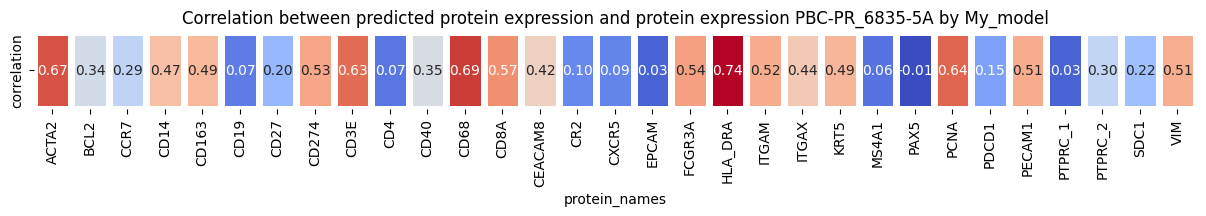

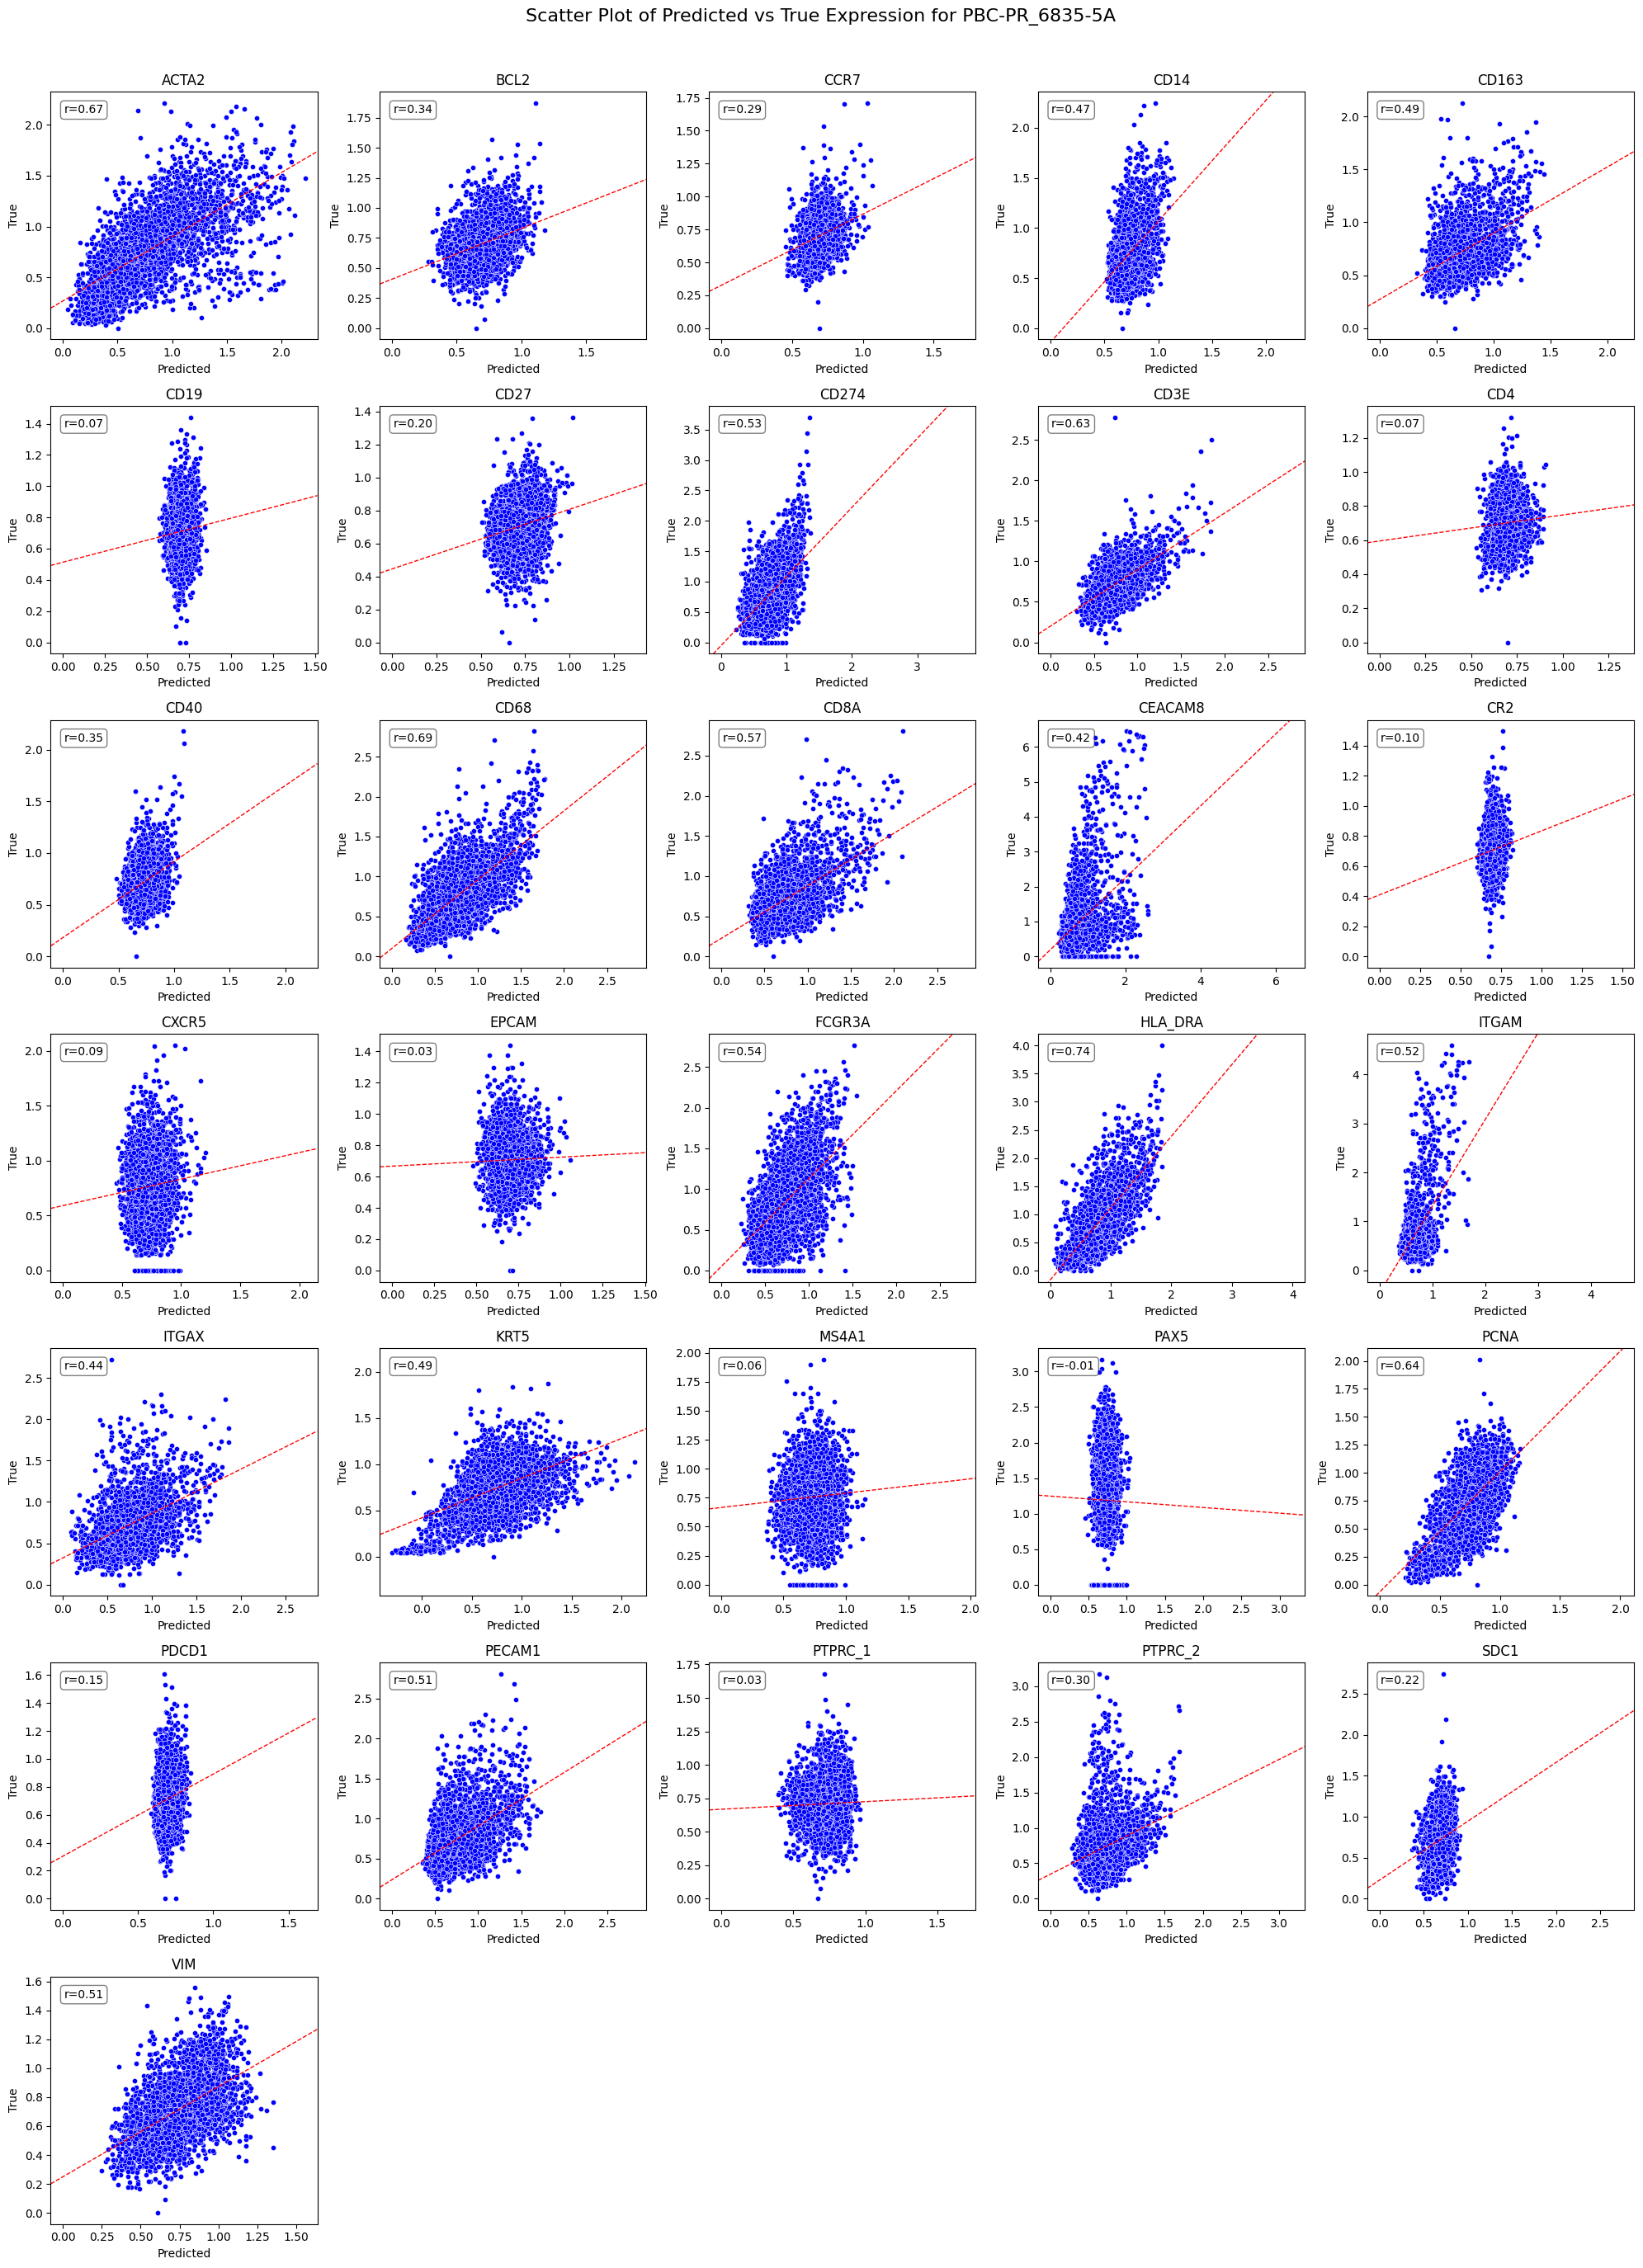

/ix/hosmanbeyoglu/haw309/DGAT_models/PBC-PR_6835-5A_11535_gene_31_protein

=== Test sample 'PBC_PR_6837' ===

Common genes: 11535
Common proteins: 31
Creating or loading dataset
Loading preprocessed data for sample 'CytAssist_FFPE_Protein_Expression_Human_Tonsil' from '/ix/hosmanbeyoglu/haw309/pyg_data/CytAssist_FFPE_Protein_Expression_Human_Tonsil_11535_new_spatial=6_1hop_new_filtering.pth'
Loading preprocessed data for sample 'CytAssist_FFPE_Protein_Expression_Human_Tonsil_AddOns' from '/ix/hosmanbeyoglu/haw309/pyg_data/CytAssist_FFPE_Protein_Expression_Human_Tonsil_AddOns_11535_new_spatial=6_1hop_new_filtering.pth'
Loading preprocessed data for sample 'CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer' from '/ix/hosmanbeyoglu/haw309/pyg_data/CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_11535_new_spatial=6_1hop_new_filtering.pth'
Loading preprocessed data for sample 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma' from '/ix/hosmanbeyoglu/haw309/pyg_data/CytAssist_F

Epoch [1/100] Total Loss: 10.4819 | mRNA Recon: 1.1863 | Protein Recon: 0.3617 | Alignment: 0.5480 | Protein Pred: 0.3475 | mRNA Pred: 1.1887
Test Loss: 12.0953
Protein-wise Spearman: Mean = 0.1702, Std = 0.2109, Median = 0.2068
Cell-wise Spearman: Mean = 0.1157, Std = 0.2015, Median = 0.1117
Number of cells with low variation: 0
Epoch 1: EB evidence = 0.4132


Epoch [2/100] Total Loss: 8.3577 | mRNA Recon: 1.0461 | Protein Recon: 0.3456 | Alignment: 0.4278 | Protein Pred: 0.3226 | mRNA Pred: 1.0476
Test Loss: 11.0846
Protein-wise Spearman: Mean = 0.1694, Std = 0.2182, Median = 0.1911
Cell-wise Spearman: Mean = 0.1261, Std = 0.1986, Median = 0.1355
Number of cells with low variation: 0
Epoch 2: EB evidence = 0.7352


Epoch [3/100] Total Loss: 7.8572 | mRNA Recon: 1.0295 | Protein Recon: 0.3700 | Alignment: 0.3593 | Protein Pred: 0.3635 | mRNA Pred: 1.0297
Test Loss: 11.0825
Protein-wise Spearman: Mean = 0.1758, Std = 0.2191, Median = 0.1899
Cell-wise Spearman: Mean = 0.1103, Std = 0.2167, Median = 0.1010
Number of cells with low variation: 0
Epoch 3: EB evidence = 0.8082


Epoch [4/100] Total Loss: 7.6973 | mRNA Recon: 1.0100 | Protein Recon: 0.2756 | Alignment: 0.3161 | Protein Pred: 0.2685 | mRNA Pred: 1.0108
Test Loss: 10.9695
Protein-wise Spearman: Mean = 0.1853, Std = 0.2191, Median = 0.2063
Cell-wise Spearman: Mean = 0.1126, Std = 0.2103, Median = 0.1101
Number of cells with low variation: 0
Epoch 4: EB evidence = 0.9088


Epoch [5/100] Total Loss: 7.5660 | mRNA Recon: 1.0110 | Protein Recon: 0.3047 | Alignment: 0.2864 | Protein Pred: 0.2889 | mRNA Pred: 1.0121
Test Loss: 10.9639
Protein-wise Spearman: Mean = 0.1820, Std = 0.2128, Median = 0.1761
Cell-wise Spearman: Mean = 0.1188, Std = 0.2248, Median = 0.1202
Number of cells with low variation: 0
Epoch 5: EB evidence = 0.9247


Epoch [6/100] Total Loss: 7.4844 | mRNA Recon: 1.0072 | Protein Recon: 0.3567 | Alignment: 0.2522 | Protein Pred: 0.3532 | mRNA Pred: 1.0078
Test Loss: 10.9274
Protein-wise Spearman: Mean = 0.1774, Std = 0.2115, Median = 0.1747
Cell-wise Spearman: Mean = 0.1190, Std = 0.1983, Median = 0.1151
Number of cells with low variation: 0
Epoch 6: EB evidence = 0.9483


Epoch [7/100] Total Loss: 7.4136 | mRNA Recon: 1.0054 | Protein Recon: 0.3442 | Alignment: 0.2339 | Protein Pred: 0.3434 | mRNA Pred: 1.0060
Test Loss: 10.9326
Protein-wise Spearman: Mean = 0.1780, Std = 0.2056, Median = 0.1819
Cell-wise Spearman: Mean = 0.1096, Std = 0.2433, Median = 0.1214
Number of cells with low variation: 0
Epoch 7: EB evidence = 0.7525


Epoch [8/100] Total Loss: 7.3518 | mRNA Recon: 0.9992 | Protein Recon: 0.2453 | Alignment: 0.2237 | Protein Pred: 0.2496 | mRNA Pred: 1.0004
Test Loss: 10.9135
Protein-wise Spearman: Mean = 0.1934, Std = 0.2057, Median = 0.2049
Cell-wise Spearman: Mean = 0.1505, Std = 0.2234, Median = 0.1621
Number of cells with low variation: 0
Epoch 8: EB evidence = 0.9265


Epoch [9/100] Total Loss: 7.2762 | mRNA Recon: 0.9996 | Protein Recon: 0.2665 | Alignment: 0.2161 | Protein Pred: 0.2839 | mRNA Pred: 1.0015
Test Loss: 10.9095
Protein-wise Spearman: Mean = 0.2032, Std = 0.2101, Median = 0.2100
Cell-wise Spearman: Mean = 0.1542, Std = 0.2356, Median = 0.1681
Number of cells with low variation: 0
Epoch 9: EB evidence = 0.4252


Epoch [10/100] Total Loss: 7.2162 | mRNA Recon: 1.0025 | Protein Recon: 0.2970 | Alignment: 0.2001 | Protein Pred: 0.3195 | mRNA Pred: 1.0038
Test Loss: 10.9212
Protein-wise Spearman: Mean = 0.2123, Std = 0.2061, Median = 0.2104
Cell-wise Spearman: Mean = 0.1635, Std = 0.2254, Median = 0.1746
Number of cells with low variation: 0
Epoch 10: Learning rate reduced.
Epoch 10: EB evidence = 0.8288


Epoch [11/100] Total Loss: 7.1657 | mRNA Recon: 0.9956 | Protein Recon: 0.2020 | Alignment: 0.1989 | Protein Pred: 0.2360 | mRNA Pred: 0.9986
Test Loss: 10.9051
Protein-wise Spearman: Mean = 0.2238, Std = 0.2017, Median = 0.2378
Cell-wise Spearman: Mean = 0.1708, Std = 0.2188, Median = 0.1883
Number of cells with low variation: 0
Epoch 11: EB evidence = 1.0500


Epoch [12/100] Total Loss: 7.1098 | mRNA Recon: 0.9940 | Protein Recon: 0.1952 | Alignment: 0.1820 | Protein Pred: 0.2234 | mRNA Pred: 0.9966
Test Loss: 10.8808
Protein-wise Spearman: Mean = 0.2452, Std = 0.2039, Median = 0.2702
Cell-wise Spearman: Mean = 0.1659, Std = 0.2293, Median = 0.1742
Number of cells with low variation: 0
Epoch 12: EB evidence = 0.8329


Epoch [13/100] Total Loss: 7.0681 | mRNA Recon: 0.9930 | Protein Recon: 0.1926 | Alignment: 0.1722 | Protein Pred: 0.2229 | mRNA Pred: 0.9957
Test Loss: 10.9146
Protein-wise Spearman: Mean = 0.2562, Std = 0.2104, Median = 0.2620
Cell-wise Spearman: Mean = 0.1962, Std = 0.2139, Median = 0.2067
Number of cells with low variation: 0
Epoch 13: EB evidence = 0.9302


Epoch [14/100] Total Loss: 7.0258 | mRNA Recon: 1.0005 | Protein Recon: 0.2739 | Alignment: 0.1632 | Protein Pred: 0.2961 | mRNA Pred: 1.0023
Test Loss: 10.8880
Protein-wise Spearman: Mean = 0.2708, Std = 0.2125, Median = 0.2773
Cell-wise Spearman: Mean = 0.1925, Std = 0.2274, Median = 0.2058
Number of cells with low variation: 0
Epoch 14: EB evidence = 0.9449


Epoch [15/100] Total Loss: 7.0131 | mRNA Recon: 1.0010 | Protein Recon: 0.2636 | Alignment: 0.1569 | Protein Pred: 0.3025 | mRNA Pred: 1.0022
Test Loss: 10.8739
Protein-wise Spearman: Mean = 0.2581, Std = 0.2214, Median = 0.2375
Cell-wise Spearman: Mean = 0.2282, Std = 0.2142, Median = 0.2411
Number of cells with low variation: 0
Epoch 15: EB evidence = -0.1813


Epoch [16/100] Total Loss: 6.9646 | mRNA Recon: 0.9814 | Protein Recon: 0.1702 | Alignment: 0.1593 | Protein Pred: 0.2077 | mRNA Pred: 0.9861
Test Loss: 10.8279
Protein-wise Spearman: Mean = 0.2698, Std = 0.2159, Median = 0.2663
Cell-wise Spearman: Mean = 0.2077, Std = 0.2338, Median = 0.2123
Number of cells with low variation: 0
Epoch 16: EB evidence = 0.9290


Epoch [17/100] Total Loss: 6.9231 | mRNA Recon: 0.9798 | Protein Recon: 0.1659 | Alignment: 0.1520 | Protein Pred: 0.2139 | mRNA Pred: 0.9843
Test Loss: 10.9094
Protein-wise Spearman: Mean = 0.2874, Std = 0.2057, Median = 0.2534
Cell-wise Spearman: Mean = 0.2337, Std = 0.2224, Median = 0.2460
Number of cells with low variation: 0
Epoch 17: EB evidence = 0.9024


Epoch [18/100] Total Loss: 6.9008 | mRNA Recon: 0.9683 | Protein Recon: 0.1659 | Alignment: 0.1423 | Protein Pred: 0.2063 | mRNA Pred: 0.9708
Test Loss: 10.8905
Protein-wise Spearman: Mean = 0.2902, Std = 0.2030, Median = 0.2636
Cell-wise Spearman: Mean = 0.2057, Std = 0.2295, Median = 0.2159
Number of cells with low variation: 0
Epoch 18: EB evidence = 0.8987


Epoch [19/100] Total Loss: 6.8623 | mRNA Recon: 0.9765 | Protein Recon: 0.1641 | Alignment: 0.1369 | Protein Pred: 0.2007 | mRNA Pred: 0.9805
Test Loss: 10.8367
Protein-wise Spearman: Mean = 0.2782, Std = 0.2136, Median = 0.2563
Cell-wise Spearman: Mean = 0.2378, Std = 0.2118, Median = 0.2488
Number of cells with low variation: 0
Epoch 19: EB evidence = 0.8591


Epoch [20/100] Total Loss: 6.8584 | mRNA Recon: 0.9767 | Protein Recon: 0.1858 | Alignment: 0.1350 | Protein Pred: 0.2249 | mRNA Pred: 0.9770
Test Loss: 10.8678
Protein-wise Spearman: Mean = 0.2900, Std = 0.2188, Median = 0.2291
Cell-wise Spearman: Mean = 0.2453, Std = 0.2144, Median = 0.2581
Number of cells with low variation: 0
Epoch 20: Learning rate reduced.
Epoch 20: EB evidence = 0.6742


Epoch [21/100] Total Loss: 6.8121 | mRNA Recon: 0.9715 | Protein Recon: 0.1730 | Alignment: 0.1318 | Protein Pred: 0.2120 | mRNA Pred: 0.9736
Test Loss: 10.8324
Protein-wise Spearman: Mean = 0.3045, Std = 0.2023, Median = 0.3008
Cell-wise Spearman: Mean = 0.2367, Std = 0.2251, Median = 0.2462
Number of cells with low variation: 0
Epoch 21: EB evidence = 0.8892


Epoch [22/100] Total Loss: 6.7892 | mRNA Recon: 0.9621 | Protein Recon: 0.1546 | Alignment: 0.1218 | Protein Pred: 0.1839 | mRNA Pred: 0.9679
Test Loss: 10.9449
Protein-wise Spearman: Mean = 0.2822, Std = 0.2174, Median = 0.2410
Cell-wise Spearman: Mean = 0.2513, Std = 0.2239, Median = 0.2617
Number of cells with low variation: 0
Epoch 22: EB evidence = 0.8936


Epoch [23/100] Total Loss: 6.7887 | mRNA Recon: 0.9976 | Protein Recon: 0.2310 | Alignment: 0.1164 | Protein Pred: 0.2705 | mRNA Pred: 1.0006
Test Loss: 10.8558
Protein-wise Spearman: Mean = 0.2965, Std = 0.2145, Median = 0.2859
Cell-wise Spearman: Mean = 0.2201, Std = 0.2361, Median = 0.2306
Number of cells with low variation: 0
Epoch 23: EB evidence = 0.8575


Epoch [24/100] Total Loss: 6.7736 | mRNA Recon: 0.9829 | Protein Recon: 0.1502 | Alignment: 0.1163 | Protein Pred: 0.1875 | mRNA Pred: 0.9868
Test Loss: 10.8788
Protein-wise Spearman: Mean = 0.2965, Std = 0.2130, Median = 0.2564
Cell-wise Spearman: Mean = 0.2473, Std = 0.2121, Median = 0.2601
Number of cells with low variation: 0
Epoch 24: EB evidence = 0.8700


Epoch [25/100] Total Loss: 6.7426 | mRNA Recon: 0.9695 | Protein Recon: 0.1612 | Alignment: 0.1196 | Protein Pred: 0.2018 | mRNA Pred: 0.9704
Test Loss: 10.8500
Protein-wise Spearman: Mean = 0.2922, Std = 0.2128, Median = 0.2771
Cell-wise Spearman: Mean = 0.2393, Std = 0.2311, Median = 0.2500
Number of cells with low variation: 0
Epoch 25: EB evidence = 0.8763


Epoch [26/100] Total Loss: 6.7293 | mRNA Recon: 0.9690 | Protein Recon: 0.1435 | Alignment: 0.1146 | Protein Pred: 0.1803 | mRNA Pred: 0.9748
Test Loss: 10.8640
Protein-wise Spearman: Mean = 0.3065, Std = 0.2094, Median = 0.2857
Cell-wise Spearman: Mean = 0.2600, Std = 0.2212, Median = 0.2716
Number of cells with low variation: 0
Epoch 26: EB evidence = 0.9006


Epoch [27/100] Total Loss: 6.7376 | mRNA Recon: 0.9814 | Protein Recon: 0.1438 | Alignment: 0.1073 | Protein Pred: 0.1798 | mRNA Pred: 0.9853
Test Loss: 10.8413
Protein-wise Spearman: Mean = 0.3033, Std = 0.2074, Median = 0.2514
Cell-wise Spearman: Mean = 0.2454, Std = 0.2379, Median = 0.2565
Number of cells with low variation: 0
Epoch 27: EB evidence = 0.9396


Epoch [28/100] Total Loss: 6.7043 | mRNA Recon: 0.9675 | Protein Recon: 0.1414 | Alignment: 0.1085 | Protein Pred: 0.1773 | mRNA Pred: 0.9736
Test Loss: 10.9114
Protein-wise Spearman: Mean = 0.2921, Std = 0.2130, Median = 0.2658
Cell-wise Spearman: Mean = 0.2664, Std = 0.2148, Median = 0.2750
Number of cells with low variation: 0
Epoch 28: EB evidence = 0.9252


Epoch [29/100] Total Loss: 6.6991 | mRNA Recon: 0.9659 | Protein Recon: 0.1388 | Alignment: 0.1100 | Protein Pred: 0.1807 | mRNA Pred: 0.9723
Test Loss: 10.8705
Protein-wise Spearman: Mean = 0.2933, Std = 0.2151, Median = 0.2391
Cell-wise Spearman: Mean = 0.2286, Std = 0.2377, Median = 0.2433
Number of cells with low variation: 0
Epoch 29: EB evidence = 0.9016


Epoch [30/100] Total Loss: 6.6772 | mRNA Recon: 0.9651 | Protein Recon: 0.1344 | Alignment: 0.1051 | Protein Pred: 0.1694 | mRNA Pred: 0.9721
Test Loss: 10.8402
Protein-wise Spearman: Mean = 0.3093, Std = 0.2045, Median = 0.2863
Cell-wise Spearman: Mean = 0.2701, Std = 0.2170, Median = 0.2827
Number of cells with low variation: 0
Epoch 30: Learning rate reduced.
Epoch 30: EB evidence = 0.9433


Epoch [31/100] Total Loss: 6.6447 | mRNA Recon: 0.9654 | Protein Recon: 0.1455 | Alignment: 0.1046 | Protein Pred: 0.1776 | mRNA Pred: 0.9680
Test Loss: 10.8548
Protein-wise Spearman: Mean = 0.3157, Std = 0.1987, Median = 0.2813
Cell-wise Spearman: Mean = 0.2483, Std = 0.2415, Median = 0.2569
Number of cells with low variation: 0
Epoch 31: EB evidence = 1.1683


Epoch [32/100] Total Loss: 6.6293 | mRNA Recon: 0.9650 | Protein Recon: 0.1488 | Alignment: 0.1025 | Protein Pred: 0.1747 | mRNA Pred: 0.9678
Test Loss: 10.8803
Protein-wise Spearman: Mean = 0.3074, Std = 0.2030, Median = 0.2689
Cell-wise Spearman: Mean = 0.2661, Std = 0.2270, Median = 0.2750
Number of cells with low variation: 0
Epoch 32: EB evidence = 0.8971


Epoch [33/100] Total Loss: 6.6153 | mRNA Recon: 0.9634 | Protein Recon: 0.1303 | Alignment: 0.0990 | Protein Pred: 0.1587 | mRNA Pred: 0.9698
Test Loss: 10.8476
Protein-wise Spearman: Mean = 0.3089, Std = 0.2069, Median = 0.2423
Cell-wise Spearman: Mean = 0.2662, Std = 0.2348, Median = 0.2758
Number of cells with low variation: 0
Epoch 33: EB evidence = 0.9404


Epoch [34/100] Total Loss: 6.6058 | mRNA Recon: 0.9944 | Protein Recon: 0.1994 | Alignment: 0.0924 | Protein Pred: 0.2391 | mRNA Pred: 0.9989
Test Loss: 10.8527
Protein-wise Spearman: Mean = 0.3063, Std = 0.2072, Median = 0.2500
Cell-wise Spearman: Mean = 0.2731, Std = 0.2277, Median = 0.2808
Number of cells with low variation: 0
Epoch 34: EB evidence = 0.9630


Epoch [35/100] Total Loss: 6.5907 | mRNA Recon: 0.9641 | Protein Recon: 0.1395 | Alignment: 0.0973 | Protein Pred: 0.1646 | mRNA Pred: 0.9669
Test Loss: 10.8539
Protein-wise Spearman: Mean = 0.3158, Std = 0.1983, Median = 0.2612
Cell-wise Spearman: Mean = 0.2450, Std = 0.2374, Median = 0.2504
Number of cells with low variation: 0
Epoch 35: EB evidence = 0.9468


Epoch [36/100] Total Loss: 6.5780 | mRNA Recon: 0.9774 | Protein Recon: 0.1232 | Alignment: 0.0909 | Protein Pred: 0.1492 | mRNA Pred: 0.9830
Test Loss: 10.8708
Protein-wise Spearman: Mean = 0.3130, Std = 0.1989, Median = 0.2544
Cell-wise Spearman: Mean = 0.2766, Std = 0.2249, Median = 0.2843
Number of cells with low variation: 0
Epoch 36: EB evidence = 0.9553


Epoch [37/100] Total Loss: 6.5681 | mRNA Recon: 0.9775 | Protein Recon: 0.1238 | Alignment: 0.0892 | Protein Pred: 0.1492 | mRNA Pred: 0.9825
Test Loss: 10.8534
Protein-wise Spearman: Mean = 0.3181, Std = 0.1999, Median = 0.2605
Cell-wise Spearman: Mean = 0.2588, Std = 0.2406, Median = 0.2645
Number of cells with low variation: 0
Epoch 37: EB evidence = 0.9575


Epoch [38/100] Total Loss: 6.5565 | mRNA Recon: 0.9523 | Protein Recon: 0.1262 | Alignment: 0.0900 | Protein Pred: 0.1554 | mRNA Pred: 0.9593
Test Loss: 10.8442
Protein-wise Spearman: Mean = 0.3153, Std = 0.2026, Median = 0.2682
Cell-wise Spearman: Mean = 0.2802, Std = 0.2295, Median = 0.2911
Number of cells with low variation: 0
Epoch 38: EB evidence = 0.9912


Epoch [39/100] Total Loss: 6.5480 | mRNA Recon: 0.9604 | Protein Recon: 0.1188 | Alignment: 0.0903 | Protein Pred: 0.1478 | mRNA Pred: 0.9669
Test Loss: 10.8423
Protein-wise Spearman: Mean = 0.3175, Std = 0.2006, Median = 0.2644
Cell-wise Spearman: Mean = 0.2734, Std = 0.2352, Median = 0.2815
Number of cells with low variation: 0
Epoch 39: EB evidence = 0.9383


Epoch [40/100] Total Loss: 6.5400 | mRNA Recon: 0.9936 | Protein Recon: 0.1838 | Alignment: 0.0846 | Protein Pred: 0.2275 | mRNA Pred: 0.9986
Test Loss: 10.8740
Protein-wise Spearman: Mean = 0.3152, Std = 0.1998, Median = 0.2702
Cell-wise Spearman: Mean = 0.2782, Std = 0.2310, Median = 0.2863
Number of cells with low variation: 0
Epoch 40: Learning rate reduced.
Epoch 40: EB evidence = 0.9628


Epoch [41/100] Total Loss: 6.5360 | mRNA Recon: 0.9760 | Protein Recon: 0.1226 | Alignment: 0.0852 | Protein Pred: 0.1441 | mRNA Pred: 0.9819
Test Loss: 10.8384
Protein-wise Spearman: Mean = 0.3178, Std = 0.1994, Median = 0.2687
Cell-wise Spearman: Mean = 0.2687, Std = 0.2397, Median = 0.2784
Number of cells with low variation: 0
Epoch 41: EB evidence = 0.9056


Epoch [42/100] Total Loss: 6.5275 | mRNA Recon: 0.9760 | Protein Recon: 0.1178 | Alignment: 0.0838 | Protein Pred: 0.1426 | mRNA Pred: 0.9816
Test Loss: 10.8447
Protein-wise Spearman: Mean = 0.3172, Std = 0.2002, Median = 0.2586
Cell-wise Spearman: Mean = 0.2803, Std = 0.2322, Median = 0.2883
Number of cells with low variation: 0
Epoch 42: EB evidence = 0.9449


Epoch [43/100] Total Loss: 6.5238 | mRNA Recon: 0.9622 | Protein Recon: 0.1251 | Alignment: 0.0870 | Protein Pred: 0.1523 | mRNA Pred: 0.9649
Test Loss: 10.8506
Protein-wise Spearman: Mean = 0.3159, Std = 0.1995, Median = 0.2685
Cell-wise Spearman: Mean = 0.2702, Std = 0.2394, Median = 0.2790
Number of cells with low variation: 0
Epoch 43: EB evidence = 0.8642


Epoch [44/100] Total Loss: 6.5122 | mRNA Recon: 0.9510 | Protein Recon: 0.1229 | Alignment: 0.0843 | Protein Pred: 0.1491 | mRNA Pred: 0.9583
Test Loss: 10.8303
Protein-wise Spearman: Mean = 0.3209, Std = 0.1992, Median = 0.2892
Cell-wise Spearman: Mean = 0.2833, Std = 0.2335, Median = 0.2933
Number of cells with low variation: 0
Epoch 44: EB evidence = 0.9426


Epoch [45/100] Total Loss: 6.5221 | mRNA Recon: 0.9592 | Protein Recon: 0.1136 | Alignment: 0.0846 | Protein Pred: 0.1396 | mRNA Pred: 0.9658
Test Loss: 10.8275
Protein-wise Spearman: Mean = 0.3169, Std = 0.1992, Median = 0.2693
Cell-wise Spearman: Mean = 0.2832, Std = 0.2342, Median = 0.2919
Number of cells with low variation: 0
Epoch 45: EB evidence = 0.9485


Epoch [46/100] Total Loss: 6.5108 | mRNA Recon: 0.9508 | Protein Recon: 0.1265 | Alignment: 0.0826 | Protein Pred: 0.1502 | mRNA Pred: 0.9578
Test Loss: 10.9049
Protein-wise Spearman: Mean = 0.3155, Std = 0.1977, Median = 0.2773
Cell-wise Spearman: Mean = 0.2710, Std = 0.2357, Median = 0.2827
Number of cells with low variation: 0
Epoch 46: EB evidence = 0.9204


Epoch [47/100] Total Loss: 6.5155 | mRNA Recon: 0.9614 | Protein Recon: 0.1235 | Alignment: 0.0857 | Protein Pred: 0.1603 | mRNA Pred: 0.9644
Test Loss: 10.7988
Protein-wise Spearman: Mean = 0.3163, Std = 0.2026, Median = 0.2702
Cell-wise Spearman: Mean = 0.2771, Std = 0.2387, Median = 0.2851
Number of cells with low variation: 0
Epoch 47: EB evidence = 0.8017


Epoch [48/100] Total Loss: 6.5081 | mRNA Recon: 0.9580 | Protein Recon: 0.1150 | Alignment: 0.0843 | Protein Pred: 0.1383 | mRNA Pred: 0.9653
Test Loss: 10.8327
Protein-wise Spearman: Mean = 0.3145, Std = 0.2022, Median = 0.2793
Cell-wise Spearman: Mean = 0.2899, Std = 0.2360, Median = 0.2978
Number of cells with low variation: 0
Epoch 48: EB evidence = 0.9495


Epoch [49/100] Total Loss: 6.4980 | mRNA Recon: 0.9581 | Protein Recon: 0.1168 | Alignment: 0.0824 | Protein Pred: 0.1372 | mRNA Pred: 0.9656
Test Loss: 10.8157
Protein-wise Spearman: Mean = 0.3169, Std = 0.2035, Median = 0.2740
Cell-wise Spearman: Mean = 0.2758, Std = 0.2372, Median = 0.2875
Number of cells with low variation: 0
Epoch 49: EB evidence = 0.9356


Epoch [50/100] Total Loss: 6.4759 | mRNA Recon: 0.9930 | Protein Recon: 0.1710 | Alignment: 0.0772 | Protein Pred: 0.2129 | mRNA Pred: 0.9983
Test Loss: 10.8463
Protein-wise Spearman: Mean = 0.3156, Std = 0.2024, Median = 0.2935
Cell-wise Spearman: Mean = 0.2846, Std = 0.2330, Median = 0.2948
Number of cells with low variation: 0
Epoch 50: Learning rate reduced.
Epoch 50: EB evidence = 0.9685


Epoch [51/100] Total Loss: 6.4766 | mRNA Recon: 0.9737 | Protein Recon: 0.1077 | Alignment: 0.0773 | Protein Pred: 0.1322 | mRNA Pred: 0.9795
Test Loss: 10.8045
Protein-wise Spearman: Mean = 0.3189, Std = 0.2022, Median = 0.2825
Cell-wise Spearman: Mean = 0.2805, Std = 0.2367, Median = 0.2911
Number of cells with low variation: 0
Epoch 51: EB evidence = 0.9643


Epoch [52/100] Total Loss: 6.4659 | mRNA Recon: 0.9928 | Protein Recon: 0.1690 | Alignment: 0.0748 | Protein Pred: 0.2146 | mRNA Pred: 0.9978
Test Loss: 10.8415
Protein-wise Spearman: Mean = 0.3164, Std = 0.1991, Median = 0.2704
Cell-wise Spearman: Mean = 0.2769, Std = 0.2363, Median = 0.2855
Number of cells with low variation: 0
Epoch 52: EB evidence = 0.9379


Epoch [53/100] Total Loss: 6.4578 | mRNA Recon: 0.9492 | Protein Recon: 0.1127 | Alignment: 0.0778 | Protein Pred: 0.1409 | mRNA Pred: 0.9565
Test Loss: 10.8306
Protein-wise Spearman: Mean = 0.3119, Std = 0.2022, Median = 0.2773
Cell-wise Spearman: Mean = 0.2810, Std = 0.2373, Median = 0.2929
Number of cells with low variation: 0
Epoch 53: EB evidence = 0.9759


Epoch [54/100] Total Loss: 6.4488 | mRNA Recon: 0.9728 | Protein Recon: 0.1061 | Alignment: 0.0757 | Protein Pred: 0.1287 | mRNA Pred: 0.9786
Test Loss: 10.8402
Protein-wise Spearman: Mean = 0.3278, Std = 0.1940, Median = 0.2996
Cell-wise Spearman: Mean = 0.2811, Std = 0.2353, Median = 0.2927
Number of cells with low variation: 0
Epoch 54: EB evidence = 0.9667


Epoch [55/100] Total Loss: 6.4425 | mRNA Recon: 0.9724 | Protein Recon: 0.1035 | Alignment: 0.0751 | Protein Pred: 0.1283 | mRNA Pred: 0.9784
Test Loss: 10.8286
Protein-wise Spearman: Mean = 0.3177, Std = 0.1977, Median = 0.2858
Cell-wise Spearman: Mean = 0.2814, Std = 0.2415, Median = 0.2927
Number of cells with low variation: 0
Epoch 55: EB evidence = 0.9651


Epoch [56/100] Total Loss: 6.4385 | mRNA Recon: 0.9724 | Protein Recon: 0.1031 | Alignment: 0.0744 | Protein Pred: 0.1279 | mRNA Pred: 0.9785
Test Loss: 10.8343
Protein-wise Spearman: Mean = 0.3204, Std = 0.1959, Median = 0.2951
Cell-wise Spearman: Mean = 0.2817, Std = 0.2295, Median = 0.2952
Number of cells with low variation: 0
Epoch 56: EB evidence = 0.9517


Epoch [57/100] Total Loss: 6.4348 | mRNA Recon: 0.9597 | Protein Recon: 0.1124 | Alignment: 0.0771 | Protein Pred: 0.1398 | mRNA Pred: 0.9630
Test Loss: 10.8316
Protein-wise Spearman: Mean = 0.3188, Std = 0.2011, Median = 0.2944
Cell-wise Spearman: Mean = 0.2788, Std = 0.2417, Median = 0.2877
Number of cells with low variation: 0
Epoch 57: EB evidence = 0.9308


Epoch [58/100] Total Loss: 6.4330 | mRNA Recon: 0.9564 | Protein Recon: 0.1057 | Alignment: 0.0761 | Protein Pred: 0.1247 | mRNA Pred: 0.9640
Test Loss: 10.8253
Protein-wise Spearman: Mean = 0.3154, Std = 0.1966, Median = 0.2882
Cell-wise Spearman: Mean = 0.2823, Std = 0.2386, Median = 0.2933
Number of cells with low variation: 0
Epoch 58: EB evidence = 0.9491


Epoch [59/100] Total Loss: 6.4258 | mRNA Recon: 0.9488 | Protein Recon: 0.1070 | Alignment: 0.0742 | Protein Pred: 0.1353 | mRNA Pred: 0.9562
Test Loss: 10.8482
Protein-wise Spearman: Mean = 0.3184, Std = 0.1983, Median = 0.2943
Cell-wise Spearman: Mean = 0.2773, Std = 0.2352, Median = 0.2885
Number of cells with low variation: 0
Epoch 59: EB evidence = 0.9453


Epoch [60/100] Total Loss: 6.4200 | mRNA Recon: 0.9715 | Protein Recon: 0.1000 | Alignment: 0.0727 | Protein Pred: 0.1244 | mRNA Pred: 0.9776
Test Loss: 10.8279
Protein-wise Spearman: Mean = 0.3214, Std = 0.1947, Median = 0.3032
Cell-wise Spearman: Mean = 0.2828, Std = 0.2337, Median = 0.2974
Number of cells with low variation: 0
Epoch 60: Learning rate reduced.
Epoch 60: EB evidence = 0.9498


Epoch [61/100] Total Loss: 6.4158 | mRNA Recon: 0.9481 | Protein Recon: 0.1060 | Alignment: 0.0731 | Protein Pred: 0.1350 | mRNA Pred: 0.9551
Test Loss: 10.8334
Protein-wise Spearman: Mean = 0.3161, Std = 0.1987, Median = 0.2877
Cell-wise Spearman: Mean = 0.2738, Std = 0.2409, Median = 0.2835
Number of cells with low variation: 0
Epoch 61: EB evidence = 0.9584


Epoch [62/100] Total Loss: 6.4112 | mRNA Recon: 0.9591 | Protein Recon: 0.1105 | Alignment: 0.0750 | Protein Pred: 0.1315 | mRNA Pred: 0.9625
Test Loss: 10.8420
Protein-wise Spearman: Mean = 0.3217, Std = 0.1966, Median = 0.2944
Cell-wise Spearman: Mean = 0.2900, Std = 0.2339, Median = 0.3028
Number of cells with low variation: 0
Epoch 62: EB evidence = 0.9515


Epoch [63/100] Total Loss: 6.4118 | mRNA Recon: 0.9553 | Protein Recon: 0.1029 | Alignment: 0.0742 | Protein Pred: 0.1210 | mRNA Pred: 0.9631
Test Loss: 10.8371
Protein-wise Spearman: Mean = 0.3176, Std = 0.1934, Median = 0.2988
Cell-wise Spearman: Mean = 0.2672, Std = 0.2424, Median = 0.2786
Number of cells with low variation: 0
Epoch 63: EB evidence = 0.9627


Epoch [64/100] Total Loss: 6.4097 | mRNA Recon: 0.9590 | Protein Recon: 0.1087 | Alignment: 0.0746 | Protein Pred: 0.1385 | mRNA Pred: 0.9621
Test Loss: 10.8496
Protein-wise Spearman: Mean = 0.3164, Std = 0.1966, Median = 0.3081
Cell-wise Spearman: Mean = 0.2809, Std = 0.2361, Median = 0.2919
Number of cells with low variation: 0
Epoch 64: EB evidence = 0.9062


Epoch [65/100] Total Loss: 6.4169 | mRNA Recon: 0.9703 | Protein Recon: 0.1005 | Alignment: 0.0713 | Protein Pred: 0.1257 | mRNA Pred: 0.9768
Test Loss: 10.8348
Protein-wise Spearman: Mean = 0.3194, Std = 0.1966, Median = 0.3026
Cell-wise Spearman: Mean = 0.2833, Std = 0.2408, Median = 0.2911
Number of cells with low variation: 0
Epoch 65: EB evidence = 0.9242


Epoch [66/100] Total Loss: 6.3986 | mRNA Recon: 0.9547 | Protein Recon: 0.1023 | Alignment: 0.0728 | Protein Pred: 0.1196 | mRNA Pred: 0.9627
Test Loss: 10.8459
Protein-wise Spearman: Mean = 0.3166, Std = 0.1949, Median = 0.2975
Cell-wise Spearman: Mean = 0.2763, Std = 0.2329, Median = 0.2903
Number of cells with low variation: 0
Epoch 66: EB evidence = 0.9656


Epoch [67/100] Total Loss: 6.3960 | mRNA Recon: 0.9697 | Protein Recon: 0.0972 | Alignment: 0.0711 | Protein Pred: 0.1238 | mRNA Pred: 0.9757
Test Loss: 10.8411
Protein-wise Spearman: Mean = 0.3188, Std = 0.1944, Median = 0.2964
Cell-wise Spearman: Mean = 0.2751, Std = 0.2385, Median = 0.2839
Number of cells with low variation: 0
Epoch 67: EB evidence = 0.9505


Epoch [68/100] Total Loss: 6.3923 | mRNA Recon: 0.9543 | Protein Recon: 0.0990 | Alignment: 0.0725 | Protein Pred: 0.1201 | mRNA Pred: 0.9622
Test Loss: 10.8236
Protein-wise Spearman: Mean = 0.3126, Std = 0.2019, Median = 0.2727
Cell-wise Spearman: Mean = 0.2861, Std = 0.2370, Median = 0.2964
Number of cells with low variation: 0
Epoch 68: EB evidence = 0.9522


Epoch [69/100] Total Loss: 6.3897 | mRNA Recon: 0.9920 | Protein Recon: 0.1528 | Alignment: 0.0662 | Protein Pred: 0.1916 | mRNA Pred: 0.9974
Test Loss: 10.8209
Protein-wise Spearman: Mean = 0.3173, Std = 0.1950, Median = 0.3051
Cell-wise Spearman: Mean = 0.2795, Std = 0.2376, Median = 0.2867
Number of cells with low variation: 0
Epoch 69: EB evidence = 0.9718


Epoch [70/100] Total Loss: 6.3847 | mRNA Recon: 0.9471 | Protein Recon: 0.1009 | Alignment: 0.0694 | Protein Pred: 0.1298 | mRNA Pred: 0.9543
Test Loss: 10.8500
Protein-wise Spearman: Mean = 0.3165, Std = 0.1956, Median = 0.3052
Cell-wise Spearman: Mean = 0.2817, Std = 0.2350, Median = 0.2940
Number of cells with low variation: 0
Epoch 70: Learning rate reduced.
Epoch 70: EB evidence = 0.9602


Epoch [71/100] Total Loss: 6.3851 | mRNA Recon: 0.9541 | Protein Recon: 0.0981 | Alignment: 0.0705 | Protein Pred: 0.1192 | mRNA Pred: 0.9621
Test Loss: 10.8229
Protein-wise Spearman: Mean = 0.3167, Std = 0.1974, Median = 0.3030
Cell-wise Spearman: Mean = 0.2759, Std = 0.2425, Median = 0.2867
Number of cells with low variation: 0
Epoch 71: EB evidence = 0.9427


Epoch [72/100] Total Loss: 6.3707 | mRNA Recon: 0.9579 | Protein Recon: 0.1059 | Alignment: 0.0701 | Protein Pred: 0.1271 | mRNA Pred: 0.9616
Test Loss: 10.8232
Protein-wise Spearman: Mean = 0.3197, Std = 0.1952, Median = 0.3108
Cell-wise Spearman: Mean = 0.2902, Std = 0.2366, Median = 0.3024
Number of cells with low variation: 0
Epoch 72: EB evidence = 0.9483


Epoch [73/100] Total Loss: 6.3765 | mRNA Recon: 0.9681 | Protein Recon: 0.0938 | Alignment: 0.0677 | Protein Pred: 0.1163 | mRNA Pred: 0.9749
Test Loss: 10.8428
Protein-wise Spearman: Mean = 0.3145, Std = 0.1938, Median = 0.3112
Cell-wise Spearman: Mean = 0.2839, Std = 0.2350, Median = 0.2952
Number of cells with low variation: 0
Epoch 73: EB evidence = 0.9719


Epoch [74/100] Total Loss: 6.3666 | mRNA Recon: 0.9681 | Protein Recon: 0.0935 | Alignment: 0.0669 | Protein Pred: 0.1155 | mRNA Pred: 0.9745
Test Loss: 10.8339
Protein-wise Spearman: Mean = 0.3169, Std = 0.1919, Median = 0.3126
Cell-wise Spearman: Mean = 0.2806, Std = 0.2353, Median = 0.2927
Number of cells with low variation: 0
Epoch 74: EB evidence = 0.9714


Epoch [75/100] Total Loss: 6.3593 | mRNA Recon: 0.9575 | Protein Recon: 0.1032 | Alignment: 0.0692 | Protein Pred: 0.1244 | mRNA Pred: 0.9612
Test Loss: 10.8357
Protein-wise Spearman: Mean = 0.3184, Std = 0.1928, Median = 0.3105
Cell-wise Spearman: Mean = 0.2780, Std = 0.2369, Median = 0.2899
Number of cells with low variation: 0
Epoch 75: EB evidence = 0.9587


Epoch [76/100] Total Loss: 6.3591 | mRNA Recon: 0.9920 | Protein Recon: 0.1494 | Alignment: 0.0629 | Protein Pred: 0.1813 | mRNA Pred: 0.9971
Test Loss: 10.8296
Protein-wise Spearman: Mean = 0.3134, Std = 0.1968, Median = 0.2934
Cell-wise Spearman: Mean = 0.2865, Std = 0.2381, Median = 0.2960
Number of cells with low variation: 0
Epoch 76: EB evidence = 0.9748
--> EB early stopping at epoch 76 (mean_evidence=0.9603, threshold=0.96)
Test Loss: 10.8296
Protein-wise Spearman: Mean = 0.3134, Std = 0.1968, Median = 0.2934
Cell-wise Spearman: Mean = 0.2865, Std = 0.2381, Median = 0.2960
Number of cells with low variation: 0
Average Cell Pearson Cor in test data:  0.3299001786149135
Average Cell Spearman Cor in test data:  0.2865234316113204
Average Protein Cor in test data: 0.3381

Average RMSE in test data: 0.2469



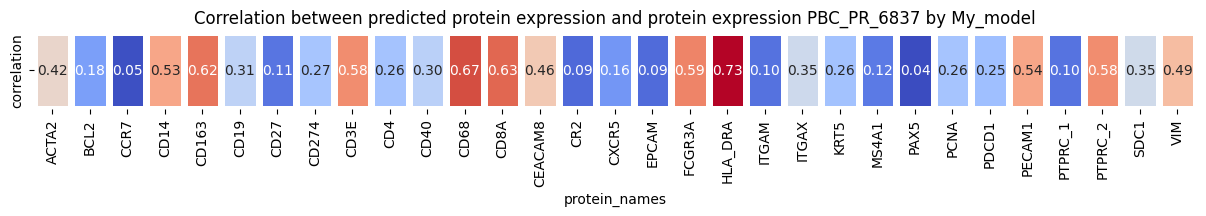

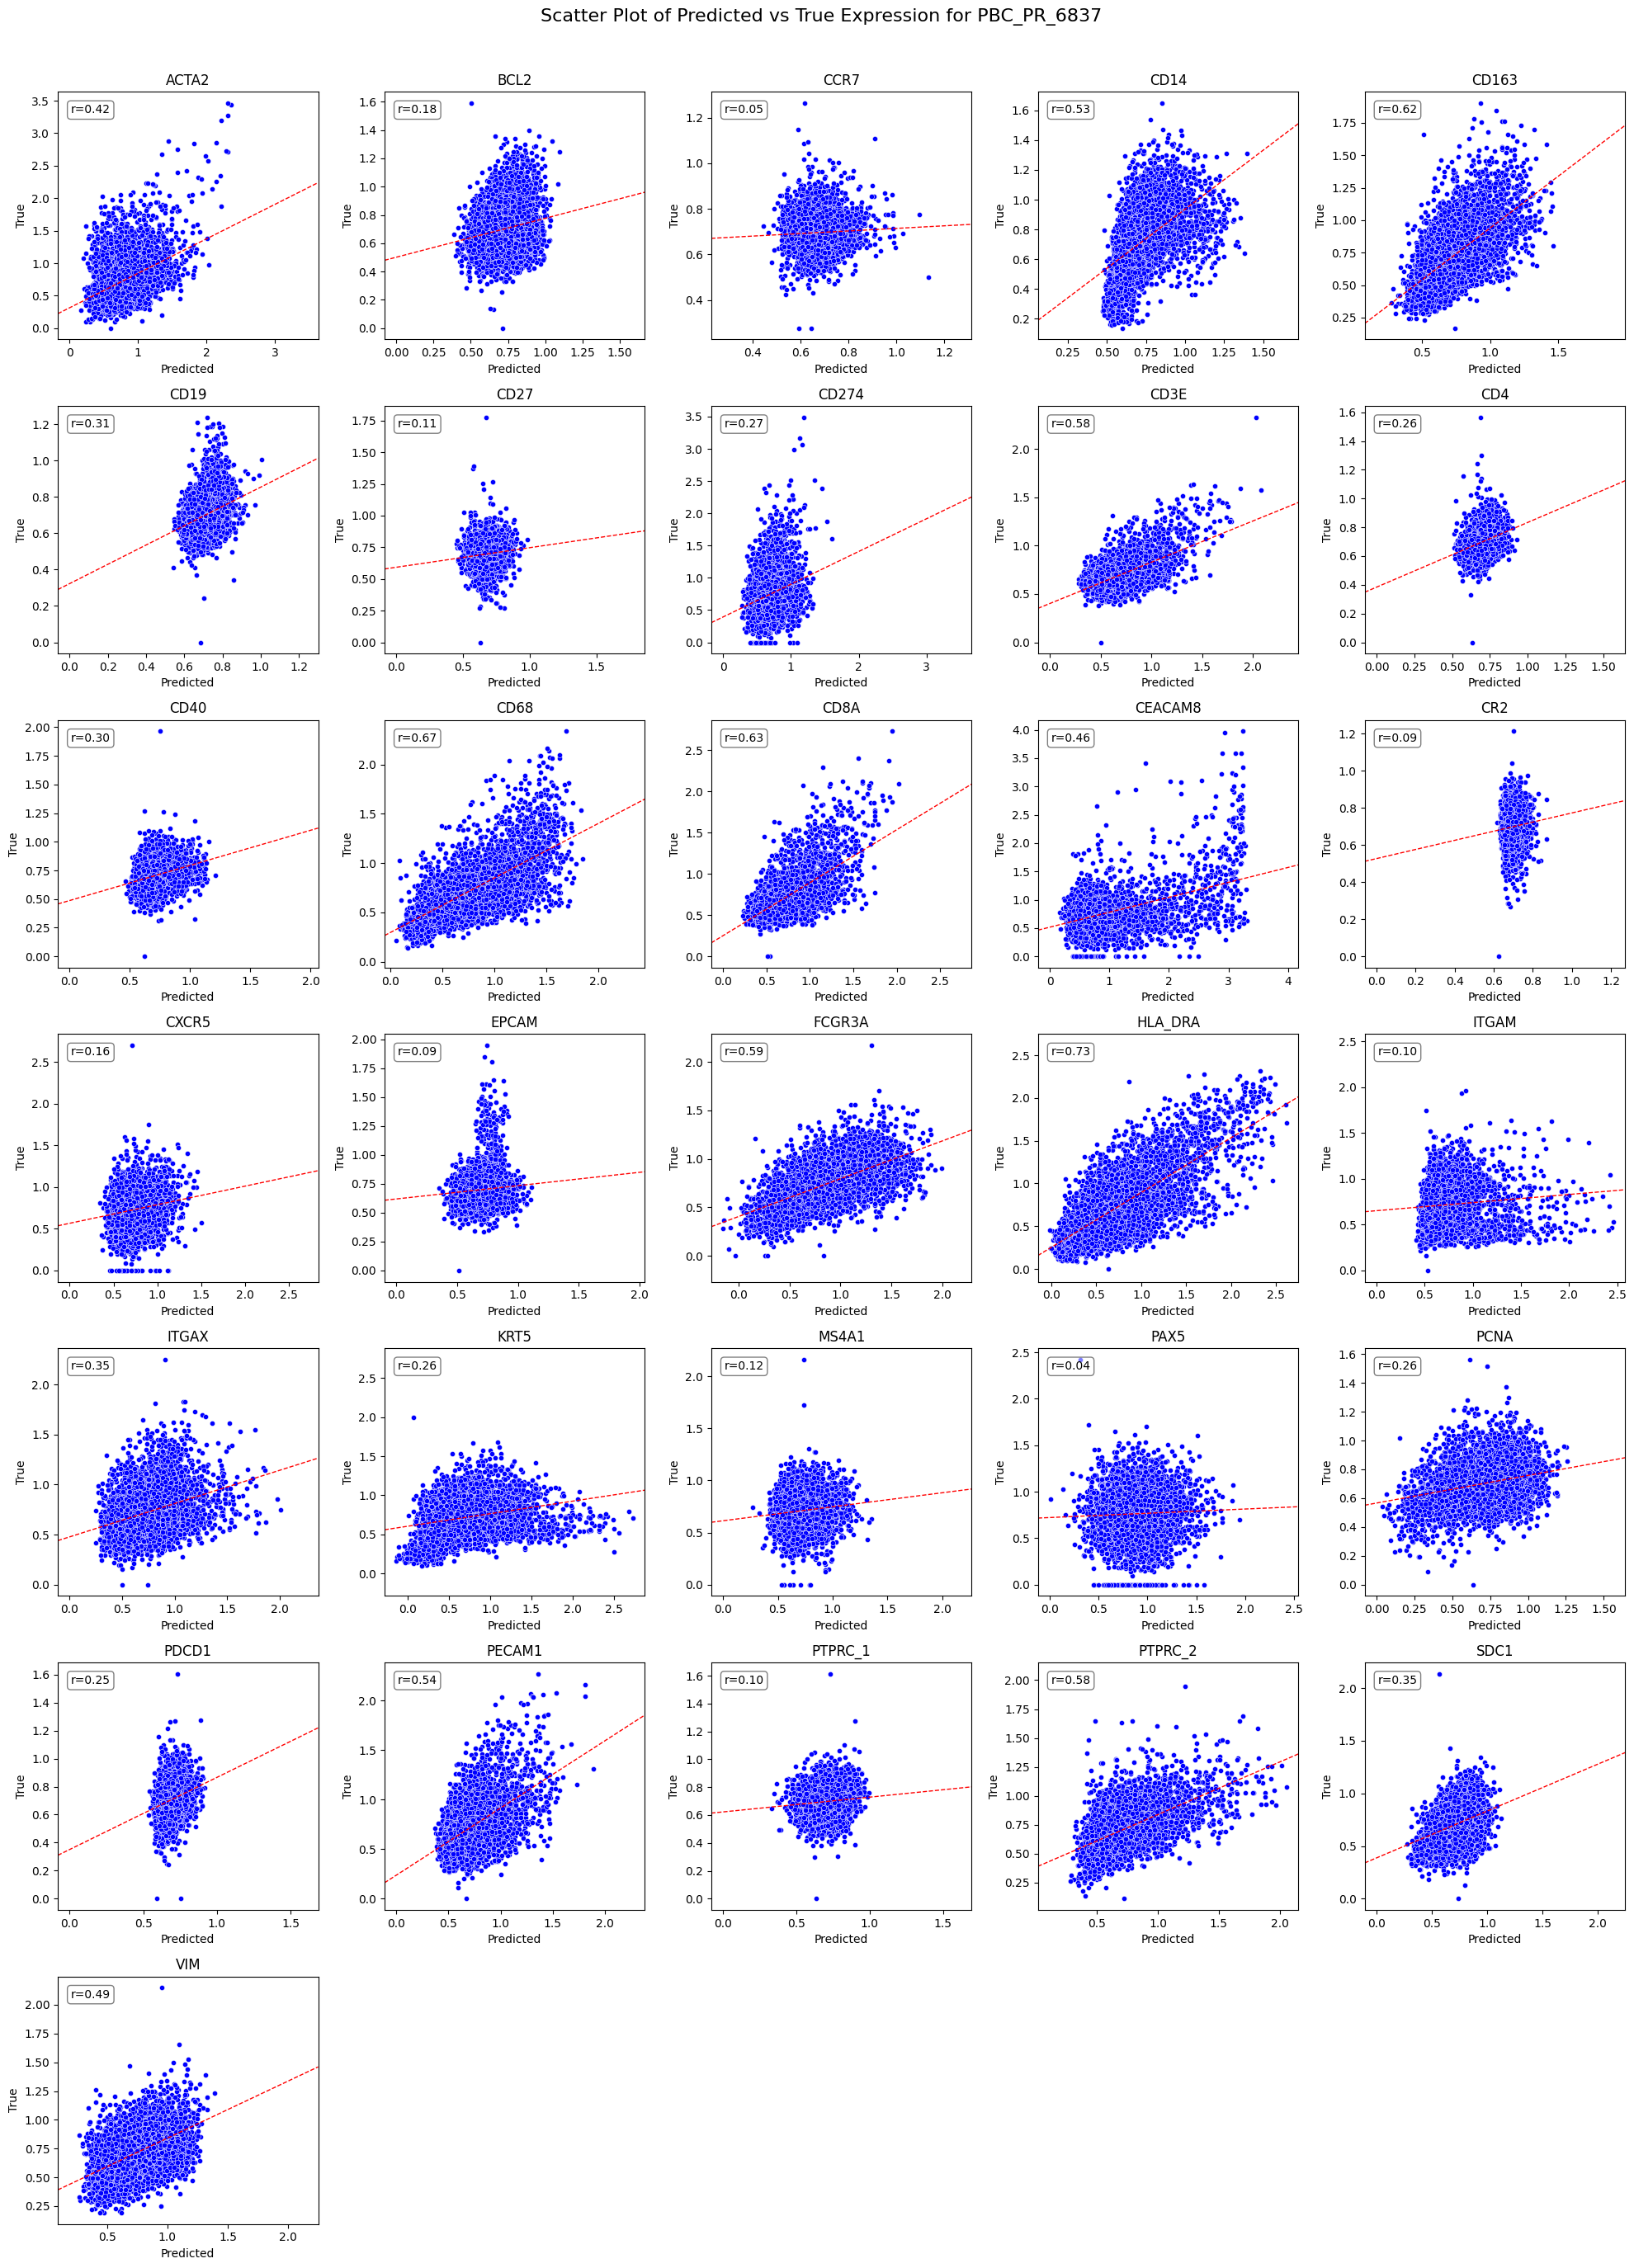

/ix/hosmanbeyoglu/haw309/DGAT_models/PBC_PR_6837_11535_gene_31_protein


In [6]:


test_correlations=[]
test_labels = []

for test_idx in range(0,len(sample_list)):

    test_sample = sample_list[test_idx]
    print(f"\n=== Test sample '{test_sample}' ===\n")
    train_adata_list = [adata_list[i] for i in range(len(sample_list)) if i != test_idx]
    test_adata_fold = adata_list[test_idx].copy()
    train_pdata_list = [pdata_list[i] for i in range(len(sample_list)) if i != test_idx]
    test_pdata_fold = pdata_list[test_idx].copy()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    model_components = train_and_evaluate_fold(train_adata_list, test_adata_fold, train_pdata_list, test_pdata_fold, test_sample, pyg_save_dir)

    if torch.cuda.device_count() >= 2:
        device_mRNA = torch.device("cuda:0")
        device_protein = torch.device("cuda:1")
    else:
        device_mRNA = device
        device_protein = device
        
    model_save_path = f"{model_save_dir}/{test_sample}_{len(common_gene)}_gene_{len(common_protein)}_protein"
    print(model_save_path)
    os.makedirs(model_save_path, exist_ok=True)
    
    torch.save(model_components['mRNA_encoder'].state_dict(), model_save_path+f'/encoder_mRNA.pth')
    torch.save(model_components['mRNA_decoder'].state_dict(), model_save_path+f'/decoder_mRNA.pth')
    torch.save(model_components['protein_encoder'].state_dict(), model_save_path+f'/encoder_protein.pth')
    torch.save(model_components['protein_decoder'].state_dict(), model_save_path+f'/decoder_protein.pth')
    
